# Data anaylsis in cerebellar granular layer simulations (MF-GrC + Connectivity FanIn)
## Running the simulation

First, we set current working directory to the root of Spiking Granular Layer and insert the source folder to the python path:

In [1]:
import os
os.chdir('../../')
os.getcwd()
import sys
import numpy
%matplotlib notebook
import matplotlib.pyplot as plt
import time
sys.path.insert(1,'./src')

## Running the simulation
Now start setting a new simulation with the configuration file that we specify:

In [2]:
config_file = './config/GoCFanIn/InitialTestMultiPattern.cfg'
data_path = './results'
simulation_name = 'TestMFGoCPlasticityAT'
simulation_time = 1000
analysis_time = 100.0
analysis_step = 100.0
time_bin = 0.125
run_the_simulation = True
import SpikingSimulation.FrequencySimulation as FrequencySimulation
simulation = FrequencySimulation.FrequencySimulation(config_file=config_file)

Set the simulation general parameters

In [3]:
simulation.config_options['simulation']['verbosity'] = 'Debug'
simulation.config_options['simulation']['seed'] = 12345
simulation.config_options['simulation']['time'] = simulation_time
simulation.config_options['simulation']['data_path'] = data_path
simulation.config_options['simulation']['simulation_name'] = simulation_name
simulation.config_options['simulation']['register_activity_only_in_test'] = False
simulation.config_options['simulation']['run_simulation'] = run_the_simulation
simulation.config_options['simulation']['record_to_file'] = True
simulation.config_options['simulation']['state_recording_step'] = 10.0
simulation.config_options['simulation']['weight_normalization_step'] = 100.0
if run_the_simulation:
    simulation.config_options['network']['load_file'] = None
else:
    simulation.config_options['network']['load_file'] = data_path + '/' + simulation_name + '/network.h5'

Set the network synaptic parameters of the granular layer

In [4]:
# Set the density of neurons per layer (in units/mm3)
simulation.config_options['mflayer']['density_of_neurons'] = 300.0e3
simulation.config_options['goclayer']['density_of_neurons'] = 9.0e3
# Set the neuron dynamic parameters
simulation.config_options['goclayer']['cm'] = 50.0e-12
simulation.config_options['goclayer']['grest'] = 3.0e-9
#simulation.config_options['goclayer']['cell_model'] = 'ConductanceLIF'
simulation.config_options['goclayer']['cell_model'] = 'ConductanceLIFwATSym'
simulation.config_options['goclayer']['tau_th'] = 1.0e3
simulation.config_options['goclayer']['th_cons'] = 2.0e1
# Set the MF-GrC connectivity rules and parameters
simulation.config_options['mfgocsynapsis']['connectivity_type'] = 'randomn2onestd'
simulation.config_options['mfgocsynapsis']['average_number_of_source_cells'] = 2000.0
simulation.config_options['mfgocsynapsis']['std_number_of_source_cells'] = 0.5
# Set the MF-GrC learning rule and initial weights
simulation.config_options['mfgocsynapsis']['weight_initialization_type'] = 'random'
simulation.config_options['mfgocsynapsis']['random_min_weight'] = 6.0e-11
simulation.config_options['mfgocsynapsis']['random_max_weight'] = 6.5e-11
simulation.config_options['mfgocsynapsis']['weight_recording'] = True
simulation.config_options['mfgocsynapsis']['weight_normalization'] = False
simulation.config_options['mfgocsynapsis']['learning_rule_type'] = 'eSTDP'
simulation.config_options['mfgocsynapsis']['tau_plus'] = 16.8e-3
simulation.config_options['mfgocsynapsis']['learning_step'] = 2.0e-3
simulation.config_options['mfgocsynapsis']['minus_plus_ratio'] = 1.20
simulation.config_options['goclayer']['tau_minus'] = 33.7e-3
simulation.config_options['mfgocsynapsis']['max_weight'] = 7.0e-10
# Set the GoC-GoC connectivity rules and parameters
simulation.config_options['gocgocsynapsis']['connectivity_type'] = 'random_with_probability'
simulation.config_options['gocgocsynapsis']['connection_probability'] = 1.0
# Set the MF-GrC learning rule and initial weights
simulation.config_options['gocgocsynapsis']['weight_initialization_type'] = 'fixed'
#simulation.config_options['gocgocsynapsis']['initial_weight'] = -1.0e-11
simulation.config_options['gocgocsynapsis']['initial_weight'] = -7.0e-10
simulation.config_options['gocgocsynapsis']['weight_recording'] = True
simulation.config_options['gocgocsynapsis']['weight_normalization'] = False
#simulation.config_options['gocgocsynapsis']['learning_rule_type'] = 'STDPSym'
simulation.config_options['gocgocsynapsis']['tau_sym'] = 0.125
simulation.config_options['gocgocsynapsis']['learning_step'] = 5.0e-2
simulation.config_options['gocgocsynapsis']['minus_plus_ratio'] = 0.7
simulation.config_options['goclayer']['tau_istdp'] = 125.0e-3
simulation.config_options['gocgocsynapsis']['max_weight'] = -0.0e-10


Set analysis parameters

In [5]:
simulation.config_options['individual_mutual_information']['layer'] = 'goclayer'
simulation.config_options['individual_mutual_information']['window_length'] = analysis_time
simulation.config_options['individual_mutual_information']['time_bin'] = time_bin
simulation.config_options['hit_top_analysis']['layer'] = 'goclayer'
simulation.config_options['hit_top_analysis']['window_length'] = analysis_time
simulation.config_options['hit_top_analysis']['number_of_cells'] = 72
simulation.config_options['hit_top_analysis']['time_bin'] = time_bin

Initialize the simulation

In [6]:
# Set the rate of fibers in pattern
simulation.config_options['stimulation']['number_of_patterns'] = 2
simulation.config_options['stimulation']['rate_of_fibers_in_pattern'] = 0.10
simulation.config_options['network']['length'] = 2.0e-1
simulation.initialize()

2018-06-29 19:18:06,429 - P19763 - MemTotal:67M - Simulation - DEBUG: Simulation time fixed to 1000s
2018-06-29 19:18:06,452 - P19763 - MemTotal:67M - Simulation - DEBUG: Creating cerebellum generator
2018-06-29 19:18:06,538 - P19763 - MemTotal:84M - Simulation - DEBUG: Initializing cerebellum generator
2018-06-29 19:18:06,540 - P19763 - MemTotal:84M - Simulation - DEBUG: Removing results folder ./results/TestMFGoCPlasticityAT
2018-06-29 19:18:06,577 - P19763 - MemTotal:84M - Simulation - DEBUG: Cerebellar simulation initialized
2018-06-29 19:18:06,581 - P19763 - MemTotal:84M - Simulation - DEBUG: NEST module loaded
2018-06-29 19:18:06,606 - P19763 - MemTotal:87M - Simulation - DEBUG: Setting Global NEST Seed: 12356
2018-06-29 19:18:06,609 - P19763 - MemTotal:87M - Simulation - DEBUG: Setting Per-Process NEST Seeds: [12357, 12358, 12359, 12360, 12361, 12362, 12363, 12364, 12365, 12366]
2018-06-29 19:18:06,612 - P19763 - MemTotal:87M - Simulation - WARNING: Non-specified cell model para

Define a function to obtain the average firing rate

In [7]:
def obtain_fr(init_time,end_time):
    min_neuron = 0
    max_neuron = simulation.cerebellum.get_number_of_elements(layer='goclayer')
    gtime,gcell_id = simulation.cerebellum.get_spike_activity(neuron_layer = 'goclayer', init_time = init_time, end_time = end_time, neuron_indexes=range(min_neuron,max_neuron))
    import numpy
    firing_frequency = float(len(gcell_id)) / ((end_time-init_time)*max_neuron)
    return firing_frequency

Visualize the simulation or only run it.

<IPython.core.display.Javascript object>


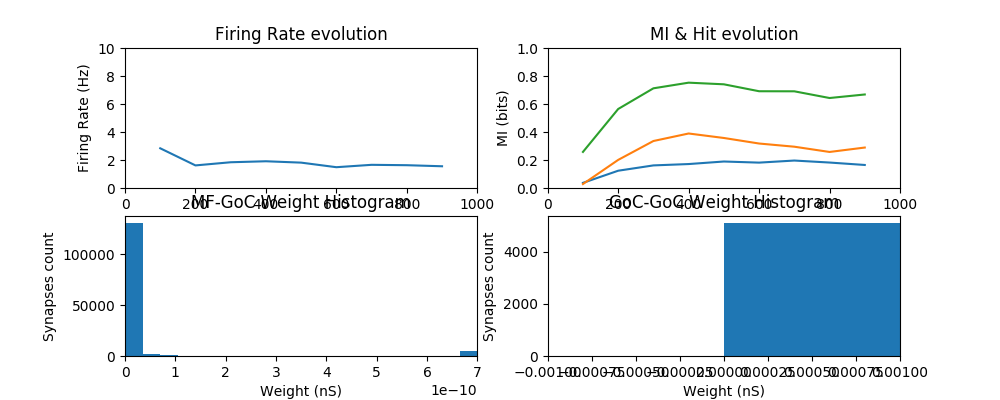

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_base.py:2961: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=-0.0, right=0
  'left=%s, right=%s') % (left, right))
2018-06-29 19:18:11,785 - P19763 - MemTotal:635M - Simulation - INFO: Running the simulation from 0.0s until time 100.0s
2018-06-29 19:18:11,806 - P19763 - MemTotal:636M - Simulation - DEBUG: Running the simulation 0.177s until 0.177s
2018-06-29 19:18:12,110 - P19763 - MemTotal:636M - Simulation - DEBUG: Simulation time is 0.302181959152 seconds. Real-time rate: 0.5857397989495385
2018-06-29 19:18:12,154 - P19763 - MemTotal:636M - Simulation - DEBUG: Running the simulation 0.11299999999999999s until 0.29s
2018-06-29 19:18:12,372 - P19763 - MemTotal:636M - Simulation - DEBUG: Simulation time is 0.217069864273 seconds. Real-time rate: 0.5205697270711301
2018-06-29 19:18:12,390 - P19763 - MemTotal:636M - Simulation - DEBUG: Running the simulation 0.

2018-06-29 19:18:19,999 - P19763 - MemTotal:636M - Simulation - DEBUG: Simulation time is 0.137601137161 seconds. Real-time rate: 0.7485403255010457
2018-06-29 19:18:20,016 - P19763 - MemTotal:636M - Simulation - DEBUG: Running the simulation 0.7320000000000002s until 7.409s
2018-06-29 19:18:20,797 - P19763 - MemTotal:636M - Simulation - DEBUG: Simulation time is 0.779013872147 seconds. Real-time rate: 0.9396495058335002
2018-06-29 19:18:20,814 - P19763 - MemTotal:636M - Simulation - DEBUG: Running the simulation 0.04699999999999971s until 7.4559999999999995s
2018-06-29 19:18:20,878 - P19763 - MemTotal:636M - Simulation - DEBUG: Simulation time is 0.061203956604 seconds. Real-time rate: 0.7679242096077986
2018-06-29 19:18:20,896 - P19763 - MemTotal:636M - Simulation - DEBUG: Running the simulation 0.21699999999999964s until 7.672999999999999s
2018-06-29 19:18:21,152 - P19763 - MemTotal:636M - Simulation - DEBUG: Simulation time is 0.253854990005 seconds. Real-time rate: 0.8548187293671

2018-06-29 19:18:28,003 - P19763 - MemTotal:713M - Simulation - DEBUG: Running the simulation 0.25399999999999956s until 12.972000000000001s
2018-06-29 19:18:28,282 - P19763 - MemTotal:713M - Simulation - DEBUG: Simulation time is 0.27680516243 seconds. Real-time rate: 0.9176129439580347
2018-06-29 19:18:28,300 - P19763 - MemTotal:713M - Simulation - DEBUG: Running the simulation 0.7140000000000004s until 13.686000000000002s
2018-06-29 19:18:29,071 - P19763 - MemTotal:713M - Simulation - DEBUG: Simulation time is 0.769980192184 seconds. Real-time rate: 0.9272965814540878
2018-06-29 19:18:29,101 - P19763 - MemTotal:713M - Simulation - DEBUG: Running the simulation 0.11100000000000065s until 13.797000000000002s
2018-06-29 19:18:29,260 - P19763 - MemTotal:713M - Simulation - DEBUG: Simulation time is 0.157377958298 seconds. Real-time rate: 0.7053084256564667
2018-06-29 19:18:29,278 - P19763 - MemTotal:713M - Simulation - DEBUG: Running the simulation 0.2400000000000002s until 14.037000000

2018-06-29 19:18:36,315 - P19763 - MemTotal:713M - Simulation - DEBUG: Running the simulation 0.11700000000000088s until 19.821s
2018-06-29 19:18:36,477 - P19763 - MemTotal:713M - Simulation - DEBUG: Simulation time is 0.159955024719 seconds. Real-time rate: 0.7314556088835947
2018-06-29 19:18:36,499 - P19763 - MemTotal:713M - Simulation - DEBUG: Running the simulation 0.10300000000000153s until 19.924000000000003s
2018-06-29 19:18:36,635 - P19763 - MemTotal:713M - Simulation - DEBUG: Simulation time is 0.1350710392 seconds. Real-time rate: 0.7625616905754277
2018-06-29 19:18:36,657 - P19763 - MemTotal:713M - Simulation - DEBUG: Running the simulation 0.0730000000000004s until 19.997000000000003s
2018-06-29 19:18:36,741 - P19763 - MemTotal:713M - Simulation - DEBUG: Simulation time is 0.0815689563751 seconds. Real-time rate: 0.8949483142126464
2018-06-29 19:18:36,758 - P19763 - MemTotal:713M - Simulation - DEBUG: Running the simulation 0.22500000000000142s until 20.222000000000005s
201

2018-06-29 19:18:43,657 - P19763 - MemTotal:714M - Simulation - DEBUG: Simulation time is 0.0462720394135 seconds. Real-time rate: 0.3673924948088033
2018-06-29 19:18:43,676 - P19763 - MemTotal:714M - Simulation - DEBUG: Running the simulation 0.16799999999999926s until 25.168s
2018-06-29 19:18:43,856 - P19763 - MemTotal:714M - Simulation - DEBUG: Simulation time is 0.17843914032 seconds. Real-time rate: 0.9414974747069818
2018-06-29 19:18:43,874 - P19763 - MemTotal:714M - Simulation - DEBUG: Running the simulation 0.2270000000000003s until 25.395s
2018-06-29 19:18:44,121 - P19763 - MemTotal:714M - Simulation - DEBUG: Simulation time is 0.244730949402 seconds. Real-time rate: 0.9275492149840827
2018-06-29 19:18:44,138 - P19763 - MemTotal:714M - Simulation - DEBUG: Running the simulation 0.07499999999999929s until 25.47s
2018-06-29 19:18:44,259 - P19763 - MemTotal:714M - Simulation - DEBUG: Simulation time is 0.118911027908 seconds. Real-time rate: 0.630723670623895
2018-06-29 19:18:44,

2018-06-29 19:18:49,720 - P19763 - MemTotal:714M - Simulation - DEBUG: Simulation time is 0.0615389347076 seconds. Real-time rate: 0.7799940026267284
2018-06-29 19:18:49,738 - P19763 - MemTotal:714M - Simulation - DEBUG: Running the simulation 0.7100000000000009s until 30.624s
2018-06-29 19:18:49,844 - P19763 - MemTotal:714M - Simulation - DEBUG: Simulation time is 0.104154109955 seconds. Real-time rate: 0.8256995334826022
2018-06-29 19:18:49,846 - P19763 - MemTotal:714M - Simulation - DEBUG: Resizing activity dataset of layer goclayer
2018-06-29 19:18:49,848 - P19763 - MemTotal:714M - Simulation - DEBUG: Saving network state to file ./results/TestMFGoCPlasticityAT/network.h5
2018-06-29 19:18:51,366 - P19763 - MemTotal:715M - Simulation - DEBUG: Simulation time is 0.752128124237 seconds. Real-time rate: 0.8296458806575919
2018-06-29 19:18:51,384 - P19763 - MemTotal:715M - Simulation - DEBUG: Running the simulation 0.1509999999999998s until 30.775s
2018-06-29 19:18:51,557 - P19763 - Mem

2018-06-29 19:18:58,069 - P19763 - MemTotal:715M - Simulation - DEBUG: Simulation time is 0.0723059177399 seconds. Real-time rate: 0.6776762059266662
2018-06-29 19:18:58,087 - P19763 - MemTotal:715M - Simulation - DEBUG: Running the simulation 0.3470000000000013s until 36.574000000000005s
2018-06-29 19:18:58,493 - P19763 - MemTotal:715M - Simulation - DEBUG: Simulation time is 0.404453039169 seconds. Real-time rate: 0.8579488009601547
2018-06-29 19:18:58,511 - P19763 - MemTotal:715M - Simulation - DEBUG: Running the simulation 0.1700000000000017s until 36.74400000000001s
2018-06-29 19:18:58,730 - P19763 - MemTotal:715M - Simulation - DEBUG: Simulation time is 0.217306852341 seconds. Real-time rate: 0.7823039088223143
2018-06-29 19:18:58,748 - P19763 - MemTotal:715M - Simulation - DEBUG: Running the simulation 0.5090000000000003s until 37.25300000000001s
2018-06-29 19:18:59,289 - P19763 - MemTotal:715M - Simulation - DEBUG: Simulation time is 0.539258003235 seconds. Real-time rate: 0.94

2018-06-29 19:19:10,176 - P19763 - MemTotal:715M - Simulation - DEBUG: Simulation time is 0.267002105713 seconds. Real-time rate: 0.880142871429998
2018-06-29 19:19:10,198 - P19763 - MemTotal:715M - Simulation - DEBUG: Running the simulation 0.0730000000000004s until 45.89700000000001s
2018-06-29 19:19:10,302 - P19763 - MemTotal:715M - Simulation - DEBUG: Simulation time is 0.102117776871 seconds. Real-time rate: 0.7148608424213173
2018-06-29 19:19:10,320 - P19763 - MemTotal:715M - Simulation - DEBUG: Running the simulation 0.031999999999996476s until 45.92900000000001s
2018-06-29 19:19:10,363 - P19763 - MemTotal:715M - Simulation - DEBUG: Simulation time is 0.0410170555115 seconds. Real-time rate: 0.7801632662550437
2018-06-29 19:19:10,381 - P19763 - MemTotal:715M - Simulation - DEBUG: Running the simulation 0.21800000000000352s until 46.14700000000001s
2018-06-29 19:19:10,608 - P19763 - MemTotal:715M - Simulation - DEBUG: Simulation time is 0.225282907486 seconds. Real-time rate: 0.9

2018-06-29 19:19:20,466 - P19763 - MemTotal:715M - Simulation - DEBUG: Simulation time is 0.245845794678 seconds. Real-time rate: 0.9477485685912332
2018-06-29 19:19:20,489 - P19763 - MemTotal:715M - Simulation - DEBUG: Running the simulation 0.134999999999998s until 54.01000000000001s
2018-06-29 19:19:20,682 - P19763 - MemTotal:715M - Simulation - DEBUG: Simulation time is 0.19132399559 seconds. Real-time rate: 0.7056093491228863
2018-06-29 19:19:20,701 - P19763 - MemTotal:715M - Simulation - DEBUG: Running the simulation 0.2749999999999986s until 54.28500000000001s
2018-06-29 19:19:21,001 - P19763 - MemTotal:715M - Simulation - DEBUG: Simulation time is 0.297614812851 seconds. Real-time rate: 0.9240131476174902
2018-06-29 19:19:21,020 - P19763 - MemTotal:715M - Simulation - DEBUG: Running the simulation 0.5850000000000009s until 54.87000000000001s
2018-06-29 19:19:21,627 - P19763 - MemTotal:715M - Simulation - DEBUG: Simulation time is 0.605783939362 seconds. Real-time rate: 0.965690

2018-06-29 19:19:30,539 - P19763 - MemTotal:715M - Simulation - DEBUG: Running the simulation 0.003999999999997783s until 61.85500000000001s
2018-06-29 19:19:30,554 - P19763 - MemTotal:715M - Simulation - DEBUG: Simulation time is 0.0131850242615 seconds. Real-time rate: 0.3033744891683972
2018-06-29 19:19:30,574 - P19763 - MemTotal:715M - Simulation - DEBUG: Running the simulation 0.4720000000000013s until 62.32700000000001s
2018-06-29 19:19:31,081 - P19763 - MemTotal:715M - Simulation - DEBUG: Simulation time is 0.50480389595 seconds. Real-time rate: 0.9350165555110046
2018-06-29 19:19:31,099 - P19763 - MemTotal:715M - Simulation - DEBUG: Running the simulation 0.11899999999999977s until 62.44600000000001s
2018-06-29 19:19:31,271 - P19763 - MemTotal:715M - Simulation - DEBUG: Simulation time is 0.170248985291 seconds. Real-time rate: 0.6989762658316468
2018-06-29 19:19:31,288 - P19763 - MemTotal:715M - Simulation - DEBUG: Running the simulation 0.4029999999999987s until 62.8490000000

2018-06-29 19:19:38,265 - P19763 - MemTotal:714M - Simulation - DEBUG: Simulation time is 0.406049013138 seconds. Real-time rate: 0.9407731274804259
2018-06-29 19:19:38,284 - P19763 - MemTotal:714M - Simulation - DEBUG: Running the simulation 0.22299999999999898s until 68.52500000000002s
2018-06-29 19:19:38,521 - P19763 - MemTotal:714M - Simulation - DEBUG: Simulation time is 0.234827041626 seconds. Real-time rate: 0.9496350950721628
2018-06-29 19:19:38,538 - P19763 - MemTotal:714M - Simulation - DEBUG: Running the simulation 0.0589999999999975s until 68.58400000000002s
2018-06-29 19:19:38,604 - P19763 - MemTotal:714M - Simulation - DEBUG: Simulation time is 0.0639140605927 seconds. Real-time rate: 0.9231145612234991
2018-06-29 19:19:38,623 - P19763 - MemTotal:714M - Simulation - DEBUG: Running the simulation 0.05299999999999727s until 68.63700000000001s
2018-06-29 19:19:38,682 - P19763 - MemTotal:714M - Simulation - DEBUG: Simulation time is 0.0570170879364 seconds. Real-time rate: 0.

2018-06-29 19:19:50,253 - P19763 - MemTotal:715M - Simulation - DEBUG: Simulation time is 0.0303151607513 seconds. Real-time rate: 0.6597359045542962
2018-06-29 19:19:50,270 - P19763 - MemTotal:715M - Simulation - DEBUG: Running the simulation 0.23799999999999955s until 78.03200000000001s
2018-06-29 19:19:50,523 - P19763 - MemTotal:715M - Simulation - DEBUG: Simulation time is 0.251101970673 seconds. Real-time rate: 0.9478221113218959
2018-06-29 19:19:50,541 - P19763 - MemTotal:715M - Simulation - DEBUG: Running the simulation 0.10299999999999443s until 78.135s
2018-06-29 19:19:50,664 - P19763 - MemTotal:715M - Simulation - DEBUG: Simulation time is 0.121792793274 seconds. Real-time rate: 0.8456986430086694
2018-06-29 19:19:50,682 - P19763 - MemTotal:715M - Simulation - DEBUG: Running the simulation 0.08299999999999841s until 78.218s
2018-06-29 19:19:50,780 - P19763 - MemTotal:715M - Simulation - DEBUG: Simulation time is 0.0958979129791 seconds. Real-time rate: 0.8655037155820581
2018

2018-06-29 19:19:58,047 - P19763 - MemTotal:715M - Simulation - DEBUG: Simulation time is 0.700590133667 seconds. Real-time rate: 0.9249345214273408
2018-06-29 19:19:58,070 - P19763 - MemTotal:715M - Simulation - DEBUG: Running the simulation 0.4590000000000032s until 84.06600000000003s
2018-06-29 19:19:58,576 - P19763 - MemTotal:715M - Simulation - DEBUG: Simulation time is 0.504347085953 seconds. Real-time rate: 0.9100875424568168
2018-06-29 19:19:58,596 - P19763 - MemTotal:715M - Simulation - DEBUG: Running the simulation 0.5379999999999967s until 84.60400000000003s
2018-06-29 19:19:59,163 - P19763 - MemTotal:715M - Simulation - DEBUG: Simulation time is 0.56588602066 seconds. Real-time rate: 0.9507214887056935
2018-06-29 19:19:59,182 - P19763 - MemTotal:715M - Simulation - DEBUG: Running the simulation 0.2150000000000034s until 84.81900000000003s
2018-06-29 19:19:59,442 - P19763 - MemTotal:715M - Simulation - DEBUG: Simulation time is 0.257614850998 seconds. Real-time rate: 0.83457

2018-06-29 19:20:05,306 - P19763 - MemTotal:715M - Simulation - DEBUG: Running the simulation 0.26200000000000045s until 89.93800000000005s
2018-06-29 19:20:05,603 - P19763 - MemTotal:715M - Simulation - DEBUG: Simulation time is 0.294564962387 seconds. Real-time rate: 0.8894472644567577
2018-06-29 19:20:05,620 - P19763 - MemTotal:715M - Simulation - DEBUG: Running the simulation 0.1560000000000059s until 90.09400000000005s
2018-06-29 19:20:05,698 - P19763 - MemTotal:715M - Simulation - DEBUG: Simulation time is 0.0753691196442 seconds. Real-time rate: 0.822618073458616
2018-06-29 19:20:05,700 - P19763 - MemTotal:715M - Simulation - DEBUG: Resizing activity dataset of layer goclayer
2018-06-29 19:20:05,702 - P19763 - MemTotal:715M - Simulation - DEBUG: Saving network state to file ./results/TestMFGoCPlasticityAT/network.h5
2018-06-29 19:20:06,722 - P19763 - MemTotal:715M - Simulation - DEBUG: Simulation time is 0.181488037109 seconds. Real-time rate: 0.5179404741889472
2018-06-29 19:20

2018-06-29 19:20:15,221 - P19763 - MemTotal:715M - Simulation - DEBUG: Running the simulation 0.3689999999999998s until 97.70500000000006s
2018-06-29 19:20:15,613 - P19763 - MemTotal:715M - Simulation - DEBUG: Simulation time is 0.390383005142 seconds. Real-time rate: 0.9452255737044123
2018-06-29 19:20:15,633 - P19763 - MemTotal:715M - Simulation - DEBUG: Running the simulation 0.028000000000005798s until 97.73300000000006s
2018-06-29 19:20:15,673 - P19763 - MemTotal:715M - Simulation - DEBUG: Simulation time is 0.0387198925018 seconds. Real-time rate: 0.7231425035253309
2018-06-29 19:20:15,693 - P19763 - MemTotal:715M - Simulation - DEBUG: Running the simulation 0.17900000000000205s until 97.91200000000006s
2018-06-29 19:20:15,895 - P19763 - MemTotal:715M - Simulation - DEBUG: Simulation time is 0.20013999939 seconds. Real-time rate: 0.8943739409707434
2018-06-29 19:20:15,914 - P19763 - MemTotal:715M - Simulation - DEBUG: Running the simulation 0.4069999999999965s until 98.3190000000

2018-06-29 19:20:19,185 - P19763 - MemTotal:715M - Simulation - INFO: Individual pattern false alarm matrix:
2018-06-29 19:20:19,186 - P19763 - MemTotal:715M - Simulation - INFO: [[0.35808581 0.3349835  0.27392739 0.38613861 0.30528053 0.33993399
  0.34488449 0.37623762 0.30528053 0.4290429  0.23762376 0.24422442
  0.36138614 0.35973597 0.23432343 0.31188119 0.23927393 0.32343234
  0.28712871 0.31518152 0.29537954 0.28547855 0.29372937 0.28712871
  0.31683168 0.34983498 0.28217822 0.3019802  0.28382838 0.40594059
  0.24587459 0.3349835  0.34323432 0.27887789 0.40759076 0.32013201
  0.28052805 0.37623762 0.35313531 0.25412541 0.29042904 0.41419142
  0.28217822 0.32673267 0.26237624 0.34983498 0.38943894 0.25412541
  0.40759076 0.36138614 0.30693069 0.32178218 0.35478548 0.34323432
  0.28052805 0.37458746 0.33828383 0.37953795 0.27062706 0.32508251
  0.29372937 0.32013201 0.24257426 0.29372937 0.24587459 0.39438944
  0.29867987 0.36468647 0.330033   0.27392739 0.36138614 0.22277228]
 [0.

2018-06-29 19:20:19,233 - P19763 - MemTotal:715M - Simulation - INFO: Individual pattern miss matrix:
2018-06-29 19:20:19,235 - P19763 - MemTotal:715M - Simulation - INFO: [[0.68556701 0.4742268  0.44329897 0.63402062 0.47938144 0.50515464
  0.77835052 0.45360825 0.68556701 0.73195876 0.40721649 0.35051546
  0.65463918 0.56701031 0.36082474 0.49484536 0.43814433 0.70103093
  0.44329897 0.53092784 0.33505155 0.39690722 0.56185567 0.49484536
  0.53608247 0.67010309 0.43298969 0.46391753 0.41752577 0.69072165
  0.3556701  0.63402062 0.62371134 0.45360825 0.69587629 0.47938144
  0.39175258 0.73195876 0.6185567  0.30927835 0.54123711 0.79381443
  0.40206186 0.54639175 0.32474227 0.71649485 0.57731959 0.36082474
  0.79381443 0.67525773 0.53608247 0.52061856 0.45876289 0.58247423
  0.58247423 0.72680412 0.54639175 0.41752577 0.33505155 0.5
  0.57216495 0.56185567 0.41237113 0.51546392 0.34020619 0.75257732
  0.46907216 0.58247423 0.6185567  0.47938144 0.70103093 0.34020619]
 [0.54504505 0.608

2018-06-29 19:20:23,848 - P19763 - MemTotal:715M - Simulation - DEBUG: Running the simulation 0.0010000000000047748s until 102.77500000000009s
2018-06-29 19:20:23,856 - P19763 - MemTotal:715M - Simulation - DEBUG: Simulation time is 0.00550508499146 seconds. Real-time rate: 0.18165023819922163
2018-06-29 19:20:23,874 - P19763 - MemTotal:715M - Simulation - DEBUG: Running the simulation 0.4069999999999965s until 103.18200000000009s
2018-06-29 19:20:24,298 - P19763 - MemTotal:715M - Simulation - DEBUG: Simulation time is 0.422255039215 seconds. Real-time rate: 0.9638724519583037
2018-06-29 19:20:24,316 - P19763 - MemTotal:715M - Simulation - DEBUG: Running the simulation 0.19299999999999784s until 103.37500000000009s
2018-06-29 19:20:24,531 - P19763 - MemTotal:715M - Simulation - DEBUG: Simulation time is 0.21283698082 seconds. Real-time rate: 0.9067973021262289
2018-06-29 19:20:24,548 - P19763 - MemTotal:715M - Simulation - DEBUG: Running the simulation 0.09300000000000352s until 103.46

2018-06-29 19:20:33,101 - P19763 - MemTotal:720M - Simulation - DEBUG: Running the simulation 0.5229999999999961s until 110.56900000000012s
2018-06-29 19:20:33,687 - P19763 - MemTotal:720M - Simulation - DEBUG: Simulation time is 0.584139823914 seconds. Real-time rate: 0.895333580402106
2018-06-29 19:20:33,705 - P19763 - MemTotal:720M - Simulation - DEBUG: Running the simulation 0.7579999999999956s until 111.32700000000011s
2018-06-29 19:20:34,505 - P19763 - MemTotal:720M - Simulation - DEBUG: Simulation time is 0.798080921173 seconds. Real-time rate: 0.9497783744608437
2018-06-29 19:20:34,522 - P19763 - MemTotal:720M - Simulation - DEBUG: Running the simulation 0.1770000000000067s until 111.50400000000012s
2018-06-29 19:20:34,710 - P19763 - MemTotal:720M - Simulation - DEBUG: Simulation time is 0.185591936111 seconds. Real-time rate: 0.953705229378695
2018-06-29 19:20:34,728 - P19763 - MemTotal:720M - Simulation - DEBUG: Running the simulation 0.17900000000000205s until 111.6830000000

2018-06-29 19:20:43,151 - P19763 - MemTotal:720M - Simulation - DEBUG: Simulation time is 0.117467880249 seconds. Real-time rate: 0.9449391592381867
2018-06-29 19:20:43,169 - P19763 - MemTotal:720M - Simulation - DEBUG: Running the simulation 0.15800000000000125s until 118.95900000000013s
2018-06-29 19:20:43,360 - P19763 - MemTotal:720M - Simulation - DEBUG: Simulation time is 0.188638210297 seconds. Real-time rate: 0.8375821619148556
2018-06-29 19:20:43,377 - P19763 - MemTotal:720M - Simulation - DEBUG: Running the simulation 0.20900000000000318s until 119.16800000000013s
2018-06-29 19:20:43,608 - P19763 - MemTotal:720M - Simulation - DEBUG: Simulation time is 0.229220867157 seconds. Real-time rate: 0.9117843527608203
2018-06-29 19:20:43,627 - P19763 - MemTotal:720M - Simulation - DEBUG: Running the simulation 0.09399999999999409s until 119.26200000000013s
2018-06-29 19:20:43,734 - P19763 - MemTotal:720M - Simulation - DEBUG: Simulation time is 0.105632066727 seconds. Real-time rate: 

2018-06-29 19:20:51,490 - P19763 - MemTotal:720M - Simulation - DEBUG: Simulation time is 0.330224990845 seconds. Real-time rate: 0.9508668595819185
2018-06-29 19:20:51,508 - P19763 - MemTotal:720M - Simulation - DEBUG: Running the simulation 0.09999999999999432s until 125.10800000000015s
2018-06-29 19:20:51,621 - P19763 - MemTotal:720M - Simulation - DEBUG: Simulation time is 0.110513925552 seconds. Real-time rate: 0.9048633418836279
2018-06-29 19:20:51,638 - P19763 - MemTotal:720M - Simulation - DEBUG: Running the simulation 0.4449999999999932s until 125.55300000000014s
2018-06-29 19:20:52,115 - P19763 - MemTotal:720M - Simulation - DEBUG: Simulation time is 0.474661827087 seconds. Real-time rate: 0.9375095586063479
2018-06-29 19:20:52,132 - P19763 - MemTotal:720M - Simulation - DEBUG: Running the simulation 0.22799999999999443s until 125.78100000000013s
2018-06-29 19:20:52,370 - P19763 - MemTotal:720M - Simulation - DEBUG: Simulation time is 0.235924005508 seconds. Real-time rate: 0

2018-06-29 19:21:00,465 - P19763 - MemTotal:720M - Simulation - DEBUG: Simulation time is 0.436527967453 seconds. Real-time rate: 0.7559653094518868
2018-06-29 19:21:00,482 - P19763 - MemTotal:720M - Simulation - DEBUG: Running the simulation 0.21600000000000819s until 131.6210000000002s
2018-06-29 19:21:00,745 - P19763 - MemTotal:720M - Simulation - DEBUG: Simulation time is 0.261157035828 seconds. Real-time rate: 0.8270885726493231
2018-06-29 19:21:00,764 - P19763 - MemTotal:720M - Simulation - DEBUG: Running the simulation 0.25899999999998613s until 131.8800000000002s
2018-06-29 19:21:01,059 - P19763 - MemTotal:720M - Simulation - DEBUG: Simulation time is 0.293523073196 seconds. Real-time rate: 0.8823837839374084
2018-06-29 19:21:01,078 - P19763 - MemTotal:720M - Simulation - DEBUG: Running the simulation 0.21000000000000796s until 132.0900000000002s
2018-06-29 19:21:01,330 - P19763 - MemTotal:720M - Simulation - DEBUG: Simulation time is 0.250054121017 seconds. Real-time rate: 0.8

2018-06-29 19:21:12,079 - P19763 - MemTotal:720M - Simulation - DEBUG: Simulation time is 0.515817165375 seconds. Real-time rate: 0.928623613469719
2018-06-29 19:21:12,097 - P19763 - MemTotal:720M - Simulation - DEBUG: Running the simulation 0.046999999999997044s until 140.66100000000026s
2018-06-29 19:21:12,163 - P19763 - MemTotal:720M - Simulation - DEBUG: Simulation time is 0.0635919570923 seconds. Real-time rate: 0.7390871762570582
2018-06-29 19:21:12,182 - P19763 - MemTotal:720M - Simulation - DEBUG: Running the simulation 0.13999999999998636s until 140.80100000000024s
2018-06-29 19:21:12,335 - P19763 - MemTotal:720M - Simulation - DEBUG: Simulation time is 0.151397943497 seconds. Real-time rate: 0.924715334743197
2018-06-29 19:21:12,352 - P19763 - MemTotal:720M - Simulation - DEBUG: Running the simulation 0.4619999999999891s until 141.26300000000023s
2018-06-29 19:21:12,851 - P19763 - MemTotal:720M - Simulation - DEBUG: Simulation time is 0.496773004532 seconds. Real-time rate: 0

2018-06-29 19:21:19,203 - P19763 - MemTotal:720M - Simulation - DEBUG: Running the simulation 0.1910000000000025s until 146.7020000000002s
2018-06-29 19:21:19,416 - P19763 - MemTotal:720M - Simulation - DEBUG: Simulation time is 0.211573839188 seconds. Real-time rate: 0.9027581138262806
2018-06-29 19:21:19,436 - P19763 - MemTotal:720M - Simulation - DEBUG: Running the simulation 0.12700000000000955s until 146.8290000000002s
2018-06-29 19:21:19,580 - P19763 - MemTotal:720M - Simulation - DEBUG: Simulation time is 0.141881942749 seconds. Real-time rate: 0.8951103821905038
2018-06-29 19:21:19,597 - P19763 - MemTotal:720M - Simulation - DEBUG: Running the simulation 0.06100000000000705s until 146.8900000000002s
2018-06-29 19:21:19,682 - P19763 - MemTotal:720M - Simulation - DEBUG: Simulation time is 0.0828311443329 seconds. Real-time rate: 0.7364379725922576
2018-06-29 19:21:19,699 - P19763 - MemTotal:720M - Simulation - DEBUG: Running the simulation 0.8580000000000041s until 147.748000000

2018-06-29 19:21:28,503 - P19763 - MemTotal:720M - Simulation - DEBUG: Running the simulation 0.09000000000000341s until 153.73300000000017s
2018-06-29 19:21:28,618 - P19763 - MemTotal:720M - Simulation - DEBUG: Simulation time is 0.113358974457 seconds. Real-time rate: 0.7939380223866772
2018-06-29 19:21:28,636 - P19763 - MemTotal:720M - Simulation - DEBUG: Running the simulation 0.4439999999999884s until 154.17700000000016s
2018-06-29 19:21:29,098 - P19763 - MemTotal:720M - Simulation - DEBUG: Simulation time is 0.459861040115 seconds. Real-time rate: 0.9655090587552507
2018-06-29 19:21:29,118 - P19763 - MemTotal:720M - Simulation - DEBUG: Running the simulation 0.563999999999993s until 154.74100000000016s
2018-06-29 19:21:29,703 - P19763 - MemTotal:720M - Simulation - DEBUG: Simulation time is 0.583795070648 seconds. Real-time rate: 0.9660924326986493
2018-06-29 19:21:29,721 - P19763 - MemTotal:720M - Simulation - DEBUG: Running the simulation 0.49799999999999045s until 155.23900000

2018-06-29 19:21:34,499 - P19763 - MemTotal:720M - Simulation - DEBUG: Simulation time is 0.12544798851 seconds. Real-time rate: 0.9326574414586224
2018-06-29 19:21:34,517 - P19763 - MemTotal:720M - Simulation - DEBUG: Running the simulation 0.06499999999999773s until 158.66100000000012s
2018-06-29 19:21:34,595 - P19763 - MemTotal:720M - Simulation - DEBUG: Simulation time is 0.0763700008392 seconds. Real-time rate: 0.851119540208325
2018-06-29 19:21:34,615 - P19763 - MemTotal:720M - Simulation - DEBUG: Running the simulation 0.05699999999998795s until 158.7180000000001s
2018-06-29 19:21:34,687 - P19763 - MemTotal:720M - Simulation - DEBUG: Simulation time is 0.0702569484711 seconds. Real-time rate: 0.811307653412525
2018-06-29 19:21:34,705 - P19763 - MemTotal:720M - Simulation - DEBUG: Running the simulation 0.117999999999995s until 158.8360000000001s
2018-06-29 19:21:34,840 - P19763 - MemTotal:720M - Simulation - DEBUG: Simulation time is 0.133062124252 seconds. Real-time rate: 0.886

2018-06-29 19:21:44,563 - P19763 - MemTotal:721M - Simulation - DEBUG: Simulation time is 0.46321606636 seconds. Real-time rate: 0.9218160400932686
2018-06-29 19:21:44,582 - P19763 - MemTotal:721M - Simulation - DEBUG: Running the simulation 1.5250000000000057s until 167.97000000000003s
2018-06-29 19:21:46,199 - P19763 - MemTotal:721M - Simulation - DEBUG: Simulation time is 1.61502194405 seconds. Real-time rate: 0.9442596155563756
2018-06-29 19:21:46,218 - P19763 - MemTotal:721M - Simulation - DEBUG: Running the simulation 0.5939999999999941s until 168.56400000000002s
2018-06-29 19:21:46,873 - P19763 - MemTotal:721M - Simulation - DEBUG: Simulation time is 0.653964996338 seconds. Real-time rate: 0.9083054954413587
2018-06-29 19:21:46,891 - P19763 - MemTotal:721M - Simulation - DEBUG: Running the simulation 0.043000000000006366s until 168.60700000000003s
2018-06-29 19:21:46,944 - P19763 - MemTotal:721M - Simulation - DEBUG: Simulation time is 0.0509598255157 seconds. Real-time rate: 0.

2018-06-29 19:21:55,056 - P19763 - MemTotal:721M - Simulation - DEBUG: Running the simulation 0.08899999999999864s until 174.73499999999996s
2018-06-29 19:21:55,155 - P19763 - MemTotal:721M - Simulation - DEBUG: Simulation time is 0.0971839427948 seconds. Real-time rate: 0.9157891462370358
2018-06-29 19:21:55,174 - P19763 - MemTotal:721M - Simulation - DEBUG: Running the simulation 0.806999999999988s until 175.54199999999994s
2018-06-29 19:21:56,013 - P19763 - MemTotal:721M - Simulation - DEBUG: Simulation time is 0.837535858154 seconds. Real-time rate: 0.9635408348705192
2018-06-29 19:21:56,031 - P19763 - MemTotal:721M - Simulation - DEBUG: Running the simulation 0.08099999999998886s until 175.62299999999993s
2018-06-29 19:21:56,129 - P19763 - MemTotal:721M - Simulation - DEBUG: Simulation time is 0.0957000255585 seconds. Real-time rate: 0.8463947582803804
2018-06-29 19:21:56,147 - P19763 - MemTotal:721M - Simulation - DEBUG: Running the simulation 0.18199999999998795s until 175.80499

2018-06-29 19:22:05,447 - P19763 - MemTotal:721M - Simulation - DEBUG: Running the simulation 0.03100000000000591s until 182.8839999999999s
2018-06-29 19:22:05,488 - P19763 - MemTotal:721M - Simulation - DEBUG: Simulation time is 0.038859128952 seconds. Real-time rate: 0.797753342291255
2018-06-29 19:22:05,507 - P19763 - MemTotal:721M - Simulation - DEBUG: Running the simulation 0.07900000000000773s until 182.9629999999999s
2018-06-29 19:22:05,605 - P19763 - MemTotal:721M - Simulation - DEBUG: Simulation time is 0.0964510440826 seconds. Real-time rate: 0.8190683755825247
2018-06-29 19:22:05,623 - P19763 - MemTotal:721M - Simulation - DEBUG: Running the simulation 0.020000000000010232s until 182.98299999999992s
2018-06-29 19:22:05,651 - P19763 - MemTotal:721M - Simulation - DEBUG: Simulation time is 0.0260858535767 seconds. Real-time rate: 0.766699082367957
2018-06-29 19:22:05,670 - P19763 - MemTotal:721M - Simulation - DEBUG: Running the simulation 0.08600000000001273s until 183.068999

2018-06-29 19:22:11,248 - P19763 - MemTotal:721M - Simulation - DEBUG: Simulation time is 0.131587028503 seconds. Real-time rate: 0.7371547264439431
2018-06-29 19:22:11,270 - P19763 - MemTotal:721M - Simulation - DEBUG: Running the simulation 0.31100000000000705s until 187.74599999999992s
2018-06-29 19:22:11,615 - P19763 - MemTotal:721M - Simulation - DEBUG: Simulation time is 0.343374013901 seconds. Real-time rate: 0.905717926837333
2018-06-29 19:22:11,632 - P19763 - MemTotal:721M - Simulation - DEBUG: Running the simulation 0.05000000000001137s until 187.79599999999994s
2018-06-29 19:22:11,707 - P19763 - MemTotal:721M - Simulation - DEBUG: Simulation time is 0.0731201171875 seconds. Real-time rate: 0.6838063439066663
2018-06-29 19:22:11,725 - P19763 - MemTotal:721M - Simulation - DEBUG: Running the simulation 0.17599999999998772s until 187.97199999999992s
2018-06-29 19:22:11,918 - P19763 - MemTotal:721M - Simulation - DEBUG: Simulation time is 0.191013813019 seconds. Real-time rate: 

2018-06-29 19:22:19,072 - P19763 - MemTotal:721M - Simulation - DEBUG: Simulation time is 0.267989873886 seconds. Real-time rate: 0.9328710685025591
2018-06-29 19:22:19,090 - P19763 - MemTotal:721M - Simulation - DEBUG: Running the simulation 0.09700000000000841s until 193.24999999999991s
2018-06-29 19:22:19,200 - P19763 - MemTotal:721M - Simulation - DEBUG: Simulation time is 0.108047962189 seconds. Real-time rate: 0.8977494626931002
2018-06-29 19:22:19,217 - P19763 - MemTotal:721M - Simulation - DEBUG: Running the simulation 0.10200000000000387s until 193.35199999999992s
2018-06-29 19:22:19,336 - P19763 - MemTotal:721M - Simulation - DEBUG: Simulation time is 0.117192983627 seconds. Real-time rate: 0.8703592727391423
2018-06-29 19:22:19,354 - P19763 - MemTotal:721M - Simulation - DEBUG: Running the simulation 1.0840000000000032s until 194.43599999999992s
2018-06-29 19:22:20,479 - P19763 - MemTotal:721M - Simulation - DEBUG: Simulation time is 1.1234331131 seconds. Real-time rate: 0.9

2018-06-29 19:22:27,893 - P19763 - MemTotal:721M - Simulation - INFO: Individual pattern correct rejection matrix:
2018-06-29 19:22:27,894 - P19763 - MemTotal:721M - Simulation - INFO: [[0.79483037 0.93214863 0.86106624 0.78998384 0.90306947 0.83844911
  0.82067851 0.89337641 0.83521809 0.79806139 0.93699515 0.95799677
  0.81583199 0.82714055 0.96930533 0.80613893 0.89337641 0.82390953
  0.91114701 0.86106624 0.95476575 0.91114701 0.83198708 0.84329564
  0.84168013 0.82552504 0.93053312 0.90630048 0.91760905 0.71567044
  0.9644588  0.82875606 0.81260097 0.88206785 0.65589661 0.85137318
  0.95315024 0.81260097 0.84329564 0.95315024 0.83198708 0.81260097
  0.97253635 0.83360258 0.94830372 0.82067851 0.80452342 0.94830372
  0.78352181 0.80936995 0.82552504 0.86106624 0.8917609  0.84814216
  0.83037157 0.81098546 0.819063   0.64297254 0.93537964 0.82714055
  0.83037157 0.8368336  0.97253635 0.80290792 0.95638126 0.7996769
  0.84006462 0.7641357  0.84814216 0.86914378 0.74959612 0.9644588 ]

2018-06-29 19:22:27,911 - P19763 - MemTotal:721M - Simulation - DEBUG: Average MI of individual cells: [0.09522422 0.15705648]
2018-06-29 19:22:27,913 - P19763 - MemTotal:721M - Simulation - INFO: Mutual information
2018-06-29 19:22:27,914 - P19763 - MemTotal:721M - Simulation - INFO: [0.09522422 0.15705648]
2018-06-29 19:22:27,915 - P19763 - MemTotal:721M - Simulation - INFO: Theoretical maximum of MI
2018-06-29 19:22:27,916 - P19763 - MemTotal:721M - Simulation - INFO: [0.77141671 0.78234397]
2018-06-29 19:22:27,918 - P19763 - MemTotal:721M - Simulation - INFO: Analyzing hit analysis in section hit_top_analysis
2018-06-29 19:22:27,932 - P19763 - MemTotal:721M - Simulation - INFO: Average firing rate in MI analysis: 1.6133333333333333Hz
2018-06-29 19:22:27,938 - P19763 - MemTotal:721M - Simulation - INFO: Individual pattern hit matrix:
2018-06-29 19:22:27,939 - P19763 - MemTotal:721M - Simulation - INFO: [[0.19337017 0.66850829 0.38674033 0.27071823 0.61325967 0.36464088
  0.14364641 

2018-06-29 19:22:27,955 - P19763 - MemTotal:721M - Simulation - INFO: Hit-false alarm of top-n index:0.5643123730683661
2018-06-29 19:22:29,162 - P19763 - MemTotal:721M - Simulation - INFO: Running the simulation from 200.0s until time 300.0s
2018-06-29 19:22:29,207 - P19763 - MemTotal:721M - Simulation - DEBUG: Running the simulation 0.05599999999992633s until 200.05599999999993s
2018-06-29 19:22:29,347 - P19763 - MemTotal:721M - Simulation - DEBUG: Simulation time is 0.137603998184 seconds. Real-time rate: 0.4069649191803404
2018-06-29 19:22:29,402 - P19763 - MemTotal:659M - Simulation - DEBUG: Running the simulation 0.34200000000001296s until 200.39799999999994s
2018-06-29 19:22:29,829 - P19763 - MemTotal:659M - Simulation - DEBUG: Simulation time is 0.425133943558 seconds. Real-time rate: 0.8044523500946108
2018-06-29 19:22:29,850 - P19763 - MemTotal:659M - Simulation - DEBUG: Running the simulation 0.5430000000000064s until 200.94099999999995s
2018-06-29 19:22:30,436 - P19763 - Me

2018-06-29 19:22:39,576 - P19763 - MemTotal:659M - Simulation - DEBUG: Running the simulation 0.1560000000000059s until 209.13899999999992s
2018-06-29 19:22:39,744 - P19763 - MemTotal:659M - Simulation - DEBUG: Simulation time is 0.166552066803 seconds. Real-time rate: 0.9366440356729101
2018-06-29 19:22:39,762 - P19763 - MemTotal:659M - Simulation - DEBUG: Running the simulation 0.06100000000000705s until 209.19999999999993s
2018-06-29 19:22:39,860 - P19763 - MemTotal:659M - Simulation - DEBUG: Simulation time is 0.0953168869019 seconds. Real-time rate: 0.6399705443885999
2018-06-29 19:22:39,877 - P19763 - MemTotal:659M - Simulation - DEBUG: Running the simulation 0.6560000000000059s until 209.85599999999994s
2018-06-29 19:22:40,593 - P19763 - MemTotal:659M - Simulation - DEBUG: Simulation time is 0.714066028595 seconds. Real-time rate: 0.9186825499747997
2018-06-29 19:22:40,611 - P19763 - MemTotal:659M - Simulation - DEBUG: Running the simulation 0.5490000000000066s until 210.4049999

2018-06-29 19:22:47,156 - P19763 - MemTotal:724M - Simulation - DEBUG: Running the simulation 0.13300000000000978s until 214.47499999999997s
2018-06-29 19:22:47,300 - P19763 - MemTotal:724M - Simulation - DEBUG: Simulation time is 0.141215085983 seconds. Real-time rate: 0.9418257197801128
2018-06-29 19:22:47,318 - P19763 - MemTotal:724M - Simulation - DEBUG: Running the simulation 0.41499999999999204s until 214.88999999999996s
2018-06-29 19:22:47,775 - P19763 - MemTotal:724M - Simulation - DEBUG: Simulation time is 0.455116033554 seconds. Real-time rate: 0.9118553718250436
2018-06-29 19:22:47,794 - P19763 - MemTotal:724M - Simulation - DEBUG: Running the simulation 0.04200000000000159s until 214.93199999999996s
2018-06-29 19:22:47,869 - P19763 - MemTotal:724M - Simulation - DEBUG: Simulation time is 0.0730068683624 seconds. Real-time rate: 0.5752883385094907
2018-06-29 19:22:47,890 - P19763 - MemTotal:724M - Simulation - DEBUG: Running the simulation 0.10400000000001342s until 215.0359

2018-06-29 19:22:55,432 - P19763 - MemTotal:724M - Simulation - DEBUG: Running the simulation 0.16100000000000136s until 220.66499999999996s
2018-06-29 19:22:55,625 - P19763 - MemTotal:724M - Simulation - DEBUG: Simulation time is 0.190978050232 seconds. Real-time rate: 0.8430288182567298
2018-06-29 19:22:55,643 - P19763 - MemTotal:724M - Simulation - DEBUG: Running the simulation 0.014000000000010004s until 220.67899999999997s
2018-06-29 19:22:55,673 - P19763 - MemTotal:724M - Simulation - DEBUG: Simulation time is 0.027871131897 seconds. Real-time rate: 0.5023118562877841
2018-06-29 19:22:55,692 - P19763 - MemTotal:724M - Simulation - DEBUG: Running the simulation 0.12399999999999523s until 220.80299999999997s
2018-06-29 19:22:55,841 - P19763 - MemTotal:724M - Simulation - DEBUG: Simulation time is 0.147486925125 seconds. Real-time rate: 0.840752493109464
2018-06-29 19:22:55,858 - P19763 - MemTotal:724M - Simulation - DEBUG: Running the simulation 0.40399999999999636s until 221.20699

2018-06-29 19:23:02,017 - P19763 - MemTotal:724M - Simulation - DEBUG: Simulation time is 0.0215628147125 seconds. Real-time rate: 0.6956420207642858
2018-06-29 19:23:02,035 - P19763 - MemTotal:724M - Simulation - DEBUG: Running the simulation 0.036000000000001364s until 225.92699999999994s
2018-06-29 19:23:02,082 - P19763 - MemTotal:724M - Simulation - DEBUG: Simulation time is 0.0454370975494 seconds. Real-time rate: 0.7923041290397358
2018-06-29 19:23:02,105 - P19763 - MemTotal:724M - Simulation - DEBUG: Running the simulation 0.09100000000000819s until 226.01799999999994s
2018-06-29 19:23:02,226 - P19763 - MemTotal:724M - Simulation - DEBUG: Simulation time is 0.118607997894 seconds. Real-time rate: 0.7672332525258089
2018-06-29 19:23:02,243 - P19763 - MemTotal:724M - Simulation - DEBUG: Running the simulation 0.03700000000000614s until 226.05499999999995s
2018-06-29 19:23:02,294 - P19763 - MemTotal:724M - Simulation - DEBUG: Simulation time is 0.0482470989227 seconds. Real-time ra

2018-06-29 19:23:09,220 - P19763 - MemTotal:724M - Simulation - DEBUG: Simulation time is 0.0989589691162 seconds. Real-time rate: 0.9498886340419194
2018-06-29 19:23:09,242 - P19763 - MemTotal:724M - Simulation - DEBUG: Running the simulation 0.28000000000000114s until 231.4229999999999s
2018-06-29 19:23:09,555 - P19763 - MemTotal:724M - Simulation - DEBUG: Simulation time is 0.310867071152 seconds. Real-time rate: 0.9007065269493721
2018-06-29 19:23:09,573 - P19763 - MemTotal:724M - Simulation - DEBUG: Running the simulation 0.3439999999999941s until 231.76699999999988s
2018-06-29 19:23:09,964 - P19763 - MemTotal:724M - Simulation - DEBUG: Simulation time is 0.389755964279 seconds. Real-time rate: 0.8826035558845058
2018-06-29 19:23:09,983 - P19763 - MemTotal:724M - Simulation - DEBUG: Running the simulation 0.20900000000000318s until 231.97599999999989s
2018-06-29 19:23:10,206 - P19763 - MemTotal:724M - Simulation - DEBUG: Simulation time is 0.221212148666 seconds. Real-time rate: 0

2018-06-29 19:23:17,286 - P19763 - MemTotal:724M - Simulation - DEBUG: Running the simulation 0.31800000000001205s until 238.15199999999984s
2018-06-29 19:23:17,622 - P19763 - MemTotal:724M - Simulation - DEBUG: Simulation time is 0.333909988403 seconds. Real-time rate: 0.952352463370784
2018-06-29 19:23:17,640 - P19763 - MemTotal:724M - Simulation - DEBUG: Running the simulation 0.5879999999999939s until 238.73999999999984s
2018-06-29 19:23:18,272 - P19763 - MemTotal:724M - Simulation - DEBUG: Simulation time is 0.630313158035 seconds. Real-time rate: 0.9328696260011817
2018-06-29 19:23:18,290 - P19763 - MemTotal:724M - Simulation - DEBUG: Running the simulation 0.08899999999999864s until 238.82899999999984s
2018-06-29 19:23:18,395 - P19763 - MemTotal:724M - Simulation - DEBUG: Simulation time is 0.103106021881 seconds. Real-time rate: 0.8631891559411418
2018-06-29 19:23:18,413 - P19763 - MemTotal:724M - Simulation - DEBUG: Running the simulation 0.48400000000000887s until 239.3129999

2018-06-29 19:23:29,299 - P19763 - MemTotal:724M - Simulation - DEBUG: Running the simulation 0.12399999999999523s until 247.58399999999978s
2018-06-29 19:23:29,430 - P19763 - MemTotal:724M - Simulation - DEBUG: Simulation time is 0.129524946213 seconds. Real-time rate: 0.9573445396094001
2018-06-29 19:23:29,448 - P19763 - MemTotal:724M - Simulation - DEBUG: Running the simulation 0.24899999999999523s until 247.83299999999977s
2018-06-29 19:23:29,714 - P19763 - MemTotal:724M - Simulation - DEBUG: Simulation time is 0.264654159546 seconds. Real-time rate: 0.9408505062880437
2018-06-29 19:23:29,733 - P19763 - MemTotal:724M - Simulation - DEBUG: Running the simulation 0.8849999999999909s until 248.71799999999976s
2018-06-29 19:23:30,660 - P19763 - MemTotal:724M - Simulation - DEBUG: Simulation time is 0.924952030182 seconds. Real-time rate: 0.9568063760300762
2018-06-29 19:23:30,677 - P19763 - MemTotal:724M - Simulation - DEBUG: Running the simulation 0.6399999999999864s until 249.3579999

2018-06-29 19:23:39,844 - P19763 - MemTotal:726M - Simulation - DEBUG: Running the simulation 0.11400000000000432s until 255.94799999999975s
2018-06-29 19:23:39,974 - P19763 - MemTotal:726M - Simulation - DEBUG: Simulation time is 0.128295183182 seconds. Real-time rate: 0.8885758387241584
2018-06-29 19:23:39,993 - P19763 - MemTotal:726M - Simulation - DEBUG: Running the simulation 0.4689999999999941s until 256.41699999999975s
2018-06-29 19:23:40,489 - P19763 - MemTotal:726M - Simulation - DEBUG: Simulation time is 0.494196891785 seconds. Real-time rate: 0.9490144673033422
2018-06-29 19:23:40,507 - P19763 - MemTotal:726M - Simulation - DEBUG: Running the simulation 0.19200000000000728s until 256.60899999999975s
2018-06-29 19:23:40,735 - P19763 - MemTotal:726M - Simulation - DEBUG: Simulation time is 0.226140022278 seconds. Real-time rate: 0.8490314897206437
2018-06-29 19:23:40,752 - P19763 - MemTotal:726M - Simulation - DEBUG: Running the simulation 0.242999999999995s until 256.85199999

2018-06-29 19:23:48,822 - P19763 - MemTotal:726M - Simulation - DEBUG: Running the simulation 0.15100000000001046s until 262.8969999999997s
2018-06-29 19:23:49,008 - P19763 - MemTotal:726M - Simulation - DEBUG: Simulation time is 0.183980941772 seconds. Real-time rate: 0.8207371836739494
2018-06-29 19:23:49,026 - P19763 - MemTotal:726M - Simulation - DEBUG: Running the simulation 0.1279999999999859s until 263.0249999999997s
2018-06-29 19:23:49,201 - P19763 - MemTotal:726M - Simulation - DEBUG: Simulation time is 0.172716856003 seconds. Real-time rate: 0.7410973251962459
2018-06-29 19:23:49,219 - P19763 - MemTotal:726M - Simulation - DEBUG: Running the simulation 0.4700000000000273s until 263.4949999999997s
2018-06-29 19:23:49,720 - P19763 - MemTotal:726M - Simulation - DEBUG: Simulation time is 0.498823881149 seconds. Real-time rate: 0.9422163167431872
2018-06-29 19:23:49,739 - P19763 - MemTotal:726M - Simulation - DEBUG: Running the simulation 0.09300000000001774s until 263.5879999999

2018-06-29 19:23:56,395 - P19763 - MemTotal:726M - Simulation - DEBUG: Simulation time is 0.0803220272064 seconds. Real-time rate: 0.7220933287818742
2018-06-29 19:23:56,413 - P19763 - MemTotal:726M - Simulation - DEBUG: Running the simulation 0.060000000000002274s until 269.15899999999965s
2018-06-29 19:23:56,479 - P19763 - MemTotal:726M - Simulation - DEBUG: Simulation time is 0.064661026001 seconds. Real-time rate: 0.9279159906787762
2018-06-29 19:23:56,497 - P19763 - MemTotal:726M - Simulation - DEBUG: Running the simulation 0.03699999999997772s until 269.19599999999963s
2018-06-29 19:23:56,542 - P19763 - MemTotal:726M - Simulation - DEBUG: Simulation time is 0.0437529087067 seconds. Real-time rate: 0.8456580623710939
2018-06-29 19:23:56,560 - P19763 - MemTotal:726M - Simulation - DEBUG: Running the simulation 0.11099999999999s until 269.3069999999996s
2018-06-29 19:23:56,684 - P19763 - MemTotal:726M - Simulation - DEBUG: Simulation time is 0.121958017349 seconds. Real-time rate: 0

2018-06-29 19:24:06,826 - P19763 - MemTotal:726M - Simulation - DEBUG: Simulation time is 0.367887973785 seconds. Real-time rate: 0.9513765736854116
2018-06-29 19:24:06,845 - P19763 - MemTotal:726M - Simulation - DEBUG: Running the simulation 0.0009999999999763531s until 277.46499999999963s
2018-06-29 19:24:06,855 - P19763 - MemTotal:726M - Simulation - DEBUG: Simulation time is 0.00755596160889 seconds. Real-time rate: 0.1323458285971481
2018-06-29 19:24:06,875 - P19763 - MemTotal:726M - Simulation - DEBUG: Running the simulation 0.5520000000000209s until 278.01699999999965s
2018-06-29 19:24:07,470 - P19763 - MemTotal:726M - Simulation - DEBUG: Simulation time is 0.592893123627 seconds. Real-time rate: 0.9310278328469285
2018-06-29 19:24:07,489 - P19763 - MemTotal:726M - Simulation - DEBUG: Running the simulation 0.8550000000000182s until 278.8719999999997s
2018-06-29 19:24:08,382 - P19763 - MemTotal:726M - Simulation - DEBUG: Simulation time is 0.890900850296 seconds. Real-time rate:

2018-06-29 19:24:18,358 - P19763 - MemTotal:726M - Simulation - DEBUG: Simulation time is 0.103065013885 seconds. Real-time rate: 0.8635326057286016
2018-06-29 19:24:18,376 - P19763 - MemTotal:726M - Simulation - DEBUG: Running the simulation 0.15699999999998226s until 286.9649999999997s
2018-06-29 19:24:18,544 - P19763 - MemTotal:726M - Simulation - DEBUG: Simulation time is 0.165971040726 seconds. Real-time rate: 0.9459481564585009
2018-06-29 19:24:18,562 - P19763 - MemTotal:726M - Simulation - DEBUG: Running the simulation 1.2579999999999814s until 288.2229999999997s
2018-06-29 19:24:19,926 - P19763 - MemTotal:726M - Simulation - DEBUG: Simulation time is 1.36196494102 seconds. Real-time rate: 0.9236654792695524
2018-06-29 19:24:19,944 - P19763 - MemTotal:726M - Simulation - DEBUG: Running the simulation 1.0989999999999895s until 289.32199999999966s
2018-06-29 19:24:21,087 - P19763 - MemTotal:726M - Simulation - DEBUG: Simulation time is 1.14212799072 seconds. Real-time rate: 0.9622

2018-06-29 19:24:28,333 - P19763 - MemTotal:726M - Simulation - DEBUG: Running the simulation 0.05000000000001137s until 294.7069999999997s
2018-06-29 19:24:28,399 - P19763 - MemTotal:726M - Simulation - DEBUG: Simulation time is 0.0643639564514 seconds. Real-time rate: 0.7768322949157573
2018-06-29 19:24:28,417 - P19763 - MemTotal:726M - Simulation - DEBUG: Running the simulation 0.1560000000000059s until 294.8629999999997s
2018-06-29 19:24:28,592 - P19763 - MemTotal:726M - Simulation - DEBUG: Simulation time is 0.173939943314 seconds. Real-time rate: 0.8968612788308862
2018-06-29 19:24:28,610 - P19763 - MemTotal:726M - Simulation - DEBUG: Running the simulation 0.1279999999999859s until 294.9909999999997s
2018-06-29 19:24:28,747 - P19763 - MemTotal:726M - Simulation - DEBUG: Simulation time is 0.134760856628 seconds. Real-time rate: 0.9498307090235106
2018-06-29 19:24:28,765 - P19763 - MemTotal:726M - Simulation - DEBUG: Running the simulation 0.16800000000000637s until 295.158999999

2018-06-29 19:24:35,500 - P19763 - MemTotal:726M - Simulation - INFO: Individual pattern correct rejection matrix:
2018-06-29 19:24:35,501 - P19763 - MemTotal:726M - Simulation - INFO: [[0.77908938 0.97301855 0.76728499 0.77403035 0.91905565 0.79089376
  0.76897133 0.97133221 0.75379427 0.76391231 0.9544688  0.98482293
  0.77908938 0.77234401 0.98650927 0.76222597 0.87183811 0.75885329
  0.87183811 0.79426644 0.98650927 0.91905565 0.75379427 0.75548061
  0.75716695 0.75716695 0.96795953 0.93254637 0.9544688  0.76053963
  0.9915683  0.76897133 0.76222597 0.77571669 0.77740304 0.8010118
  0.98819562 0.78246206 0.78246206 0.98482293 0.77740304 0.75885329
  0.98819562 0.75379427 0.94266442 0.75548061 0.78077572 0.97807757
  0.77403035 0.77403035 0.76559865 0.81618887 0.96290051 0.76559865
  0.75379427 0.76391231 0.77403035 0.78920742 0.97133221 0.77571669
  0.75379427 0.75548061 0.98650927 0.75885329 0.98650927 0.76897133
  0.76222597 0.86509275 0.77403035 0.93591906 0.76391231 0.98145025]

2018-06-29 19:24:35,518 - P19763 - MemTotal:726M - Simulation - DEBUG: Average MI of individual cells: [0.13313048 0.29103142]
2018-06-29 19:24:35,519 - P19763 - MemTotal:726M - Simulation - INFO: Mutual information
2018-06-29 19:24:35,521 - P19763 - MemTotal:726M - Simulation - INFO: [0.13313048 0.29103142]
2018-06-29 19:24:35,522 - P19763 - MemTotal:726M - Simulation - INFO: Theoretical maximum of MI
2018-06-29 19:24:35,524 - P19763 - MemTotal:726M - Simulation - INFO: [0.82485424 0.86710106]
2018-06-29 19:24:35,525 - P19763 - MemTotal:726M - Simulation - INFO: Analyzing hit analysis in section hit_top_analysis
2018-06-29 19:24:35,539 - P19763 - MemTotal:726M - Simulation - INFO: Average firing rate in MI analysis: 1.8390277777777777Hz
2018-06-29 19:24:35,545 - P19763 - MemTotal:726M - Simulation - INFO: Individual pattern hit matrix:
2018-06-29 19:24:35,546 - P19763 - MemTotal:726M - Simulation - INFO: [[0.22222222 0.71980676 0.25120773 0.23188406 0.67149758 0.26570048
  0.22705314 

2018-06-29 19:24:35,563 - P19763 - MemTotal:726M - Simulation - INFO: Hit-false alarm of top-n index:0.7120453717273738
2018-06-29 19:24:36,804 - P19763 - MemTotal:726M - Simulation - INFO: Running the simulation from 300.0s until time 400.0s
2018-06-29 19:24:36,846 - P19763 - MemTotal:726M - Simulation - DEBUG: Running the simulation 0.5249999999996362s until 300.52499999999964s
2018-06-29 19:24:37,484 - P19763 - MemTotal:726M - Simulation - DEBUG: Simulation time is 0.635931015015 seconds. Real-time rate: 0.8255612442295223
2018-06-29 19:24:37,506 - P19763 - MemTotal:726M - Simulation - DEBUG: Running the simulation 0.8450000000000273s until 301.36999999999966s
2018-06-29 19:24:38,400 - P19763 - MemTotal:726M - Simulation - DEBUG: Simulation time is 0.89170217514 seconds. Real-time rate: 0.9476258144901337
2018-06-29 19:24:38,418 - P19763 - MemTotal:726M - Simulation - DEBUG: Running the simulation 0.12299999999999045s until 301.49299999999965s
2018-06-29 19:24:38,551 - P19763 - MemT

2018-06-29 19:24:45,208 - P19763 - MemTotal:726M - Simulation - DEBUG: Running the simulation 0.0020000000000095497s until 307.1479999999996s
2018-06-29 19:24:45,214 - P19763 - MemTotal:726M - Simulation - DEBUG: Simulation time is 0.00385093688965 seconds. Real-time rate: 0.5193541357132277
2018-06-29 19:24:45,231 - P19763 - MemTotal:726M - Simulation - DEBUG: Running the simulation 0.24799999999999045s until 307.3959999999996s
2018-06-29 19:24:45,508 - P19763 - MemTotal:726M - Simulation - DEBUG: Simulation time is 0.275330781937 seconds. Real-time rate: 0.9007347389768284
2018-06-29 19:24:45,527 - P19763 - MemTotal:726M - Simulation - DEBUG: Running the simulation 0.49799999999999045s until 307.8939999999996s
2018-06-29 19:24:46,051 - P19763 - MemTotal:726M - Simulation - DEBUG: Simulation time is 0.521982192993 seconds. Real-time rate: 0.95405553424025
2018-06-29 19:24:46,070 - P19763 - MemTotal:726M - Simulation - DEBUG: Running the simulation 0.09199999999998454s until 307.985999

2018-06-29 19:24:52,253 - P19763 - MemTotal:729M - Simulation - DEBUG: Running the simulation 0.1150000000000091s until 312.0609999999996s
2018-06-29 19:24:52,394 - P19763 - MemTotal:729M - Simulation - DEBUG: Simulation time is 0.139595031738 seconds. Real-time rate: 0.8238115538067001
2018-06-29 19:24:52,412 - P19763 - MemTotal:729M - Simulation - DEBUG: Running the simulation 0.3369999999999891s until 312.39799999999957s
2018-06-29 19:24:52,797 - P19763 - MemTotal:729M - Simulation - DEBUG: Simulation time is 0.382370948792 seconds. Real-time rate: 0.8813431069098968
2018-06-29 19:24:52,815 - P19763 - MemTotal:729M - Simulation - DEBUG: Running the simulation 0.2799999999999727s until 312.67799999999954s
2018-06-29 19:24:53,133 - P19763 - MemTotal:729M - Simulation - DEBUG: Simulation time is 0.316493988037 seconds. Real-time rate: 0.884692950209033
2018-06-29 19:24:53,156 - P19763 - MemTotal:729M - Simulation - DEBUG: Running the simulation 0.5729999999999791s until 313.25099999999

2018-06-29 19:25:00,861 - P19763 - MemTotal:729M - Simulation - DEBUG: Simulation time is 0.145732879639 seconds. Real-time rate: 0.9126286417295791
2018-06-29 19:25:00,880 - P19763 - MemTotal:729M - Simulation - DEBUG: Running the simulation 0.3210000000000264s until 319.5609999999995s
2018-06-29 19:25:01,221 - P19763 - MemTotal:729M - Simulation - DEBUG: Simulation time is 0.338485956192 seconds. Real-time rate: 0.9483406744885132
2018-06-29 19:25:01,239 - P19763 - MemTotal:729M - Simulation - DEBUG: Running the simulation 0.3100000000000023s until 319.8709999999995s
2018-06-29 19:25:01,596 - P19763 - MemTotal:729M - Simulation - DEBUG: Simulation time is 0.355479955673 seconds. Real-time rate: 0.8720604215585537
2018-06-29 19:25:01,615 - P19763 - MemTotal:729M - Simulation - DEBUG: Running the simulation 0.05000000000001137s until 319.92099999999954s
2018-06-29 19:25:01,680 - P19763 - MemTotal:729M - Simulation - DEBUG: Simulation time is 0.0631310939789 seconds. Real-time rate: 0.7

2018-06-29 19:25:12,093 - P19763 - MemTotal:729M - Simulation - DEBUG: Simulation time is 0.0417790412903 seconds. Real-time rate: 0.6701924968903519
2018-06-29 19:25:12,112 - P19763 - MemTotal:729M - Simulation - DEBUG: Running the simulation 0.6379999999999768s until 328.89299999999946s
2018-06-29 19:25:12,815 - P19763 - MemTotal:729M - Simulation - DEBUG: Simulation time is 0.701116085052 seconds. Real-time rate: 0.9099776964212879
2018-06-29 19:25:12,833 - P19763 - MemTotal:729M - Simulation - DEBUG: Running the simulation 0.47100000000000364s until 329.36399999999946s
2018-06-29 19:25:13,334 - P19763 - MemTotal:729M - Simulation - DEBUG: Simulation time is 0.499199151993 seconds. Real-time rate: 0.9435112181576761
2018-06-29 19:25:13,353 - P19763 - MemTotal:729M - Simulation - DEBUG: Running the simulation 0.05299999999999727s until 329.41699999999946s
2018-06-29 19:25:13,411 - P19763 - MemTotal:729M - Simulation - DEBUG: Simulation time is 0.0566470623016 seconds. Real-time rate:

2018-06-29 19:25:22,574 - P19763 - MemTotal:730M - Simulation - DEBUG: Simulation time is 0.0752320289612 seconds. Real-time rate: 0.8639937124856295
2018-06-29 19:25:22,593 - P19763 - MemTotal:730M - Simulation - DEBUG: Running the simulation 0.4060000000000059s until 336.99299999999954s
2018-06-29 19:25:23,029 - P19763 - MemTotal:730M - Simulation - DEBUG: Simulation time is 0.434639930725 seconds. Real-time rate: 0.9341065357770683
2018-06-29 19:25:23,047 - P19763 - MemTotal:730M - Simulation - DEBUG: Running the simulation 0.17899999999997362s until 337.1719999999995s
2018-06-29 19:25:23,238 - P19763 - MemTotal:730M - Simulation - DEBUG: Simulation time is 0.188894033432 seconds. Real-time rate: 0.9476212495849181
2018-06-29 19:25:23,258 - P19763 - MemTotal:730M - Simulation - DEBUG: Running the simulation 0.32600000000002183s until 337.49799999999954s
2018-06-29 19:25:23,611 - P19763 - MemTotal:730M - Simulation - DEBUG: Simulation time is 0.350331068039 seconds. Real-time rate: 0

2018-06-29 19:25:30,949 - P19763 - MemTotal:730M - Simulation - DEBUG: Simulation time is 0.163023948669 seconds. Real-time rate: 0.7422222378218469
2018-06-29 19:25:30,967 - P19763 - MemTotal:730M - Simulation - DEBUG: Running the simulation 0.2669999999999959s until 343.0899999999994s
2018-06-29 19:25:31,253 - P19763 - MemTotal:730M - Simulation - DEBUG: Simulation time is 0.284116029739 seconds. Real-time rate: 0.9397569022941629
2018-06-29 19:25:31,271 - P19763 - MemTotal:730M - Simulation - DEBUG: Running the simulation 0.9200000000000159s until 344.0099999999994s
2018-06-29 19:25:32,262 - P19763 - MemTotal:730M - Simulation - DEBUG: Simulation time is 0.989229917526 seconds. Real-time rate: 0.9300163528218479
2018-06-29 19:25:32,283 - P19763 - MemTotal:730M - Simulation - DEBUG: Running the simulation 0.9150000000000205s until 344.92499999999944s
2018-06-29 19:25:33,261 - P19763 - MemTotal:730M - Simulation - DEBUG: Simulation time is 0.975615024567 seconds. Real-time rate: 0.937

2018-06-29 19:25:40,527 - P19763 - MemTotal:730M - Simulation - DEBUG: Simulation time is 0.12623000145 seconds. Real-time rate: 0.8951913071563312
2018-06-29 19:25:40,555 - P19763 - MemTotal:730M - Simulation - DEBUG: Running the simulation 0.17300000000000182s until 350.4159999999996s
2018-06-29 19:25:40,771 - P19763 - MemTotal:730M - Simulation - DEBUG: Simulation time is 0.214490890503 seconds. Real-time rate: 0.8065610599795558
2018-06-29 19:25:40,789 - P19763 - MemTotal:730M - Simulation - DEBUG: Running the simulation 0.2669999999999959s until 350.6829999999996s
2018-06-29 19:25:41,106 - P19763 - MemTotal:730M - Simulation - DEBUG: Simulation time is 0.314970016479 seconds. Real-time rate: 0.8476997365791495
2018-06-29 19:25:41,125 - P19763 - MemTotal:730M - Simulation - DEBUG: Running the simulation 0.48500000000001364s until 351.1679999999996s
2018-06-29 19:25:41,674 - P19763 - MemTotal:730M - Simulation - DEBUG: Simulation time is 0.546696901321 seconds. Real-time rate: 0.887

2018-06-29 19:25:46,954 - P19763 - MemTotal:730M - Simulation - DEBUG: Running the simulation 0.16599999999999682s until 355.5279999999996s
2018-06-29 19:25:47,162 - P19763 - MemTotal:730M - Simulation - DEBUG: Simulation time is 0.205632925034 seconds. Real-time rate: 0.8072637199169224
2018-06-29 19:25:47,180 - P19763 - MemTotal:730M - Simulation - DEBUG: Running the simulation 0.1290000000000191s until 355.65699999999964s
2018-06-29 19:25:47,321 - P19763 - MemTotal:730M - Simulation - DEBUG: Simulation time is 0.139046907425 seconds. Real-time rate: 0.927744474070147
2018-06-29 19:25:47,339 - P19763 - MemTotal:730M - Simulation - DEBUG: Running the simulation 0.07699999999999818s until 355.73399999999964s
2018-06-29 19:25:47,432 - P19763 - MemTotal:730M - Simulation - DEBUG: Simulation time is 0.0905609130859 seconds. Real-time rate: 0.850256444818851
2018-06-29 19:25:47,449 - P19763 - MemTotal:730M - Simulation - DEBUG: Running the simulation 0.005999999999971806s until 355.7399999

2018-06-29 19:25:55,547 - P19763 - MemTotal:730M - Simulation - DEBUG: Running the simulation 0.3120000000000118s until 362.2019999999996s
2018-06-29 19:25:55,882 - P19763 - MemTotal:730M - Simulation - DEBUG: Simulation time is 0.333750009537 seconds. Real-time rate: 0.9348314339618413
2018-06-29 19:25:55,900 - P19763 - MemTotal:730M - Simulation - DEBUG: Running the simulation 0.14699999999999136s until 362.3489999999996s
2018-06-29 19:25:56,061 - P19763 - MemTotal:730M - Simulation - DEBUG: Simulation time is 0.158668041229 seconds. Real-time rate: 0.9264625620959273
2018-06-29 19:25:56,079 - P19763 - MemTotal:730M - Simulation - DEBUG: Running the simulation 0.0009999999999763531s until 362.34999999999957s
2018-06-29 19:25:56,096 - P19763 - MemTotal:730M - Simulation - DEBUG: Simulation time is 0.0150480270386 seconds. Real-time rate: 0.06645389441505826
2018-06-29 19:25:56,117 - P19763 - MemTotal:730M - Simulation - DEBUG: Running the simulation 0.10199999999997544s until 362.4519

2018-06-29 19:26:02,863 - P19763 - MemTotal:730M - Simulation - DEBUG: Simulation time is 0.384057998657 seconds. Real-time rate: 0.9321508763042862
2018-06-29 19:26:02,881 - P19763 - MemTotal:730M - Simulation - DEBUG: Running the simulation 0.08199999999999363s until 367.9629999999996s
2018-06-29 19:26:02,979 - P19763 - MemTotal:730M - Simulation - DEBUG: Simulation time is 0.0954959392548 seconds. Real-time rate: 0.8586752550936945
2018-06-29 19:26:02,997 - P19763 - MemTotal:730M - Simulation - DEBUG: Running the simulation 0.23200000000002774s until 368.19499999999965s
2018-06-29 19:26:03,240 - P19763 - MemTotal:730M - Simulation - DEBUG: Simulation time is 0.241627931595 seconds. Real-time rate: 0.960153896400667
2018-06-29 19:26:03,259 - P19763 - MemTotal:730M - Simulation - DEBUG: Running the simulation 0.09899999999998954s until 368.29399999999964s
2018-06-29 19:26:03,369 - P19763 - MemTotal:730M - Simulation - DEBUG: Simulation time is 0.10786485672 seconds. Real-time rate: 0.

2018-06-29 19:26:09,795 - P19763 - MemTotal:730M - Simulation - DEBUG: Simulation time is 0.207434892654 seconds. Real-time rate: 0.9063084691021159
2018-06-29 19:26:09,813 - P19763 - MemTotal:730M - Simulation - DEBUG: Running the simulation 0.07400000000001228s until 372.89699999999976s
2018-06-29 19:26:09,912 - P19763 - MemTotal:730M - Simulation - DEBUG: Simulation time is 0.0969791412354 seconds. Real-time rate: 0.7630506834498266
2018-06-29 19:26:09,931 - P19763 - MemTotal:730M - Simulation - DEBUG: Running the simulation 0.2189999999999941s until 373.11599999999976s
2018-06-29 19:26:10,170 - P19763 - MemTotal:730M - Simulation - DEBUG: Simulation time is 0.237103223801 seconds. Real-time rate: 0.9236483439133452
2018-06-29 19:26:10,188 - P19763 - MemTotal:730M - Simulation - DEBUG: Running the simulation 0.24099999999998545s until 373.35699999999974s
2018-06-29 19:26:10,445 - P19763 - MemTotal:730M - Simulation - DEBUG: Simulation time is 0.255031824112 seconds. Real-time rate: 

2018-06-29 19:26:17,435 - P19763 - MemTotal:730M - Simulation - DEBUG: Running the simulation 0.02400000000000091s until 379.2669999999999s
2018-06-29 19:26:17,466 - P19763 - MemTotal:730M - Simulation - DEBUG: Simulation time is 0.0285170078278 seconds. Real-time rate: 0.841603023183906
2018-06-29 19:26:17,486 - P19763 - MemTotal:730M - Simulation - DEBUG: Running the simulation 0.46399999999999864s until 379.7309999999999s
2018-06-29 19:26:17,983 - P19763 - MemTotal:730M - Simulation - DEBUG: Simulation time is 0.495265007019 seconds. Real-time rate: 0.9368721662626123
2018-06-29 19:26:18,001 - P19763 - MemTotal:730M - Simulation - DEBUG: Running the simulation 0.3269999999999982s until 380.0579999999999s
2018-06-29 19:26:18,286 - P19763 - MemTotal:730M - Simulation - DEBUG: Simulation time is 0.283478975296 seconds. Real-time rate: 0.9489239888750768
2018-06-29 19:26:18,289 - P19763 - MemTotal:730M - Simulation - DEBUG: Resizing activity dataset of layer goclayer
2018-06-29 19:26:18

2018-06-29 19:26:25,468 - P19763 - MemTotal:730M - Simulation - DEBUG: Simulation time is 0.00672197341919 seconds. Real-time rate: 0.14876583669932672
2018-06-29 19:26:25,487 - P19763 - MemTotal:730M - Simulation - DEBUG: Running the simulation 0.4289999999999736s until 385.68899999999996s
2018-06-29 19:26:25,948 - P19763 - MemTotal:730M - Simulation - DEBUG: Simulation time is 0.458425998688 seconds. Real-time rate: 0.9358107987505002
2018-06-29 19:26:25,966 - P19763 - MemTotal:730M - Simulation - DEBUG: Running the simulation 0.25900000000001455s until 385.948s
2018-06-29 19:26:26,255 - P19763 - MemTotal:730M - Simulation - DEBUG: Simulation time is 0.287728071213 seconds. Real-time rate: 0.900155479819311
2018-06-29 19:26:26,273 - P19763 - MemTotal:730M - Simulation - DEBUG: Running the simulation 0.13700000000000045s until 386.085s
2018-06-29 19:26:26,431 - P19763 - MemTotal:730M - Simulation - DEBUG: Simulation time is 0.156629085541 seconds. Real-time rate: 0.8746779024278893
20

2018-06-29 19:26:31,311 - P19763 - MemTotal:730M - Simulation - DEBUG: Resizing activity dataset of layer goclayer
2018-06-29 19:26:31,313 - P19763 - MemTotal:730M - Simulation - DEBUG: Saving network state to file ./results/TestMFGoCPlasticityAT/network.h5
2018-06-29 19:26:32,918 - P19763 - MemTotal:730M - Simulation - DEBUG: Simulation time is 0.762897014618 seconds. Real-time rate: 0.8323534996632579
2018-06-29 19:26:32,939 - P19763 - MemTotal:730M - Simulation - DEBUG: Running the simulation 0.06400000000002137s until 390.6989999999999s
2018-06-29 19:26:33,016 - P19763 - MemTotal:730M - Simulation - DEBUG: Simulation time is 0.0748581886292 seconds. Real-time rate: 0.8549498882090135
2018-06-29 19:26:33,034 - P19763 - MemTotal:730M - Simulation - DEBUG: Running the simulation 0.7529999999999859s until 391.4519999999999s
2018-06-29 19:26:33,827 - P19763 - MemTotal:730M - Simulation - DEBUG: Simulation time is 0.791203975677 seconds. Real-time rate: 0.9517141257476732
2018-06-29 19:2

2018-06-29 19:26:40,576 - P19763 - MemTotal:730M - Simulation - DEBUG: Running the simulation 0.9560000000000173s until 398.16999999999996s
2018-06-29 19:26:41,575 - P19763 - MemTotal:730M - Simulation - DEBUG: Simulation time is 0.996805906296 seconds. Real-time rate: 0.9590633381704191
2018-06-29 19:26:41,593 - P19763 - MemTotal:730M - Simulation - DEBUG: Running the simulation 0.35300000000000864s until 398.52299999999997s
2018-06-29 19:26:41,978 - P19763 - MemTotal:730M - Simulation - DEBUG: Simulation time is 0.382879018784 seconds. Real-time rate: 0.9219622457284595
2018-06-29 19:26:41,997 - P19763 - MemTotal:730M - Simulation - DEBUG: Running the simulation 0.057999999999992724s until 398.58099999999996s
2018-06-29 19:26:42,062 - P19763 - MemTotal:730M - Simulation - DEBUG: Simulation time is 0.0635418891907 seconds. Real-time rate: 0.9127836886616444
2018-06-29 19:26:42,080 - P19763 - MemTotal:730M - Simulation - DEBUG: Running the simulation 0.031999999999982265s until 398.612

2018-06-29 19:26:44,632 - P19763 - MemTotal:730M - Simulation - INFO: Individual pattern false alarm matrix:
2018-06-29 19:26:44,633 - P19763 - MemTotal:730M - Simulation - INFO: [[0.2276867  0.01457195 0.24590164 0.22040073 0.02185792 0.21675774
  0.24043716 0.00910747 0.24954463 0.23497268 0.01639344 0.01092896
  0.2295082  0.22040073 0.01275046 0.24408015 0.09653916 0.24772313
  0.09471767 0.21857923 0.01092896 0.0291439  0.24954463 0.25318761
  0.24590164 0.24590164 0.01821494 0.02550091 0.01821494 0.22586521
  0.00910747 0.24954463 0.24408015 0.24225865 0.21311475 0.15664845
  0.00910747 0.22404372 0.2276867  0.00910747 0.24408015 0.23315118
  0.00728597 0.24408015 0.01821494 0.24590164 0.21493625 0.00910747
  0.22404372 0.23132969 0.24408015 0.20400729 0.00910747 0.23497268
  0.24408015 0.24590164 0.21675774 0.06375228 0.01275046 0.24225865
  0.24772313 0.25500911 0.01457195 0.24043716 0.00546448 0.23679417
  0.24043716 0.03825137 0.22404372 0.01821494 0.24408015 0.00910747]
 [0.

2018-06-29 19:26:44,676 - P19763 - MemTotal:730M - Simulation - INFO: Individual pattern miss matrix:
2018-06-29 19:26:44,678 - P19763 - MemTotal:730M - Simulation - INFO: [[0.75298805 0.28685259 0.72111554 0.7689243  0.31075697 0.74900398
  0.76095618 0.33466135 0.71713147 0.77689243 0.25896414 0.27888446
  0.73705179 0.74103586 0.24302789 0.73705179 0.56573705 0.7689243
  0.3187251  0.73306773 0.33067729 0.35059761 0.71314741 0.72111554
  0.7250996  0.74501992 0.28286853 0.26693227 0.33864542 0.77290837
  0.26294821 0.72908367 0.7250996  0.71713147 0.75697211 0.67729084
  0.25896414 0.76494024 0.73705179 0.2310757  0.71713147 0.76494024
  0.26693227 0.72111554 0.25099602 0.72111554 0.75697211 0.29482072
  0.76494024 0.75697211 0.7250996  0.70119522 0.35856574 0.71314741
  0.71713147 0.80876494 0.73306773 0.43027888 0.30278884 0.72111554
  0.72111554 0.72111554 0.24701195 0.74900398 0.27888446 0.74501992
  0.72111554 0.50199203 0.71314741 0.31075697 0.75298805 0.2310757 ]
 [0.20614035

2018-06-29 19:26:49,861 - P19763 - MemTotal:698M - Simulation - DEBUG: Running the simulation 0.3140000000000214s until 403.472s
2018-06-29 19:26:50,195 - P19763 - MemTotal:698M - Simulation - DEBUG: Simulation time is 0.33117890358 seconds. Real-time rate: 0.9481280256864075
2018-06-29 19:26:50,214 - P19763 - MemTotal:698M - Simulation - DEBUG: Running the simulation 0.14699999999999136s until 403.61899999999997s
2018-06-29 19:26:50,374 - P19763 - MemTotal:698M - Simulation - DEBUG: Simulation time is 0.158435821533 seconds. Real-time rate: 0.9278204801001068
2018-06-29 19:26:50,394 - P19763 - MemTotal:698M - Simulation - DEBUG: Running the simulation 0.19400000000001683s until 403.813s
2018-06-29 19:26:50,599 - P19763 - MemTotal:698M - Simulation - DEBUG: Simulation time is 0.202084779739 seconds. Real-time rate: 0.9599931288749719
2018-06-29 19:26:50,618 - P19763 - MemTotal:698M - Simulation - DEBUG: Running the simulation 0.007999999999981355s until 403.82099999999997s
2018-06-29 1

2018-06-29 19:26:58,854 - P19763 - MemTotal:733M - Simulation - DEBUG: Simulation time is 0.0797190666199 seconds. Real-time rate: 0.5644822739156097
2018-06-29 19:26:58,877 - P19763 - MemTotal:733M - Simulation - DEBUG: Running the simulation 0.38700000000000045s until 410.45600000000013s
2018-06-29 19:26:59,319 - P19763 - MemTotal:733M - Simulation - DEBUG: Simulation time is 0.439957141876 seconds. Real-time rate: 0.8796311348637694
2018-06-29 19:26:59,341 - P19763 - MemTotal:733M - Simulation - DEBUG: Running the simulation 0.08999999999997499s until 410.5460000000001s
2018-06-29 19:26:59,468 - P19763 - MemTotal:733M - Simulation - DEBUG: Simulation time is 0.124642848969 seconds. Real-time rate: 0.72206308460356
2018-06-29 19:26:59,490 - P19763 - MemTotal:733M - Simulation - DEBUG: Running the simulation 0.19200000000000728s until 410.7380000000001s
2018-06-29 19:26:59,735 - P19763 - MemTotal:733M - Simulation - DEBUG: Simulation time is 0.242457866669 seconds. Real-time rate: 0.7

2018-06-29 19:27:07,388 - P19763 - MemTotal:733M - Simulation - DEBUG: Simulation time is 0.195433855057 seconds. Real-time rate: 0.9466118341997093
2018-06-29 19:27:07,406 - P19763 - MemTotal:733M - Simulation - DEBUG: Running the simulation 0.01999999999998181s until 417.28299999999996s
2018-06-29 19:27:07,439 - P19763 - MemTotal:733M - Simulation - DEBUG: Simulation time is 0.0310320854187 seconds. Real-time rate: 0.6444942300889973
2018-06-29 19:27:07,457 - P19763 - MemTotal:733M - Simulation - DEBUG: Running the simulation 0.22800000000000864s until 417.51099999999997s
2018-06-29 19:27:07,711 - P19763 - MemTotal:733M - Simulation - DEBUG: Simulation time is 0.251812934875 seconds. Real-time rate: 0.9054340282906665
2018-06-29 19:27:07,729 - P19763 - MemTotal:733M - Simulation - DEBUG: Running the simulation 0.17599999999998772s until 417.68699999999995s
2018-06-29 19:27:07,935 - P19763 - MemTotal:733M - Simulation - DEBUG: Simulation time is 0.20400595665 seconds. Real-time rate: 

2018-06-29 19:27:15,003 - P19763 - MemTotal:734M - Simulation - DEBUG: Simulation time is 0.579816102982 seconds. Real-time rate: 0.9554753604654294
2018-06-29 19:27:15,021 - P19763 - MemTotal:734M - Simulation - DEBUG: Running the simulation 0.16699999999997317s until 423.06299999999993s
2018-06-29 19:27:15,201 - P19763 - MemTotal:734M - Simulation - DEBUG: Simulation time is 0.178263902664 seconds. Real-time rate: 0.9368133284648745
2018-06-29 19:27:15,219 - P19763 - MemTotal:734M - Simulation - DEBUG: Running the simulation 0.2370000000000232s until 423.29999999999995s
2018-06-29 19:27:15,479 - P19763 - MemTotal:734M - Simulation - DEBUG: Simulation time is 0.257719039917 seconds. Real-time rate: 0.9196060953678769
2018-06-29 19:27:15,497 - P19763 - MemTotal:734M - Simulation - DEBUG: Running the simulation 0.160000000000025s until 423.46s
2018-06-29 19:27:15,675 - P19763 - MemTotal:734M - Simulation - DEBUG: Simulation time is 0.1752409935 seconds. Real-time rate: 0.913028377690907

2018-06-29 19:27:24,974 - P19763 - MemTotal:734M - Simulation - DEBUG: Running the simulation 0.04800000000000182s until 430.6920000000002s
2018-06-29 19:27:25,033 - P19763 - MemTotal:734M - Simulation - DEBUG: Simulation time is 0.0568180084229 seconds. Real-time rate: 0.8448025781328998
2018-06-29 19:27:25,051 - P19763 - MemTotal:734M - Simulation - DEBUG: Running the simulation 0.036000000000001364s until 430.7280000000002s
2018-06-29 19:27:25,098 - P19763 - MemTotal:734M - Simulation - DEBUG: Simulation time is 0.0447261333466 seconds. Real-time rate: 0.8048985527333123
2018-06-29 19:27:25,116 - P19763 - MemTotal:734M - Simulation - DEBUG: Running the simulation 0.08999999999997499s until 430.81800000000015s
2018-06-29 19:27:25,221 - P19763 - MemTotal:734M - Simulation - DEBUG: Simulation time is 0.102509021759 seconds. Real-time rate: 0.8779715039280832
2018-06-29 19:27:25,239 - P19763 - MemTotal:734M - Simulation - DEBUG: Running the simulation 1.1440000000000055s until 431.96200

2018-06-29 19:27:34,759 - P19763 - MemTotal:734M - Simulation - DEBUG: Simulation time is 1.11192202568 seconds. Real-time rate: 0.9182298546295286
2018-06-29 19:27:34,778 - P19763 - MemTotal:734M - Simulation - DEBUG: Running the simulation 0.18599999999997863s until 439.1690000000002s
2018-06-29 19:27:34,984 - P19763 - MemTotal:734M - Simulation - DEBUG: Simulation time is 0.204159021378 seconds. Real-time rate: 0.9110545237969069
2018-06-29 19:27:35,002 - P19763 - MemTotal:734M - Simulation - DEBUG: Running the simulation 0.5980000000000132s until 439.7670000000002s
2018-06-29 19:27:35,639 - P19763 - MemTotal:734M - Simulation - DEBUG: Simulation time is 0.634994029999 seconds. Real-time rate: 0.9417411373161457
2018-06-29 19:27:35,657 - P19763 - MemTotal:734M - Simulation - DEBUG: Running the simulation 0.16599999999999682s until 439.9330000000002s
2018-06-29 19:27:35,837 - P19763 - MemTotal:734M - Simulation - DEBUG: Simulation time is 0.177600860596 seconds. Real-time rate: 0.934

2018-06-29 19:27:44,513 - P19763 - MemTotal:734M - Simulation - DEBUG: Simulation time is 0.0901730060577 seconds. Real-time rate: 0.9093630520367446
2018-06-29 19:27:44,532 - P19763 - MemTotal:734M - Simulation - DEBUG: Running the simulation 0.13700000000000045s until 446.61500000000035s
2018-06-29 19:27:44,681 - P19763 - MemTotal:734M - Simulation - DEBUG: Simulation time is 0.146933078766 seconds. Real-time rate: 0.9323972596960514
2018-06-29 19:27:44,699 - P19763 - MemTotal:734M - Simulation - DEBUG: Running the simulation 0.08300000000002683s until 446.6980000000004s
2018-06-29 19:27:44,807 - P19763 - MemTotal:734M - Simulation - DEBUG: Simulation time is 0.104984998703 seconds. Real-time rate: 0.7905891415480176
2018-06-29 19:27:44,825 - P19763 - MemTotal:734M - Simulation - DEBUG: Running the simulation 0.2610000000000241s until 446.9590000000004s
2018-06-29 19:27:45,135 - P19763 - MemTotal:734M - Simulation - DEBUG: Simulation time is 0.307635068893 seconds. Real-time rate: 0.

2018-06-29 19:27:53,329 - P19763 - MemTotal:734M - Simulation - DEBUG: Simulation time is 0.242780208588 seconds. Real-time rate: 0.9473589356316312
2018-06-29 19:27:53,348 - P19763 - MemTotal:734M - Simulation - DEBUG: Running the simulation 0.33600000000001273s until 453.54800000000034s
2018-06-29 19:27:53,700 - P19763 - MemTotal:734M - Simulation - DEBUG: Simulation time is 0.35058093071 seconds. Real-time rate: 0.9584092304156322
2018-06-29 19:27:53,720 - P19763 - MemTotal:734M - Simulation - DEBUG: Running the simulation 0.2629999999999768s until 453.8110000000003s
2018-06-29 19:27:54,011 - P19763 - MemTotal:734M - Simulation - DEBUG: Simulation time is 0.288655042648 seconds. Real-time rate: 0.9111221393779855
2018-06-29 19:27:54,030 - P19763 - MemTotal:734M - Simulation - DEBUG: Running the simulation 0.17000000000001592s until 453.98100000000034s
2018-06-29 19:27:54,214 - P19763 - MemTotal:734M - Simulation - DEBUG: Simulation time is 0.182264089584 seconds. Real-time rate: 0.9

2018-06-29 19:28:03,524 - P19763 - MemTotal:734M - Simulation - DEBUG: Simulation time is 0.101890087128 seconds. Real-time rate: 0.726272811085908
2018-06-29 19:28:03,542 - P19763 - MemTotal:734M - Simulation - DEBUG: Running the simulation 0.285000000000025s until 461.4990000000003s
2018-06-29 19:28:03,846 - P19763 - MemTotal:734M - Simulation - DEBUG: Simulation time is 0.301619052887 seconds. Real-time rate: 0.9449005202825627
2018-06-29 19:28:03,865 - P19763 - MemTotal:734M - Simulation - DEBUG: Running the simulation 0.026999999999986812s until 461.5260000000003s
2018-06-29 19:28:03,902 - P19763 - MemTotal:734M - Simulation - DEBUG: Simulation time is 0.0355939865112 seconds. Real-time rate: 0.7585551000719709
2018-06-29 19:28:03,920 - P19763 - MemTotal:734M - Simulation - DEBUG: Running the simulation 0.3509999999999991s until 461.8770000000003s
2018-06-29 19:28:04,308 - P19763 - MemTotal:734M - Simulation - DEBUG: Simulation time is 0.385561943054 seconds. Real-time rate: 0.910

2018-06-29 19:28:11,811 - P19763 - MemTotal:734M - Simulation - DEBUG: Running the simulation 0.2230000000000132s until 468.47200000000026s
2018-06-29 19:28:12,051 - P19763 - MemTotal:734M - Simulation - DEBUG: Simulation time is 0.23778796196 seconds. Real-time rate: 0.9378103002442012
2018-06-29 19:28:12,068 - P19763 - MemTotal:734M - Simulation - DEBUG: Running the simulation 0.08800000000002228s until 468.5600000000003s
2018-06-29 19:28:12,166 - P19763 - MemTotal:734M - Simulation - DEBUG: Simulation time is 0.0959279537201 seconds. Real-time rate: 0.9173551252515676
2018-06-29 19:28:12,184 - P19763 - MemTotal:734M - Simulation - DEBUG: Running the simulation 0.2189999999999941s until 468.7790000000003s
2018-06-29 19:28:12,415 - P19763 - MemTotal:734M - Simulation - DEBUG: Simulation time is 0.229310035706 seconds. Real-time rate: 0.955038881425973
2018-06-29 19:28:12,434 - P19763 - MemTotal:734M - Simulation - DEBUG: Running the simulation 0.11700000000001864s until 468.8960000000

2018-06-29 19:28:20,686 - P19763 - MemTotal:734M - Simulation - DEBUG: Running the simulation 0.29599999999999227s until 475.3070000000004s
2018-06-29 19:28:20,997 - P19763 - MemTotal:734M - Simulation - DEBUG: Simulation time is 0.309162139893 seconds. Real-time rate: 0.9574264174223946
2018-06-29 19:28:21,016 - P19763 - MemTotal:734M - Simulation - DEBUG: Running the simulation 0.5049999999999955s until 475.8120000000004s
2018-06-29 19:28:21,551 - P19763 - MemTotal:734M - Simulation - DEBUG: Simulation time is 0.533499002457 seconds. Real-time rate: 0.9465809639278857
2018-06-29 19:28:21,570 - P19763 - MemTotal:734M - Simulation - DEBUG: Running the simulation 0.07299999999997908s until 475.8850000000004s
2018-06-29 19:28:21,658 - P19763 - MemTotal:734M - Simulation - DEBUG: Simulation time is 0.0863220691681 seconds. Real-time rate: 0.8456701826485379
2018-06-29 19:28:21,678 - P19763 - MemTotal:734M - Simulation - DEBUG: Running the simulation 0.41699999999997317s until 476.30200000

2018-06-29 19:28:29,392 - P19763 - MemTotal:734M - Simulation - DEBUG: Running the simulation 0.32900000000000773s until 481.92000000000036s
2018-06-29 19:28:29,744 - P19763 - MemTotal:734M - Simulation - DEBUG: Simulation time is 0.350200176239 seconds. Real-time rate: 0.939462691119445
2018-06-29 19:28:29,762 - P19763 - MemTotal:734M - Simulation - DEBUG: Running the simulation 0.1209999999999809s until 482.04100000000034s
2018-06-29 19:28:29,894 - P19763 - MemTotal:734M - Simulation - DEBUG: Simulation time is 0.129724979401 seconds. Real-time rate: 0.9327424876768863
2018-06-29 19:28:29,912 - P19763 - MemTotal:734M - Simulation - DEBUG: Running the simulation 0.41500000000002046s until 482.45600000000036s
2018-06-29 19:28:30,350 - P19763 - MemTotal:734M - Simulation - DEBUG: Simulation time is 0.435699939728 seconds. Real-time rate: 0.9524903773438765
2018-06-29 19:28:30,368 - P19763 - MemTotal:734M - Simulation - DEBUG: Running the simulation 0.23500000000001364s until 482.6910000

2018-06-29 19:28:38,588 - P19763 - MemTotal:734M - Simulation - DEBUG: Simulation time is 0.124019145966 seconds. Real-time rate: 0.8305169270283332
2018-06-29 19:28:38,608 - P19763 - MemTotal:734M - Simulation - DEBUG: Running the simulation 0.5670000000000073s until 490.16100000000046s
2018-06-29 19:28:39,042 - P19763 - MemTotal:734M - Simulation - DEBUG: Simulation time is 0.43225812912 seconds. Real-time rate: 0.9392535909647635
2018-06-29 19:28:39,044 - P19763 - MemTotal:734M - Simulation - DEBUG: Resizing activity dataset of layer goclayer
2018-06-29 19:28:39,046 - P19763 - MemTotal:734M - Simulation - DEBUG: Saving network state to file ./results/TestMFGoCPlasticityAT/network.h5
2018-06-29 19:28:40,155 - P19763 - MemTotal:734M - Simulation - DEBUG: Simulation time is 0.255049943924 seconds. Real-time rate: 0.6312489135400966
2018-06-29 19:28:40,174 - P19763 - MemTotal:734M - Simulation - DEBUG: Running the simulation 0.2950000000000159s until 490.4560000000005s
2018-06-29 19:28:

2018-06-29 19:28:48,299 - P19763 - MemTotal:734M - Simulation - DEBUG: Simulation time is 0.292044878006 seconds. Real-time rate: 0.9450602314427772
2018-06-29 19:28:48,319 - P19763 - MemTotal:734M - Simulation - DEBUG: Running the simulation 0.031999999999982265s until 497.2140000000005s
2018-06-29 19:28:48,365 - P19763 - MemTotal:734M - Simulation - DEBUG: Simulation time is 0.0445590019226 seconds. Real-time rate: 0.7181489400404808
2018-06-29 19:28:48,384 - P19763 - MemTotal:734M - Simulation - DEBUG: Running the simulation 0.35199999999997544s until 497.5660000000005s
2018-06-29 19:28:48,752 - P19763 - MemTotal:734M - Simulation - DEBUG: Simulation time is 0.366034984589 seconds. Real-time rate: 0.961656712665263
2018-06-29 19:28:48,771 - P19763 - MemTotal:734M - Simulation - DEBUG: Running the simulation 0.10199999999997544s until 497.66800000000046s
2018-06-29 19:28:48,882 - P19763 - MemTotal:734M - Simulation - DEBUG: Simulation time is 0.10916018486 seconds. Real-time rate: 0.

2018-06-29 19:28:52,598 - P19763 - MemTotal:734M - Simulation - INFO: Individual pattern miss matrix:
2018-06-29 19:28:52,599 - P19763 - MemTotal:734M - Simulation - INFO: [[0.87373737 0.22222222 0.78787879 0.85858586 0.24242424 0.7979798
  0.85353535 0.24747475 0.82323232 0.9040404  0.21212121 0.24747475
  0.82323232 0.83838384 0.22727273 0.84343434 0.64141414 0.84343434
  0.28787879 0.78787879 0.24747475 0.25757576 0.80808081 0.81818182
  0.80808081 0.83333333 0.23232323 0.21212121 0.29292929 0.9040404
  0.24747475 0.83333333 0.82828283 0.77777778 0.84848485 0.79292929
  0.23232323 0.82828283 0.81313131 0.25252525 0.82828283 0.85353535
  0.20707071 0.81818182 0.21212121 0.84343434 0.82828283 0.26767677
  0.95454545 0.89393939 0.82828283 0.78787879 0.30808081 0.83333333
  0.7979798  0.93939394 0.80808081 0.3989899  0.25252525 0.82323232
  0.83333333 0.83838384 0.21717172 0.91919192 0.33838384 0.84848485
  0.82323232 0.37878788 0.78787879 0.23737374 0.89393939 0.24747475]
 [0.27083333 

2018-06-29 19:28:52,666 - P19763 - MemTotal:734M - Simulation - INFO: Individual pattern correct rejection matrix:
2018-06-29 19:28:52,668 - P19763 - MemTotal:734M - Simulation - INFO: [[0.74252492 0.98671096 0.72259136 0.76079734 0.96179402 0.74418605
  0.73255814 0.98504983 0.72425249 0.74750831 0.97674419 0.98172757
  0.73754153 0.74584718 0.97840532 0.72923588 0.77740864 0.73255814
  0.87375415 0.72757475 0.98504983 0.96345515 0.72757475 0.72591362
  0.72591362 0.72923588 0.97840532 0.97840532 0.98504983 0.75083056
  0.98671096 0.72591362 0.72591362 0.72425249 0.73255814 0.75249169
  0.9833887  0.73920266 0.72923588 0.98504983 0.73089701 0.73920266
  0.9833887  0.72591362 0.98006645 0.72923588 0.74252492 0.98837209
  0.74418605 0.73754153 0.72757475 0.75249169 0.98837209 0.7358804
  0.72591362 0.73255814 0.73754153 0.96345515 0.98504983 0.73421927
  0.72093023 0.72425249 0.98006645 0.73089701 0.98837209 0.73255814
  0.72425249 0.95681063 0.73920266 0.97342193 0.73089701 0.99003322]

2018-06-29 19:28:56,743 - P19763 - MemTotal:734M - Simulation - DEBUG: Simulation time is 0.026839017868 seconds. Real-time rate: 0.5216286254900637
2018-06-29 19:28:56,761 - P19763 - MemTotal:734M - Simulation - DEBUG: Running the simulation 0.011000000000024102s until 502.30000000000047s
2018-06-29 19:28:56,781 - P19763 - MemTotal:734M - Simulation - DEBUG: Simulation time is 0.0186400413513 seconds. Real-time rate: 0.5901274462165343
2018-06-29 19:28:56,800 - P19763 - MemTotal:734M - Simulation - DEBUG: Running the simulation 0.32600000000002183s until 502.6260000000005s
2018-06-29 19:28:57,156 - P19763 - MemTotal:734M - Simulation - DEBUG: Simulation time is 0.353874921799 seconds. Real-time rate: 0.9212294511942266
2018-06-29 19:28:57,175 - P19763 - MemTotal:734M - Simulation - DEBUG: Running the simulation 0.49200000000001864s until 503.1180000000005s
2018-06-29 19:28:57,692 - P19763 - MemTotal:734M - Simulation - DEBUG: Simulation time is 0.515329122543 seconds. Real-time rate: 

2018-06-29 19:29:03,267 - P19763 - MemTotal:734M - Simulation - DEBUG: Running the simulation 0.1419999999999959s until 507.87800000000044s
2018-06-29 19:29:03,418 - P19763 - MemTotal:734M - Simulation - DEBUG: Simulation time is 0.149117946625 seconds. Real-time rate: 0.9522663315457814
2018-06-29 19:29:03,437 - P19763 - MemTotal:734M - Simulation - DEBUG: Running the simulation 0.1419999999999959s until 508.02000000000044s
2018-06-29 19:29:03,587 - P19763 - MemTotal:734M - Simulation - DEBUG: Simulation time is 0.148669958115 seconds. Real-time rate: 0.9551358041717776
2018-06-29 19:29:03,607 - P19763 - MemTotal:734M - Simulation - DEBUG: Running the simulation 0.05200000000002092s until 508.07200000000046s
2018-06-29 19:29:03,672 - P19763 - MemTotal:734M - Simulation - DEBUG: Simulation time is 0.0630388259888 seconds. Real-time rate: 0.8248884585713065
2018-06-29 19:29:03,690 - P19763 - MemTotal:734M - Simulation - DEBUG: Running the simulation 0.004000000000019099s until 508.07600

2018-06-29 19:29:12,060 - P19763 - MemTotal:738M - Simulation - DEBUG: Running the simulation 0.25699999999994816s until 514.7020000000005s
2018-06-29 19:29:12,331 - P19763 - MemTotal:738M - Simulation - DEBUG: Simulation time is 0.269337177277 seconds. Real-time rate: 0.9541943024672276
2018-06-29 19:29:12,350 - P19763 - MemTotal:738M - Simulation - DEBUG: Running the simulation 0.15300000000002s until 514.8550000000005s
2018-06-29 19:29:12,522 - P19763 - MemTotal:738M - Simulation - DEBUG: Simulation time is 0.170126199722 seconds. Real-time rate: 0.8993323794322895
2018-06-29 19:29:12,540 - P19763 - MemTotal:738M - Simulation - DEBUG: Running the simulation 0.3079999999999927s until 515.1630000000005s
2018-06-29 19:29:12,868 - P19763 - MemTotal:738M - Simulation - DEBUG: Simulation time is 0.325845003128 seconds. Real-time rate: 0.9452346884047621
2018-06-29 19:29:12,886 - P19763 - MemTotal:738M - Simulation - DEBUG: Running the simulation 0.009000000000014552s until 515.17200000000

2018-06-29 19:29:22,897 - P19763 - MemTotal:738M - Simulation - DEBUG: Simulation time is 0.134469032288 seconds. Real-time rate: 0.8105955560601634
2018-06-29 19:29:22,915 - P19763 - MemTotal:738M - Simulation - DEBUG: Running the simulation 0.10199999999997544s until 523.2200000000006s
2018-06-29 19:29:23,026 - P19763 - MemTotal:738M - Simulation - DEBUG: Simulation time is 0.108746051788 seconds. Real-time rate: 0.9379650876752238
2018-06-29 19:29:23,045 - P19763 - MemTotal:738M - Simulation - DEBUG: Running the simulation 0.049999999999954525s until 523.2700000000006s
2018-06-29 19:29:23,114 - P19763 - MemTotal:738M - Simulation - DEBUG: Simulation time is 0.0671000480652 seconds. Real-time rate: 0.7451559490893528
2018-06-29 19:29:23,137 - P19763 - MemTotal:738M - Simulation - DEBUG: Running the simulation 0.3930000000000291s until 523.6630000000006s
2018-06-29 19:29:23,571 - P19763 - MemTotal:738M - Simulation - DEBUG: Simulation time is 0.432421922684 seconds. Real-time rate: 0.

2018-06-29 19:29:30,993 - P19763 - MemTotal:738M - Simulation - DEBUG: Resizing activity dataset of layer goclayer
2018-06-29 19:29:30,995 - P19763 - MemTotal:738M - Simulation - DEBUG: Saving network state to file ./results/TestMFGoCPlasticityAT/network.h5
2018-06-29 19:29:31,931 - P19763 - MemTotal:738M - Simulation - DEBUG: Simulation time is 0.0957391262054 seconds. Real-time rate: 0.43869211747721565
2018-06-29 19:29:31,951 - P19763 - MemTotal:738M - Simulation - DEBUG: Running the simulation 0.011999999999943611s until 530.0540000000004s
2018-06-29 19:29:31,987 - P19763 - MemTotal:738M - Simulation - DEBUG: Simulation time is 0.0341289043427 seconds. Real-time rate: 0.35160812311654094
2018-06-29 19:29:32,006 - P19763 - MemTotal:738M - Simulation - DEBUG: Running the simulation 0.12999999999999545s until 530.1840000000004s
2018-06-29 19:29:32,188 - P19763 - MemTotal:738M - Simulation - DEBUG: Simulation time is 0.180464982986 seconds. Real-time rate: 0.7203613568054708
2018-06-29

2018-06-29 19:29:39,802 - P19763 - MemTotal:738M - Simulation - DEBUG: Running the simulation 0.006999999999948159s until 536.6100000000006s
2018-06-29 19:29:39,815 - P19763 - MemTotal:738M - Simulation - DEBUG: Simulation time is 0.0106558799744 seconds. Real-time rate: 0.6569143061659857
2018-06-29 19:29:39,833 - P19763 - MemTotal:738M - Simulation - DEBUG: Running the simulation 0.07200000000000273s until 536.6820000000006s
2018-06-29 19:29:39,916 - P19763 - MemTotal:738M - Simulation - DEBUG: Simulation time is 0.0806169509888 seconds. Real-time rate: 0.8931124176357501
2018-06-29 19:29:39,935 - P19763 - MemTotal:738M - Simulation - DEBUG: Running the simulation 0.05600000000004002s until 536.7380000000006s
2018-06-29 19:29:40,022 - P19763 - MemTotal:738M - Simulation - DEBUG: Simulation time is 0.0852818489075 seconds. Real-time rate: 0.6566461763838989
2018-06-29 19:29:40,040 - P19763 - MemTotal:738M - Simulation - DEBUG: Running the simulation 0.7859999999999445s until 537.52400

2018-06-29 19:29:47,909 - P19763 - MemTotal:738M - Simulation - DEBUG: Running the simulation 0.2519999999999527s until 542.8290000000005s
2018-06-29 19:29:48,194 - P19763 - MemTotal:738M - Simulation - DEBUG: Simulation time is 0.283229112625 seconds. Real-time rate: 0.8897390443527472
2018-06-29 19:29:48,212 - P19763 - MemTotal:738M - Simulation - DEBUG: Running the simulation 0.11400000000003274s until 542.9430000000006s
2018-06-29 19:29:48,344 - P19763 - MemTotal:738M - Simulation - DEBUG: Simulation time is 0.12961101532 seconds. Real-time rate: 0.8795548720818966
2018-06-29 19:29:48,362 - P19763 - MemTotal:738M - Simulation - DEBUG: Running the simulation 0.28899999999998727s until 543.2320000000005s
2018-06-29 19:29:48,700 - P19763 - MemTotal:738M - Simulation - DEBUG: Simulation time is 0.336225032806 seconds. Real-time rate: 0.8595433766122877
2018-06-29 19:29:48,717 - P19763 - MemTotal:738M - Simulation - DEBUG: Running the simulation 0.14800000000002456s until 543.3800000000

2018-06-29 19:29:56,753 - P19763 - MemTotal:738M - Simulation - DEBUG: Simulation time is 0.276977062225 seconds. Real-time rate: 0.888160189233961
2018-06-29 19:29:56,756 - P19763 - MemTotal:738M - Simulation - DEBUG: Resizing activity dataset of layer goclayer
2018-06-29 19:29:56,757 - P19763 - MemTotal:738M - Simulation - DEBUG: Saving network state to file ./results/TestMFGoCPlasticityAT/network.h5
2018-06-29 19:29:58,226 - P19763 - MemTotal:738M - Simulation - DEBUG: Simulation time is 0.606942892075 seconds. Real-time rate: 0.8205055310859537
2018-06-29 19:29:58,245 - P19763 - MemTotal:738M - Simulation - DEBUG: Running the simulation 0.27300000000002456s until 550.7710000000005s
2018-06-29 19:29:58,535 - P19763 - MemTotal:738M - Simulation - DEBUG: Simulation time is 0.288766145706 seconds. Real-time rate: 0.9454016825012637
2018-06-29 19:29:58,555 - P19763 - MemTotal:738M - Simulation - DEBUG: Running the simulation 0.20299999999997453s until 550.9740000000005s
2018-06-29 19:29

2018-06-29 19:30:06,525 - P19763 - MemTotal:738M - Simulation - DEBUG: Simulation time is 0.0194380283356 seconds. Real-time rate: 0.823128751730594
2018-06-29 19:30:06,544 - P19763 - MemTotal:738M - Simulation - DEBUG: Running the simulation 0.08399999999994634s until 557.7480000000007s
2018-06-29 19:30:06,645 - P19763 - MemTotal:738M - Simulation - DEBUG: Simulation time is 0.0989599227905 seconds. Real-time rate: 0.8488284714788298
2018-06-29 19:30:06,663 - P19763 - MemTotal:738M - Simulation - DEBUG: Running the simulation 0.08600000000001273s until 557.8340000000007s
2018-06-29 19:30:06,768 - P19763 - MemTotal:738M - Simulation - DEBUG: Simulation time is 0.102666139603 seconds. Real-time rate: 0.8376666380254507
2018-06-29 19:30:06,787 - P19763 - MemTotal:738M - Simulation - DEBUG: Running the simulation 0.019000000000005457s until 557.8530000000007s
2018-06-29 19:30:06,816 - P19763 - MemTotal:738M - Simulation - DEBUG: Simulation time is 0.0270261764526 seconds. Real-time rate: 

2018-06-29 19:30:16,427 - P19763 - MemTotal:738M - Simulation - DEBUG: Running the simulation 0.17600000000004457s until 565.5520000000009s
2018-06-29 19:30:16,630 - P19763 - MemTotal:738M - Simulation - DEBUG: Simulation time is 0.201058149338 seconds. Real-time rate: 0.8753686462336454
2018-06-29 19:30:16,649 - P19763 - MemTotal:738M - Simulation - DEBUG: Running the simulation 0.47699999999997544s until 566.0290000000009s
2018-06-29 19:30:17,158 - P19763 - MemTotal:738M - Simulation - DEBUG: Simulation time is 0.506908893585 seconds. Real-time rate: 0.9409974968604445
2018-06-29 19:30:17,176 - P19763 - MemTotal:738M - Simulation - DEBUG: Running the simulation 0.1209999999999809s until 566.1500000000009s
2018-06-29 19:30:17,316 - P19763 - MemTotal:738M - Simulation - DEBUG: Simulation time is 0.138602018356 seconds. Real-time rate: 0.8730031599461242
2018-06-29 19:30:17,335 - P19763 - MemTotal:738M - Simulation - DEBUG: Running the simulation 0.07200000000000273s until 566.222000000

2018-06-29 19:30:24,309 - P19763 - MemTotal:738M - Simulation - DEBUG: Running the simulation 0.6549999999999727s until 571.8340000000009s
2018-06-29 19:30:25,030 - P19763 - MemTotal:738M - Simulation - DEBUG: Simulation time is 0.719616889954 seconds. Real-time rate: 0.9102065406527551
2018-06-29 19:30:25,052 - P19763 - MemTotal:738M - Simulation - DEBUG: Running the simulation 0.21900000000005093s until 572.0530000000009s
2018-06-29 19:30:25,285 - P19763 - MemTotal:738M - Simulation - DEBUG: Simulation time is 0.231017827988 seconds. Real-time rate: 0.9479787854803079
2018-06-29 19:30:25,304 - P19763 - MemTotal:738M - Simulation - DEBUG: Running the simulation 0.6470000000000482s until 572.700000000001s
2018-06-29 19:30:25,986 - P19763 - MemTotal:738M - Simulation - DEBUG: Simulation time is 0.679662942886 seconds. Real-time rate: 0.9519424396634113
2018-06-29 19:30:26,004 - P19763 - MemTotal:738M - Simulation - DEBUG: Running the simulation 0.06100000000003547s until 572.76100000000

2018-06-29 19:30:33,957 - P19763 - MemTotal:738M - Simulation - DEBUG: Simulation time is 0.403377056122 seconds. Real-time rate: 0.9544419895902927
2018-06-29 19:30:33,975 - P19763 - MemTotal:738M - Simulation - DEBUG: Running the simulation 0.013000000000033651s until 579.449000000001s
2018-06-29 19:30:33,999 - P19763 - MemTotal:738M - Simulation - DEBUG: Simulation time is 0.022509098053 seconds. Real-time rate: 0.5775442431960719
2018-06-29 19:30:34,018 - P19763 - MemTotal:738M - Simulation - DEBUG: Running the simulation 0.5679999999999836s until 580.017000000001s
2018-06-29 19:30:34,617 - P19763 - MemTotal:738M - Simulation - DEBUG: Simulation time is 0.596668958664 seconds. Real-time rate: 0.9234601398283214
2018-06-29 19:30:34,619 - P19763 - MemTotal:738M - Simulation - DEBUG: Resizing activity dataset of layer goclayer
2018-06-29 19:30:34,621 - P19763 - MemTotal:738M - Simulation - DEBUG: Saving network state to file ./results/TestMFGoCPlasticityAT/network.h5
2018-06-29 19:30:

2018-06-29 19:30:44,592 - P19763 - MemTotal:738M - Simulation - DEBUG: Simulation time is 0.164083957672 seconds. Real-time rate: 0.9263550328532284
2018-06-29 19:30:44,613 - P19763 - MemTotal:738M - Simulation - DEBUG: Running the simulation 0.2680000000000291s until 588.0980000000012s
2018-06-29 19:30:44,920 - P19763 - MemTotal:738M - Simulation - DEBUG: Simulation time is 0.304240942001 seconds. Real-time rate: 0.880880785594091
2018-06-29 19:30:44,938 - P19763 - MemTotal:738M - Simulation - DEBUG: Running the simulation 0.54200000000003s until 588.6400000000012s
2018-06-29 19:30:45,504 - P19763 - MemTotal:738M - Simulation - DEBUG: Simulation time is 0.563815832138 seconds. Real-time rate: 0.9613068117379693
2018-06-29 19:30:45,522 - P19763 - MemTotal:738M - Simulation - DEBUG: Running the simulation 0.04100000000005366s until 588.6810000000013s
2018-06-29 19:30:45,577 - P19763 - MemTotal:738M - Simulation - DEBUG: Simulation time is 0.0527408123016 seconds. Real-time rate: 0.77738

2018-06-29 19:30:53,408 - P19763 - MemTotal:738M - Simulation - DEBUG: Running the simulation 0.11599999999998545s until 594.4860000000014s
2018-06-29 19:30:53,536 - P19763 - MemTotal:738M - Simulation - DEBUG: Simulation time is 0.126085042953 seconds. Real-time rate: 0.9200139626614886
2018-06-29 19:30:53,553 - P19763 - MemTotal:738M - Simulation - DEBUG: Running the simulation 0.5209999999999582s until 595.0070000000013s
2018-06-29 19:30:54,111 - P19763 - MemTotal:738M - Simulation - DEBUG: Simulation time is 0.555323123932 seconds. Real-time rate: 0.93819251809846
2018-06-29 19:30:54,129 - P19763 - MemTotal:738M - Simulation - DEBUG: Running the simulation 0.7430000000000518s until 595.7500000000014s
2018-06-29 19:30:54,903 - P19763 - MemTotal:738M - Simulation - DEBUG: Simulation time is 0.772186040878 seconds. Real-time rate: 0.9622033560137303
2018-06-29 19:30:54,922 - P19763 - MemTotal:738M - Simulation - DEBUG: Running the simulation 0.014000000000010004s until 595.76400000000

2018-06-29 19:31:00,953 - P19763 - MemTotal:738M - Simulation - INFO: Individual pattern correct rejection matrix:
2018-06-29 19:31:00,954 - P19763 - MemTotal:738M - Simulation - INFO: [[0.79029734 0.98904538 0.76525822 0.79655712 0.9514867  0.78716745
  0.77621283 0.98904538 0.76212833 0.78247261 0.98435055 0.99061033
  0.77777778 0.79655712 0.98904538 0.77308294 0.76056338 0.77464789
  0.82159624 0.77621283 0.98748044 0.96557121 0.77934272 0.77464789
  0.76995305 0.77777778 0.97652582 0.98435055 0.99061033 0.79655712
  0.99217527 0.78090767 0.77308294 0.77464789 0.78716745 0.7856025
  0.98748044 0.79029734 0.78403756 0.99217527 0.77308294 0.78873239
  0.99061033 0.76682316 0.98435055 0.77464789 0.79968701 0.98904538
  0.78716745 0.78873239 0.77308294 0.77777778 0.99061033 0.78403756
  0.77308294 0.77308294 0.7856025  0.97965571 0.98904538 0.78247261
  0.76525822 0.77464789 0.98904538 0.77464789 0.99217527 0.78403756
  0.78403756 0.93114241 0.78716745 0.98122066 0.78247261 0.98748044]

2018-06-29 19:31:00,980 - P19763 - MemTotal:738M - Simulation - DEBUG: Average MI of individual cells: [0.13131455 0.26616773]
2018-06-29 19:31:00,981 - P19763 - MemTotal:738M - Simulation - INFO: Mutual information
2018-06-29 19:31:00,983 - P19763 - MemTotal:738M - Simulation - INFO: [0.13131455 0.26616773]
2018-06-29 19:31:00,985 - P19763 - MemTotal:738M - Simulation - INFO: Theoretical maximum of MI
2018-06-29 19:31:00,987 - P19763 - MemTotal:738M - Simulation - INFO: [0.72442106 0.83785438]
2018-06-29 19:31:00,989 - P19763 - MemTotal:738M - Simulation - INFO: Analyzing hit analysis in section hit_top_analysis
2018-06-29 19:31:01,017 - P19763 - MemTotal:738M - Simulation - INFO: Average firing rate in MI analysis: 1.4854166666666666Hz
2018-06-29 19:31:01,026 - P19763 - MemTotal:738M - Simulation - INFO: Individual pattern hit matrix:
2018-06-29 19:31:01,027 - P19763 - MemTotal:738M - Simulation - INFO: [[0.06832298 0.73913043 0.17391304 0.08695652 0.72049689 0.16149068
  0.09937888 

2018-06-29 19:31:01,049 - P19763 - MemTotal:738M - Simulation - INFO: Hit-false alarm of top-n index:0.6911491946689305
2018-06-29 19:31:02,446 - P19763 - MemTotal:738M - Simulation - INFO: Running the simulation from 600.0s until time 700.0s
2018-06-29 19:31:02,529 - P19763 - MemTotal:719M - Simulation - DEBUG: Running the simulation 0.03300000000126602s until 600.0330000000013s
2018-06-29 19:31:02,619 - P19763 - MemTotal:719M - Simulation - DEBUG: Simulation time is 0.0865931510925 seconds. Real-time rate: 0.38109249501734604
2018-06-29 19:31:02,644 - P19763 - MemTotal:719M - Simulation - DEBUG: Running the simulation 0.54200000000003s until 600.5750000000013s
2018-06-29 19:31:03,270 - P19763 - MemTotal:719M - Simulation - DEBUG: Simulation time is 0.624026060104 seconds. Real-time rate: 0.8685534702018358
2018-06-29 19:31:03,289 - P19763 - MemTotal:719M - Simulation - DEBUG: Running the simulation 0.15999999999996817s until 600.7350000000013s
2018-06-29 19:31:03,481 - P19763 - MemTo

2018-06-29 19:31:11,228 - P19763 - MemTotal:719M - Simulation - DEBUG: Running the simulation 0.1269999999999527s until 607.4700000000013s
2018-06-29 19:31:11,364 - P19763 - MemTotal:719M - Simulation - DEBUG: Simulation time is 0.133890867233 seconds. Real-time rate: 0.9485337022926457
2018-06-29 19:31:11,383 - P19763 - MemTotal:719M - Simulation - DEBUG: Running the simulation 0.027000000000043656s until 607.4970000000013s
2018-06-29 19:31:11,434 - P19763 - MemTotal:719M - Simulation - DEBUG: Simulation time is 0.0484580993652 seconds. Real-time rate: 0.5571823978596744
2018-06-29 19:31:11,452 - P19763 - MemTotal:719M - Simulation - DEBUG: Running the simulation 0.19100000000003092s until 607.6880000000014s
2018-06-29 19:31:11,657 - P19763 - MemTotal:719M - Simulation - DEBUG: Simulation time is 0.202846050262 seconds. Real-time rate: 0.9416007842050989
2018-06-29 19:31:11,675 - P19763 - MemTotal:719M - Simulation - DEBUG: Running the simulation 0.06200000000001182s until 607.7500000

2018-06-29 19:31:20,646 - P19763 - MemTotal:739M - Simulation - DEBUG: Running the simulation 0.06500000000005457s until 614.4940000000016s
2018-06-29 19:31:20,726 - P19763 - MemTotal:739M - Simulation - DEBUG: Simulation time is 0.0779709815979 seconds. Real-time rate: 0.8336434743795106
2018-06-29 19:31:20,745 - P19763 - MemTotal:739M - Simulation - DEBUG: Running the simulation 0.16899999999998272s until 614.6630000000016s
2018-06-29 19:31:20,956 - P19763 - MemTotal:739M - Simulation - DEBUG: Simulation time is 0.208845853806 seconds. Real-time rate: 0.8092092656880799
2018-06-29 19:31:20,975 - P19763 - MemTotal:739M - Simulation - DEBUG: Running the simulation 0.3310000000000173s until 614.9940000000016s
2018-06-29 19:31:21,331 - P19763 - MemTotal:739M - Simulation - DEBUG: Simulation time is 0.354326963425 seconds. Real-time rate: 0.9341654295817546
2018-06-29 19:31:21,350 - P19763 - MemTotal:739M - Simulation - DEBUG: Running the simulation 0.005999999999971806s until 615.0000000

2018-06-29 19:31:29,892 - P19763 - MemTotal:740M - Simulation - DEBUG: Running the simulation 0.3490000000000464s until 621.9200000000018s
2018-06-29 19:31:30,277 - P19763 - MemTotal:740M - Simulation - DEBUG: Simulation time is 0.382957220078 seconds. Real-time rate: 0.9113289466886276
2018-06-29 19:31:30,295 - P19763 - MemTotal:740M - Simulation - DEBUG: Running the simulation 0.08900000000005548s until 622.0090000000018s
2018-06-29 19:31:30,422 - P19763 - MemTotal:740M - Simulation - DEBUG: Simulation time is 0.124415159225 seconds. Real-time rate: 0.7153469123386371
2018-06-29 19:31:30,450 - P19763 - MemTotal:740M - Simulation - DEBUG: Running the simulation 0.053999999999973625s until 622.0630000000018s
2018-06-29 19:31:30,543 - P19763 - MemTotal:740M - Simulation - DEBUG: Simulation time is 0.0911431312561 seconds. Real-time rate: 0.5924747071530686
2018-06-29 19:31:30,566 - P19763 - MemTotal:740M - Simulation - DEBUG: Running the simulation 0.11000000000001364s until 622.1730000

2018-06-29 19:31:38,128 - P19763 - MemTotal:740M - Simulation - DEBUG: Simulation time is 0.68367600441 seconds. Real-time rate: 0.9565934679316226
2018-06-29 19:31:38,147 - P19763 - MemTotal:740M - Simulation - DEBUG: Running the simulation 0.13199999999994816s until 628.5700000000016s
2018-06-29 19:31:38,294 - P19763 - MemTotal:740M - Simulation - DEBUG: Simulation time is 0.14527797699 seconds. Real-time rate: 0.9086029605799432
2018-06-29 19:31:38,313 - P19763 - MemTotal:740M - Simulation - DEBUG: Running the simulation 0.49300000000005184s until 629.0630000000017s
2018-06-29 19:31:38,835 - P19763 - MemTotal:740M - Simulation - DEBUG: Simulation time is 0.519196033478 seconds. Real-time rate: 0.9495450046059485
2018-06-29 19:31:38,854 - P19763 - MemTotal:740M - Simulation - DEBUG: Running the simulation 0.13599999999996726s until 629.1990000000017s
2018-06-29 19:31:39,031 - P19763 - MemTotal:740M - Simulation - DEBUG: Simulation time is 0.175489902496 seconds. Real-time rate: 0.774

2018-06-29 19:31:48,007 - P19763 - MemTotal:740M - Simulation - DEBUG: Simulation time is 0.026309967041 seconds. Real-time rate: 0.30406727562853614
2018-06-29 19:31:48,025 - P19763 - MemTotal:740M - Simulation - DEBUG: Running the simulation 0.06799999999998363s until 636.1230000000015s
2018-06-29 19:31:48,114 - P19763 - MemTotal:740M - Simulation - DEBUG: Simulation time is 0.0869388580322 seconds. Real-time rate: 0.7821588819901146
2018-06-29 19:31:48,133 - P19763 - MemTotal:740M - Simulation - DEBUG: Running the simulation 0.02800000000002001s until 636.1510000000015s
2018-06-29 19:31:48,172 - P19763 - MemTotal:740M - Simulation - DEBUG: Simulation time is 0.0371038913727 seconds. Real-time rate: 0.7546378281129891
2018-06-29 19:31:48,191 - P19763 - MemTotal:740M - Simulation - DEBUG: Running the simulation 0.029999999999972715s until 636.1810000000015s
2018-06-29 19:31:48,234 - P19763 - MemTotal:740M - Simulation - DEBUG: Simulation time is 0.0416219234467 seconds. Real-time rate

2018-06-29 19:31:55,576 - P19763 - MemTotal:740M - Simulation - DEBUG: Simulation time is 0.14655995369 seconds. Real-time rate: 0.8051312587747166
2018-06-29 19:31:55,594 - P19763 - MemTotal:740M - Simulation - DEBUG: Running the simulation 0.03899999999998727s until 641.5020000000017s
2018-06-29 19:31:55,642 - P19763 - MemTotal:740M - Simulation - DEBUG: Simulation time is 0.0462508201599 seconds. Real-time rate: 0.843228290117772
2018-06-29 19:31:55,661 - P19763 - MemTotal:740M - Simulation - DEBUG: Running the simulation 0.9429999999999836s until 642.4450000000016s
2018-06-29 19:31:56,640 - P19763 - MemTotal:740M - Simulation - DEBUG: Simulation time is 0.976687192917 seconds. Real-time rate: 0.9655087184912501
2018-06-29 19:31:56,659 - P19763 - MemTotal:740M - Simulation - DEBUG: Running the simulation 0.047000000000025466s until 642.4920000000017s
2018-06-29 19:31:56,731 - P19763 - MemTotal:740M - Simulation - DEBUG: Simulation time is 0.0704388618469 seconds. Real-time rate: 0.6

2018-06-29 19:32:01,595 - P19763 - MemTotal:740M - Simulation - DEBUG: Running the simulation 0.15399999999999636s until 646.5700000000014s
2018-06-29 19:32:01,764 - P19763 - MemTotal:740M - Simulation - DEBUG: Simulation time is 0.16693520546 seconds. Real-time rate: 0.9225136158428294
2018-06-29 19:32:01,782 - P19763 - MemTotal:740M - Simulation - DEBUG: Running the simulation 0.16499999999996362s until 646.7350000000014s
2018-06-29 19:32:01,965 - P19763 - MemTotal:740M - Simulation - DEBUG: Simulation time is 0.180707931519 seconds. Real-time rate: 0.9130755834202097
2018-06-29 19:32:01,983 - P19763 - MemTotal:740M - Simulation - DEBUG: Running the simulation 0.5199999999999818s until 647.2550000000014s
2018-06-29 19:32:02,556 - P19763 - MemTotal:740M - Simulation - DEBUG: Simulation time is 0.570854902267 seconds. Real-time rate: 0.910914486210985
2018-06-29 19:32:02,575 - P19763 - MemTotal:740M - Simulation - DEBUG: Running the simulation 0.6589999999999918s until 647.914000000001

2018-06-29 19:32:12,727 - P19763 - MemTotal:740M - Simulation - DEBUG: Running the simulation 0.04200000000003001s until 655.3510000000014s
2018-06-29 19:32:12,792 - P19763 - MemTotal:740M - Simulation - DEBUG: Simulation time is 0.0627429485321 seconds. Real-time rate: 0.669397932080596
2018-06-29 19:32:12,813 - P19763 - MemTotal:740M - Simulation - DEBUG: Running the simulation 0.18600000000003547s until 655.5370000000014s
2018-06-29 19:32:13,010 - P19763 - MemTotal:740M - Simulation - DEBUG: Simulation time is 0.194568157196 seconds. Real-time rate: 0.9559632093992838
2018-06-29 19:32:13,028 - P19763 - MemTotal:740M - Simulation - DEBUG: Running the simulation 0.011999999999943611s until 655.5490000000013s
2018-06-29 19:32:13,047 - P19763 - MemTotal:740M - Simulation - DEBUG: Simulation time is 0.0161919593811 seconds. Real-time rate: 0.7411085784928511
2018-06-29 19:32:13,066 - P19763 - MemTotal:740M - Simulation - DEBUG: Running the simulation 0.04899999999997817s until 655.598000

2018-06-29 19:32:18,644 - P19763 - MemTotal:740M - Simulation - DEBUG: Simulation time is 0.124937057495 seconds. Real-time rate: 0.9364715509091968
2018-06-29 19:32:18,646 - P19763 - MemTotal:740M - Simulation - DEBUG: Resizing activity dataset of layer goclayer
2018-06-29 19:32:18,648 - P19763 - MemTotal:740M - Simulation - DEBUG: Saving network state to file ./results/TestMFGoCPlasticityAT/network.h5
2018-06-29 19:32:19,539 - P19763 - MemTotal:740M - Simulation - DEBUG: Simulation time is 0.0353939533234 seconds. Real-time rate: 0.36729437604049786
2018-06-29 19:32:19,558 - P19763 - MemTotal:740M - Simulation - DEBUG: Running the simulation 0.5819999999999936s until 660.5950000000015s
2018-06-29 19:32:20,236 - P19763 - MemTotal:740M - Simulation - DEBUG: Simulation time is 0.675489902496 seconds. Real-time rate: 0.8615968911587822
2018-06-29 19:32:20,253 - P19763 - MemTotal:740M - Simulation - DEBUG: Running the simulation 0.5529999999999973s until 661.1480000000015s
2018-06-29 19:3

2018-06-29 19:32:27,974 - P19763 - MemTotal:740M - Simulation - DEBUG: Simulation time is 0.144670963287 seconds. Real-time rate: 0.9262397716524241
2018-06-29 19:32:27,993 - P19763 - MemTotal:740M - Simulation - DEBUG: Running the simulation 0.03599999999994452s until 667.2220000000016s
2018-06-29 19:32:28,045 - P19763 - MemTotal:740M - Simulation - DEBUG: Simulation time is 0.0499219894409 seconds. Real-time rate: 0.7211251074549033
2018-06-29 19:32:28,063 - P19763 - MemTotal:740M - Simulation - DEBUG: Running the simulation 0.25300000000004275s until 667.4750000000016s
2018-06-29 19:32:28,346 - P19763 - MemTotal:740M - Simulation - DEBUG: Simulation time is 0.280692100525 seconds. Real-time rate: 0.9013434988976371
2018-06-29 19:32:28,365 - P19763 - MemTotal:740M - Simulation - DEBUG: Running the simulation 0.13900000000001s until 667.6140000000016s
2018-06-29 19:32:28,522 - P19763 - MemTotal:740M - Simulation - DEBUG: Simulation time is 0.155575990677 seconds. Real-time rate: 0.893

2018-06-29 19:32:38,055 - P19763 - MemTotal:740M - Simulation - DEBUG: Simulation time is 0.311635971069 seconds. Real-time rate: 0.9113197010777828
2018-06-29 19:32:38,073 - P19763 - MemTotal:740M - Simulation - DEBUG: Running the simulation 0.057999999999992724s until 675.0890000000018s
2018-06-29 19:32:38,142 - P19763 - MemTotal:740M - Simulation - DEBUG: Simulation time is 0.0665481090546 seconds. Real-time rate: 0.8715499331834692
2018-06-29 19:32:38,160 - P19763 - MemTotal:740M - Simulation - DEBUG: Running the simulation 0.4070000000000391s until 675.4960000000018s
2018-06-29 19:32:38,587 - P19763 - MemTotal:740M - Simulation - DEBUG: Simulation time is 0.424469947815 seconds. Real-time rate: 0.9588429100697636
2018-06-29 19:32:38,606 - P19763 - MemTotal:740M - Simulation - DEBUG: Running the simulation 0.2279999999999518s until 675.7240000000018s
2018-06-29 19:32:38,856 - P19763 - MemTotal:740M - Simulation - DEBUG: Simulation time is 0.247786045074 seconds. Real-time rate: 0.9

2018-06-29 19:32:47,077 - P19763 - MemTotal:740M - Simulation - DEBUG: Simulation time is 0.00745296478271 seconds. Real-time rate: 0.13417479206336588
2018-06-29 19:32:47,097 - P19763 - MemTotal:740M - Simulation - DEBUG: Running the simulation 0.28099999999994907s until 682.2340000000016s
2018-06-29 19:32:47,421 - P19763 - MemTotal:740M - Simulation - DEBUG: Simulation time is 0.322103023529 seconds. Real-time rate: 0.8723916867380902
2018-06-29 19:32:47,448 - P19763 - MemTotal:740M - Simulation - DEBUG: Running the simulation 0.1409999999999627s until 682.3750000000016s
2018-06-29 19:32:47,627 - P19763 - MemTotal:740M - Simulation - DEBUG: Simulation time is 0.176354885101 seconds. Real-time rate: 0.7995242089208713
2018-06-29 19:32:47,645 - P19763 - MemTotal:740M - Simulation - DEBUG: Running the simulation 0.014999999999986358s until 682.3900000000016s
2018-06-29 19:32:47,673 - P19763 - MemTotal:740M - Simulation - DEBUG: Simulation time is 0.0254671573639 seconds. Real-time rate:

2018-06-29 19:32:55,151 - P19763 - MemTotal:740M - Simulation - DEBUG: Running the simulation 0.01999999999998181s until 688.7340000000019s
2018-06-29 19:32:55,177 - P19763 - MemTotal:740M - Simulation - DEBUG: Simulation time is 0.0239219665527 seconds. Real-time rate: 0.8360516664001326
2018-06-29 19:32:55,197 - P19763 - MemTotal:740M - Simulation - DEBUG: Running the simulation 0.11000000000001364s until 688.8440000000019s
2018-06-29 19:32:55,315 - P19763 - MemTotal:740M - Simulation - DEBUG: Simulation time is 0.116474866867 seconds. Real-time rate: 0.9444097508654665
2018-06-29 19:32:55,335 - P19763 - MemTotal:740M - Simulation - DEBUG: Running the simulation 0.5460000000000491s until 689.3900000000019s
2018-06-29 19:32:55,922 - P19763 - MemTotal:740M - Simulation - DEBUG: Simulation time is 0.585218906403 seconds. Real-time rate: 0.9329842115942183
2018-06-29 19:32:55,941 - P19763 - MemTotal:740M - Simulation - DEBUG: Running the simulation 0.39800000000002456s until 689.78800000

2018-06-29 19:33:03,398 - P19763 - MemTotal:740M - Simulation - DEBUG: Simulation time is 0.280963897705 seconds. Real-time rate: 0.9431816762385297
2018-06-29 19:33:03,421 - P19763 - MemTotal:740M - Simulation - DEBUG: Running the simulation 0.019000000000005457s until 694.6840000000022s
2018-06-29 19:33:03,454 - P19763 - MemTotal:740M - Simulation - DEBUG: Simulation time is 0.0311307907104 seconds. Real-time rate: 0.6103282173821561
2018-06-29 19:33:03,474 - P19763 - MemTotal:740M - Simulation - DEBUG: Running the simulation 0.10599999999999454s until 694.7900000000022s
2018-06-29 19:33:03,592 - P19763 - MemTotal:740M - Simulation - DEBUG: Simulation time is 0.116847038269 seconds. Real-time rate: 0.9071689070623008
2018-06-29 19:33:03,612 - P19763 - MemTotal:740M - Simulation - DEBUG: Running the simulation 0.2680000000000291s until 695.0580000000023s
2018-06-29 19:33:03,904 - P19763 - MemTotal:740M - Simulation - DEBUG: Simulation time is 0.289751052856 seconds. Real-time rate: 0.

2018-06-29 19:33:10,693 - P19763 - MemTotal:740M - Simulation - INFO: Average firing rate in MI analysis: 1.6554166666666668Hz
2018-06-29 19:33:10,699 - P19763 - MemTotal:740M - Simulation - INFO: Individual pattern hit matrix:
2018-06-29 19:33:10,700 - P19763 - MemTotal:740M - Simulation - INFO: [[0.08796296 0.81481481 0.21759259 0.09722222 0.78240741 0.24537037
  0.05555556 0.81018519 0.08333333 0.04166667 0.78703704 0.82407407
  0.14351852 0.21759259 0.81944444 0.07407407 0.31481481 0.11574074
  0.52777778 0.22222222 0.74537037 0.79166667 0.22222222 0.05555556
  0.23148148 0.15277778 0.82407407 0.7962963  0.77314815 0.07407407
  0.75462963 0.17592593 0.17592593 0.25925926 0.17592593 0.22222222
  0.81481481 0.20833333 0.21759259 0.76851852 0.15277778 0.08796296
  0.7962963  0.2037037  0.82407407 0.14351852 0.2037037  0.74074074
  0.06018519 0.08333333 0.15740741 0.27314815 0.70833333 0.2037037
  0.22222222 0.02777778 0.23148148 0.63425926 0.75925926 0.19907407
  0.09722222 0.05555556

2018-06-29 19:33:10,722 - P19763 - MemTotal:740M - Simulation - DEBUG: Joint shannon entropy: [[1.49237508 1.12655485 1.59704085 1.49320629 1.25881347 1.58601329
  1.48114809 1.11458577 1.51156608 1.45107421 1.16893901 1.1064855
  1.54381855 1.5628834  1.12385513 1.48646157 1.65135112 1.52792225
  1.63333933 1.59231457 1.13869469 1.22696822 1.59700602 1.47656583
  1.60374704 1.54044769 1.16755993 1.17700045 1.14126212 1.46932154
  1.15694812 1.5599958  1.56479837 1.61358997 1.55756638 1.57280118
  1.13360239 1.57326257 1.5852658  1.14344967 1.56181129 1.49480451
  1.10676283 1.57811801 1.1281465  1.54854682 1.55054735 1.14060973
  1.46498249 1.47567131 1.55791343 1.59986366 1.16782515 1.56084472
  1.59932432 1.42824638 1.58956135 1.18847503 1.11675842 1.5803989
  1.51490534 1.49009807 1.12655485 1.4546944  1.14499227 1.52169211
  1.58055096 1.29824227 1.59050338 1.15116831 1.49352639 1.14768463]
 [1.17706155 1.6250517  1.16546079 1.17781692 1.63652317 1.16393484
  1.20063096 1.61865832

2018-06-29 19:33:10,766 - P19763 - MemTotal:740M - Simulation - INFO: Individual pattern false alarm any matrix:
2018-06-29 19:33:10,767 - P19763 - MemTotal:740M - Simulation - INFO: [0.01594533 0.02050114 0.02505695 0.01594533 0.02961276 0.02277904
 0.02277904 0.01594533 0.02050114 0.02050114 0.02505695 0.01822323
 0.02050114 0.02277904 0.02277904 0.01594533 0.02961276 0.01822323
 0.02961276 0.02505695 0.01594533 0.02277904 0.02505695 0.02050114
 0.02505695 0.01138952 0.03189066 0.02505695 0.02050114 0.01594533
 0.02277904 0.02050114 0.02050114 0.02277904 0.01822323 0.02961276
 0.02277904 0.02050114 0.01822323 0.02050114 0.02505695 0.01822323
 0.01366743 0.01822323 0.02050114 0.01822323 0.01822323 0.01594533
 0.01594533 0.01138952 0.01822323 0.02505695 0.02050114 0.01822323
 0.02277904 0.02050114 0.02050114 0.02277904 0.01366743 0.02733485
 0.02050114 0.03416856 0.02050114 0.02961276 0.01138952 0.01366743
 0.02505695 0.03189066 0.02277904 0.02050114 0.02050114 0.02277904]
2018-06-29 1

2018-06-29 19:33:20,087 - P19763 - MemTotal:779M - Simulation - DEBUG: Simulation time is 0.00747394561768 seconds. Real-time rate: 0.6689906852105693
2018-06-29 19:33:20,107 - P19763 - MemTotal:779M - Simulation - DEBUG: Running the simulation 0.5819999999999936s until 707.3250000000022s
2018-06-29 19:33:20,723 - P19763 - MemTotal:779M - Simulation - DEBUG: Simulation time is 0.614419937134 seconds. Real-time rate: 0.9472348874533086
2018-06-29 19:33:20,742 - P19763 - MemTotal:779M - Simulation - DEBUG: Running the simulation 0.18200000000001637s until 707.5070000000022s
2018-06-29 19:33:20,953 - P19763 - MemTotal:779M - Simulation - DEBUG: Simulation time is 0.209563016891 seconds. Real-time rate: 0.8684738495355008
2018-06-29 19:33:20,973 - P19763 - MemTotal:779M - Simulation - DEBUG: Running the simulation 0.022000000000048203s until 707.5290000000023s
2018-06-29 19:33:21,006 - P19763 - MemTotal:779M - Simulation - DEBUG: Simulation time is 0.0314481258392 seconds. Real-time rate: 

2018-06-29 19:33:27,554 - P19763 - MemTotal:779M - Simulation - DEBUG: Simulation time is 0.282557964325 seconds. Real-time rate: 0.8706178238071981
2018-06-29 19:33:27,572 - P19763 - MemTotal:779M - Simulation - DEBUG: Running the simulation 0.2340000000000373s until 712.3650000000023s
2018-06-29 19:33:27,829 - P19763 - MemTotal:779M - Simulation - DEBUG: Simulation time is 0.254917860031 seconds. Real-time rate: 0.9179427442685406
2018-06-29 19:33:27,849 - P19763 - MemTotal:779M - Simulation - DEBUG: Running the simulation 0.59699999999998s until 712.9620000000023s
2018-06-29 19:33:28,470 - P19763 - MemTotal:779M - Simulation - DEBUG: Simulation time is 0.619322061539 seconds. Real-time rate: 0.9639572640392343
2018-06-29 19:33:28,489 - P19763 - MemTotal:779M - Simulation - DEBUG: Running the simulation 0.04600000000004911s until 713.0080000000023s
2018-06-29 19:33:28,555 - P19763 - MemTotal:779M - Simulation - DEBUG: Simulation time is 0.0645899772644 seconds. Real-time rate: 0.7121

2018-06-29 19:33:36,361 - P19763 - MemTotal:779M - Simulation - DEBUG: Running the simulation 0.18200000000001637s until 719.9240000000021s
2018-06-29 19:33:36,551 - P19763 - MemTotal:779M - Simulation - DEBUG: Simulation time is 0.188573122025 seconds. Real-time rate: 0.9651428477507813
2018-06-29 19:33:36,570 - P19763 - MemTotal:779M - Simulation - DEBUG: Running the simulation 0.45299999999997453s until 720.3770000000021s
2018-06-29 19:33:36,655 - P19763 - MemTotal:779M - Simulation - DEBUG: Simulation time is 0.0823550224304 seconds. Real-time rate: 0.9228338206339829
2018-06-29 19:33:36,657 - P19763 - MemTotal:779M - Simulation - DEBUG: Resizing activity dataset of layer goclayer
2018-06-29 19:33:36,659 - P19763 - MemTotal:779M - Simulation - DEBUG: Saving network state to file ./results/TestMFGoCPlasticityAT/network.h5
2018-06-29 19:33:37,978 - P19763 - MemTotal:780M - Simulation - DEBUG: Simulation time is 0.470963001251 seconds. Real-time rate: 0.8004875096356321
2018-06-29 19:

2018-06-29 19:33:47,022 - P19763 - MemTotal:779M - Simulation - DEBUG: Simulation time is 0.180438041687 seconds. Real-time rate: 0.8756468343526065
2018-06-29 19:33:47,040 - P19763 - MemTotal:779M - Simulation - DEBUG: Running the simulation 0.20299999999997453s until 728.392000000002s
2018-06-29 19:33:47,253 - P19763 - MemTotal:779M - Simulation - DEBUG: Simulation time is 0.210328817368 seconds. Real-time rate: 0.96515542920221
2018-06-29 19:33:47,272 - P19763 - MemTotal:779M - Simulation - DEBUG: Running the simulation 0.03700000000003456s until 728.429000000002s
2018-06-29 19:33:47,329 - P19763 - MemTotal:779M - Simulation - DEBUG: Simulation time is 0.0549230575562 seconds. Real-time rate: 0.6736697053365325
2018-06-29 19:33:47,348 - P19763 - MemTotal:779M - Simulation - DEBUG: Running the simulation 0.1309999999999718s until 728.560000000002s
2018-06-29 19:33:47,488 - P19763 - MemTotal:779M - Simulation - DEBUG: Simulation time is 0.138131141663 seconds. Real-time rate: 0.948374

2018-06-29 19:33:56,432 - P19763 - MemTotal:779M - Simulation - DEBUG: Running the simulation 0.4230000000000018s until 735.8460000000019s
2018-06-29 19:33:56,881 - P19763 - MemTotal:779M - Simulation - DEBUG: Simulation time is 0.447391986847 seconds. Real-time rate: 0.9454796072258045
2018-06-29 19:33:56,901 - P19763 - MemTotal:779M - Simulation - DEBUG: Running the simulation 0.013000000000033651s until 735.859000000002s
2018-06-29 19:33:56,920 - P19763 - MemTotal:779M - Simulation - DEBUG: Simulation time is 0.0164589881897 seconds. Real-time rate: 0.7898419909050779
2018-06-29 19:33:56,939 - P19763 - MemTotal:779M - Simulation - DEBUG: Running the simulation 0.26300000000003365s until 736.122000000002s
2018-06-29 19:33:57,218 - P19763 - MemTotal:779M - Simulation - DEBUG: Simulation time is 0.277500152588 seconds. Real-time rate: 0.9477472266136342
2018-06-29 19:33:57,236 - P19763 - MemTotal:779M - Simulation - DEBUG: Running the simulation 0.07399999999995543s until 736.196000000

2018-06-29 19:34:06,410 - P19763 - MemTotal:779M - Simulation - DEBUG: Simulation time is 0.218842983246 seconds. Real-time rate: 0.9413141648164957
2018-06-29 19:34:06,433 - P19763 - MemTotal:779M - Simulation - DEBUG: Running the simulation 0.027000000000043656s until 743.225000000002s
2018-06-29 19:34:06,477 - P19763 - MemTotal:779M - Simulation - DEBUG: Simulation time is 0.0420961380005 seconds. Real-time rate: 0.641389003421893
2018-06-29 19:34:06,496 - P19763 - MemTotal:779M - Simulation - DEBUG: Running the simulation 0.5789999999999509s until 743.8040000000019s
2018-06-29 19:34:07,133 - P19763 - MemTotal:779M - Simulation - DEBUG: Simulation time is 0.634822845459 seconds. Real-time rate: 0.9120654748669719
2018-06-29 19:34:07,164 - P19763 - MemTotal:779M - Simulation - DEBUG: Running the simulation 0.23099999999999454s until 744.0350000000019s
2018-06-29 19:34:07,433 - P19763 - MemTotal:779M - Simulation - DEBUG: Simulation time is 0.26646900177 seconds. Real-time rate: 0.866

2018-06-29 19:34:16,507 - P19763 - MemTotal:779M - Simulation - DEBUG: Running the simulation 1.3949999999999818s until 752.509000000002s
2018-06-29 19:34:17,978 - P19763 - MemTotal:779M - Simulation - DEBUG: Simulation time is 1.46898698807 seconds. Real-time rate: 0.9496340071977282
2018-06-29 19:34:17,998 - P19763 - MemTotal:779M - Simulation - DEBUG: Running the simulation 0.01700000000005275s until 752.526000000002s
2018-06-29 19:34:18,021 - P19763 - MemTotal:779M - Simulation - DEBUG: Simulation time is 0.020546913147 seconds. Real-time rate: 0.8273748897681742
2018-06-29 19:34:18,040 - P19763 - MemTotal:779M - Simulation - DEBUG: Running the simulation 0.047000000000025466s until 752.573000000002s
2018-06-29 19:34:18,096 - P19763 - MemTotal:779M - Simulation - DEBUG: Simulation time is 0.0542109012604 seconds. Real-time rate: 0.866984294806013
2018-06-29 19:34:18,114 - P19763 - MemTotal:779M - Simulation - DEBUG: Running the simulation 0.15399999999999636s until 752.727000000002

2018-06-29 19:34:23,517 - P19763 - MemTotal:779M - Simulation - DEBUG: Simulation time is 0.185652971268 seconds. Real-time rate: 0.8725957839179449
2018-06-29 19:34:23,535 - P19763 - MemTotal:779M - Simulation - DEBUG: Running the simulation 0.11599999999998545s until 756.985000000002s
2018-06-29 19:34:23,691 - P19763 - MemTotal:779M - Simulation - DEBUG: Simulation time is 0.153305053711 seconds. Real-time rate: 0.7566612919278438
2018-06-29 19:34:23,710 - P19763 - MemTotal:779M - Simulation - DEBUG: Running the simulation 0.7340000000000373s until 757.719000000002s
2018-06-29 19:34:24,489 - P19763 - MemTotal:779M - Simulation - DEBUG: Simulation time is 0.777105093002 seconds. Real-time rate: 0.9445311922538727
2018-06-29 19:34:24,507 - P19763 - MemTotal:779M - Simulation - DEBUG: Running the simulation 0.033999999999991815s until 757.753000000002s
2018-06-29 19:34:24,549 - P19763 - MemTotal:779M - Simulation - DEBUG: Simulation time is 0.0400290489197 seconds. Real-time rate: 0.849

2018-06-29 19:34:35,586 - P19763 - MemTotal:779M - Simulation - DEBUG: Simulation time is 0.545803070068 seconds. Real-time rate: 0.9325707895638341
2018-06-29 19:34:35,605 - P19763 - MemTotal:779M - Simulation - DEBUG: Running the simulation 0.5370000000000346s until 767.2720000000022s
2018-06-29 19:34:36,158 - P19763 - MemTotal:779M - Simulation - DEBUG: Simulation time is 0.551094055176 seconds. Real-time rate: 0.9744253180679818
2018-06-29 19:34:36,178 - P19763 - MemTotal:779M - Simulation - DEBUG: Running the simulation 0.08299999999996999s until 767.3550000000022s
2018-06-29 19:34:36,312 - P19763 - MemTotal:779M - Simulation - DEBUG: Simulation time is 0.131510972977 seconds. Real-time rate: 0.6311260431073303
2018-06-29 19:34:36,330 - P19763 - MemTotal:779M - Simulation - DEBUG: Running the simulation 0.34799999999995634s until 767.7030000000021s
2018-06-29 19:34:36,705 - P19763 - MemTotal:779M - Simulation - DEBUG: Simulation time is 0.372740030289 seconds. Real-time rate: 0.93

2018-06-29 19:34:45,726 - P19763 - MemTotal:779M - Simulation - DEBUG: Simulation time is 0.477932214737 seconds. Real-time rate: 0.958294891780962
2018-06-29 19:34:45,745 - P19763 - MemTotal:779M - Simulation - DEBUG: Running the simulation 1.09699999999998s until 775.7490000000022s
2018-06-29 19:34:46,917 - P19763 - MemTotal:779M - Simulation - DEBUG: Simulation time is 1.17055797577 seconds. Real-time rate: 0.9371599038307041
2018-06-29 19:34:46,937 - P19763 - MemTotal:779M - Simulation - DEBUG: Running the simulation 0.17999999999994998s until 775.9290000000021s
2018-06-29 19:34:47,144 - P19763 - MemTotal:779M - Simulation - DEBUG: Simulation time is 0.204012155533 seconds. Real-time rate: 0.8823003684747498
2018-06-29 19:34:47,163 - P19763 - MemTotal:779M - Simulation - DEBUG: Running the simulation 0.09100000000000819s until 776.0200000000021s
2018-06-29 19:34:47,276 - P19763 - MemTotal:779M - Simulation - DEBUG: Simulation time is 0.11147403717 seconds. Real-time rate: 0.8163335

2018-06-29 19:34:56,774 - P19763 - MemTotal:779M - Simulation - DEBUG: Running the simulation 0.10900000000003729s until 783.6020000000024s
2018-06-29 19:34:56,900 - P19763 - MemTotal:779M - Simulation - DEBUG: Simulation time is 0.124721050262 seconds. Real-time rate: 0.8739503056674716
2018-06-29 19:34:56,919 - P19763 - MemTotal:779M - Simulation - DEBUG: Running the simulation 0.7119999999999891s until 784.3140000000024s
2018-06-29 19:34:57,662 - P19763 - MemTotal:779M - Simulation - DEBUG: Simulation time is 0.740795135498 seconds. Real-time rate: 0.9611294214577983
2018-06-29 19:34:57,680 - P19763 - MemTotal:779M - Simulation - DEBUG: Running the simulation 0.8479999999999563s until 785.1620000000023s
2018-06-29 19:34:58,619 - P19763 - MemTotal:779M - Simulation - DEBUG: Simulation time is 0.936425924301 seconds. Real-time rate: 0.9055708283950136
2018-06-29 19:34:58,637 - P19763 - MemTotal:779M - Simulation - DEBUG: Running the simulation 0.6029999999999518s until 785.76500000000

2018-06-29 19:35:06,738 - P19763 - MemTotal:779M - Simulation - DEBUG: Running the simulation 0.3930000000000291s until 791.3570000000025s
2018-06-29 19:35:07,163 - P19763 - MemTotal:779M - Simulation - DEBUG: Simulation time is 0.423655033112 seconds. Real-time rate: 0.9276415226643372
2018-06-29 19:35:07,182 - P19763 - MemTotal:779M - Simulation - DEBUG: Running the simulation 0.0009999999999763531s until 791.3580000000024s
2018-06-29 19:35:07,199 - P19763 - MemTotal:779M - Simulation - DEBUG: Simulation time is 0.0147528648376 seconds. Real-time rate: 0.06778344484147544
2018-06-29 19:35:07,223 - P19763 - MemTotal:779M - Simulation - DEBUG: Running the simulation 0.13900000000001s until 791.4970000000025s
2018-06-29 19:35:07,379 - P19763 - MemTotal:779M - Simulation - DEBUG: Simulation time is 0.154402017593 seconds. Real-time rate: 0.9002473035427889
2018-06-29 19:35:07,398 - P19763 - MemTotal:779M - Simulation - DEBUG: Running the simulation 0.047000000000025466s until 791.5440000

2018-06-29 19:35:13,112 - P19763 - MemTotal:779M - Simulation - DEBUG: Simulation time is 0.149931907654 seconds. Real-time rate: 0.947096600197534
2018-06-29 19:35:13,131 - P19763 - MemTotal:779M - Simulation - DEBUG: Running the simulation 0.34199999999998454s until 796.3850000000025s
2018-06-29 19:35:13,518 - P19763 - MemTotal:779M - Simulation - DEBUG: Simulation time is 0.385368108749 seconds. Real-time rate: 0.8874631611574065
2018-06-29 19:35:13,538 - P19763 - MemTotal:779M - Simulation - DEBUG: Running the simulation 0.21600000000000819s until 796.6010000000025s
2018-06-29 19:35:13,773 - P19763 - MemTotal:779M - Simulation - DEBUG: Simulation time is 0.232745885849 seconds. Real-time rate: 0.9280507761161663
2018-06-29 19:35:13,793 - P19763 - MemTotal:779M - Simulation - DEBUG: Running the simulation 0.6979999999999791s until 797.2990000000025s
2018-06-29 19:35:14,522 - P19763 - MemTotal:779M - Simulation - DEBUG: Simulation time is 0.726388931274 seconds. Real-time rate: 0.960

2018-06-29 19:35:18,658 - P19763 - MemTotal:779M - Simulation - INFO: Individual pattern miss matrix:
2018-06-29 19:35:18,660 - P19763 - MemTotal:779M - Simulation - INFO: [[0.91818182 0.20454545 0.83636364 0.91818182 0.25       0.74090909
  0.93636364 0.2        0.91818182 0.96818182 0.24545455 0.21818182
  0.90454545 0.76363636 0.24090909 0.94090909 0.69090909 0.90454545
  0.51818182 0.84090909 0.29545455 0.21818182 0.75454545 0.95
  0.74545455 0.90454545 0.21363636 0.24090909 0.24545455 0.93181818
  0.28636364 0.86363636 0.87727273 0.73636364 0.89545455 0.76363636
  0.21818182 0.83636364 0.78181818 0.28636364 0.9        0.94090909
  0.24545455 0.85909091 0.20909091 0.9        0.76363636 0.27272727
  0.98636364 0.94545455 0.90454545 0.72272727 0.33636364 0.85454545
  0.75909091 0.99090909 0.78636364 0.37727273 0.28181818 0.87727273
  0.93636364 0.95909091 0.23636364 0.99545455 0.43181818 0.89090909
  0.86818182 0.30454545 0.72727273 0.19090909 0.94090909 0.3       ]
 [0.42666667 0.69

2018-06-29 19:35:18,714 - P19763 - MemTotal:779M - Simulation - INFO: Individual pattern correct rejection matrix:
2018-06-29 19:35:18,715 - P19763 - MemTotal:779M - Simulation - INFO: [[0.79310345 0.96724138 0.78103448 0.79655172 0.93793103 0.79137931
  0.78275862 0.98103448 0.77758621 0.78103448 0.95517241 0.9862069
  0.78448276 0.8        0.9862069  0.78275862 0.78103448 0.78103448
  0.82413793 0.7862069  0.98448276 0.96206897 0.7862069  0.77413793
  0.79310345 0.7862069  0.96724138 0.9637931  0.98448276 0.79827586
  0.98275862 0.79137931 0.78275862 0.78275862 0.79137931 0.80344828
  0.9862069  0.78793103 0.7862069  0.98965517 0.79137931 0.77931034
  0.9862069  0.7862069  0.97413793 0.77931034 0.80862069 0.96551724
  0.78793103 0.79310345 0.78275862 0.79827586 0.97413793 0.79482759
  0.78275862 0.7862069  0.79137931 0.97068966 0.97586207 0.78793103
  0.78103448 0.76034483 0.98103448 0.76206897 0.99137931 0.7862069
  0.79137931 0.89827586 0.78793103 0.97758621 0.78275862 0.96896552]


2018-06-29 19:35:22,160 - P19763 - MemTotal:713M - Simulation - DEBUG: Simulation time is 0.384699106216 seconds. Real-time rate: 0.9695889435994648
2018-06-29 19:35:22,179 - P19763 - MemTotal:713M - Simulation - DEBUG: Running the simulation 0.12000000000000455s until 801.7180000000026s
2018-06-29 19:35:22,333 - P19763 - MemTotal:713M - Simulation - DEBUG: Simulation time is 0.152258872986 seconds. Real-time rate: 0.788131408349283
2018-06-29 19:35:22,352 - P19763 - MemTotal:713M - Simulation - DEBUG: Running the simulation 0.03700000000003456s until 801.7550000000026s
2018-06-29 19:35:22,396 - P19763 - MemTotal:713M - Simulation - DEBUG: Simulation time is 0.04194688797 seconds. Real-time rate: 0.8820678193462752
2018-06-29 19:35:22,415 - P19763 - MemTotal:713M - Simulation - DEBUG: Running the simulation 0.8680000000000518s until 802.6230000000027s
2018-06-29 19:35:23,323 - P19763 - MemTotal:713M - Simulation - DEBUG: Simulation time is 0.905966043472 seconds. Real-time rate: 0.9580

2018-06-29 19:35:30,678 - P19763 - MemTotal:713M - Simulation - DEBUG: Running the simulation 0.2949999999999591s until 809.0590000000025s
2018-06-29 19:35:30,992 - P19763 - MemTotal:713M - Simulation - DEBUG: Simulation time is 0.311995029449 seconds. Real-time rate: 0.9455278839554183
2018-06-29 19:35:31,011 - P19763 - MemTotal:713M - Simulation - DEBUG: Running the simulation 0.21199999999998909s until 809.2710000000025s
2018-06-29 19:35:31,232 - P19763 - MemTotal:713M - Simulation - DEBUG: Simulation time is 0.218845129013 seconds. Real-time rate: 0.9687215838710127
2018-06-29 19:35:31,250 - P19763 - MemTotal:713M - Simulation - DEBUG: Running the simulation 0.22500000000002274s until 809.4960000000025s
2018-06-29 19:35:31,496 - P19763 - MemTotal:713M - Simulation - DEBUG: Simulation time is 0.243162870407 seconds. Real-time rate: 0.925305741058767
2018-06-29 19:35:31,514 - P19763 - MemTotal:713M - Simulation - DEBUG: Running the simulation 0.24300000000005184s until 809.7390000000

2018-06-29 19:35:41,586 - P19763 - MemTotal:748M - Simulation - DEBUG: Running the simulation 0.008000000000038199s until 817.6510000000025s
2018-06-29 19:35:41,597 - P19763 - MemTotal:748M - Simulation - DEBUG: Simulation time is 0.00923490524292 seconds. Real-time rate: 0.8662785150038782
2018-06-29 19:35:41,617 - P19763 - MemTotal:748M - Simulation - DEBUG: Running the simulation 0.08699999999998909s until 817.7380000000024s
2018-06-29 19:35:41,718 - P19763 - MemTotal:748M - Simulation - DEBUG: Simulation time is 0.0981359481812 seconds. Real-time rate: 0.886525290807737
2018-06-29 19:35:41,737 - P19763 - MemTotal:748M - Simulation - DEBUG: Running the simulation 0.1069999999999709s until 817.8450000000024s
2018-06-29 19:35:41,854 - P19763 - MemTotal:748M - Simulation - DEBUG: Simulation time is 0.115465164185 seconds. Real-time rate: 0.9266864231789607
2018-06-29 19:35:41,873 - P19763 - MemTotal:748M - Simulation - DEBUG: Running the simulation 1.780999999999949s until 819.62600000

2018-06-29 19:35:51,395 - P19763 - MemTotal:749M - Simulation - DEBUG: Running the simulation 0.04100000000005366s until 825.2610000000025s
2018-06-29 19:35:51,443 - P19763 - MemTotal:749M - Simulation - DEBUG: Simulation time is 0.0462939739227 seconds. Real-time rate: 0.8856444268208181
2018-06-29 19:35:51,462 - P19763 - MemTotal:749M - Simulation - DEBUG: Running the simulation 0.2939999999999827s until 825.5550000000025s
2018-06-29 19:35:51,773 - P19763 - MemTotal:749M - Simulation - DEBUG: Simulation time is 0.309705972672 seconds. Real-time rate: 0.949287472449927
2018-06-29 19:35:51,792 - P19763 - MemTotal:749M - Simulation - DEBUG: Running the simulation 0.35799999999994725s until 825.9130000000024s
2018-06-29 19:35:52,162 - P19763 - MemTotal:749M - Simulation - DEBUG: Simulation time is 0.367722988129 seconds. Real-time rate: 0.9735589331028908
2018-06-29 19:35:52,190 - P19763 - MemTotal:749M - Simulation - DEBUG: Running the simulation 0.027000000000043656s until 825.94000000

2018-06-29 19:35:59,625 - P19763 - MemTotal:749M - Simulation - DEBUG: Running the simulation 0.07799999999997453s until 831.4570000000024s
2018-06-29 19:35:59,743 - P19763 - MemTotal:749M - Simulation - DEBUG: Simulation time is 0.116585969925 seconds. Real-time rate: 0.6690341903935877
2018-06-29 19:35:59,762 - P19763 - MemTotal:749M - Simulation - DEBUG: Running the simulation 0.08500000000003638s until 831.5420000000024s
2018-06-29 19:35:59,857 - P19763 - MemTotal:749M - Simulation - DEBUG: Simulation time is 0.0928041934967 seconds. Real-time rate: 0.915906887365549
2018-06-29 19:35:59,880 - P19763 - MemTotal:749M - Simulation - DEBUG: Running the simulation 0.07399999999995543s until 831.6160000000024s
2018-06-29 19:35:59,966 - P19763 - MemTotal:749M - Simulation - DEBUG: Simulation time is 0.0840849876404 seconds. Real-time rate: 0.8800619715429175
2018-06-29 19:35:59,986 - P19763 - MemTotal:749M - Simulation - DEBUG: Running the simulation 0.03700000000003456s until 831.6530000

2018-06-29 19:36:07,026 - P19763 - MemTotal:749M - Simulation - DEBUG: Simulation time is 0.351259946823 seconds. Real-time rate: 0.9053124413302812
2018-06-29 19:36:07,045 - P19763 - MemTotal:749M - Simulation - DEBUG: Running the simulation 0.09500000000002728s until 837.5010000000024s
2018-06-29 19:36:07,155 - P19763 - MemTotal:749M - Simulation - DEBUG: Simulation time is 0.107542037964 seconds. Real-time rate: 0.8833754855189384
2018-06-29 19:36:07,173 - P19763 - MemTotal:749M - Simulation - DEBUG: Running the simulation 0.4189999999999827s until 837.9200000000023s
2018-06-29 19:36:07,614 - P19763 - MemTotal:749M - Simulation - DEBUG: Simulation time is 0.438697099686 seconds. Real-time rate: 0.9551009119964563
2018-06-29 19:36:07,633 - P19763 - MemTotal:749M - Simulation - DEBUG: Running the simulation 0.42600000000004457s until 838.3460000000024s
2018-06-29 19:36:08,080 - P19763 - MemTotal:749M - Simulation - DEBUG: Simulation time is 0.445181131363 seconds. Real-time rate: 0.95

2018-06-29 19:36:14,756 - P19763 - MemTotal:749M - Simulation - DEBUG: Simulation time is 0.0805239677429 seconds. Real-time rate: 0.6209331383121118
2018-06-29 19:36:14,775 - P19763 - MemTotal:749M - Simulation - DEBUG: Running the simulation 0.3120000000000118s until 843.3770000000026s
2018-06-29 19:36:15,110 - P19763 - MemTotal:749M - Simulation - DEBUG: Simulation time is 0.332103013992 seconds. Real-time rate: 0.9394675352366322
2018-06-29 19:36:15,132 - P19763 - MemTotal:749M - Simulation - DEBUG: Running the simulation 0.004000000000019099s until 843.3810000000026s
2018-06-29 19:36:15,139 - P19763 - MemTotal:749M - Simulation - DEBUG: Simulation time is 0.00478982925415 seconds. Real-time rate: 0.8351028372364414
2018-06-29 19:36:15,157 - P19763 - MemTotal:749M - Simulation - DEBUG: Running the simulation 0.3079999999999927s until 843.6890000000026s
2018-06-29 19:36:15,509 - P19763 - MemTotal:749M - Simulation - DEBUG: Simulation time is 0.349824905396 seconds. Real-time rate: 0

2018-06-29 19:36:22,190 - P19763 - MemTotal:749M - Simulation - DEBUG: Running the simulation 0.15399999999999636s until 849.426000000003s
2018-06-29 19:36:22,365 - P19763 - MemTotal:749M - Simulation - DEBUG: Simulation time is 0.172991991043 seconds. Real-time rate: 0.8902146224887156
2018-06-29 19:36:22,384 - P19763 - MemTotal:749M - Simulation - DEBUG: Running the simulation 0.9099999999999682s until 850.336000000003s
2018-06-29 19:36:22,996 - P19763 - MemTotal:749M - Simulation - DEBUG: Simulation time is 0.61003613472 seconds. Real-time rate: 0.9409278685771651
2018-06-29 19:36:23,000 - P19763 - MemTotal:749M - Simulation - DEBUG: Resizing activity dataset of layer goclayer
2018-06-29 19:36:23,002 - P19763 - MemTotal:749M - Simulation - DEBUG: Saving network state to file ./results/TestMFGoCPlasticityAT/network.h5
2018-06-29 19:36:24,290 - P19763 - MemTotal:749M - Simulation - DEBUG: Simulation time is 0.441914081573 seconds. Real-time rate: 0.760328792435402
2018-06-29 19:36:24,

2018-06-29 19:36:29,287 - P19763 - MemTotal:749M - Simulation - DEBUG: Simulation time is 0.0628821849823 seconds. Real-time rate: 0.8110405198928781
2018-06-29 19:36:29,306 - P19763 - MemTotal:749M - Simulation - DEBUG: Running the simulation 0.06700000000000728s until 854.4140000000029s
2018-06-29 19:36:29,381 - P19763 - MemTotal:749M - Simulation - DEBUG: Simulation time is 0.0732100009918 seconds. Real-time rate: 0.915175510071257
2018-06-29 19:36:29,400 - P19763 - MemTotal:749M - Simulation - DEBUG: Running the simulation 0.04600000000004911s until 854.460000000003s
2018-06-29 19:36:29,460 - P19763 - MemTotal:749M - Simulation - DEBUG: Simulation time is 0.0588309764862 seconds. Real-time rate: 0.7819010111252295
2018-06-29 19:36:29,479 - P19763 - MemTotal:749M - Simulation - DEBUG: Running the simulation 0.2599999999999909s until 854.720000000003s
2018-06-29 19:36:29,755 - P19763 - MemTotal:749M - Simulation - DEBUG: Simulation time is 0.273526906967 seconds. Real-time rate: 0.95

2018-06-29 19:36:37,799 - P19763 - MemTotal:749M - Simulation - DEBUG: Simulation time is 0.315007925034 seconds. Real-time rate: 0.9301353290358721
2018-06-29 19:36:37,818 - P19763 - MemTotal:749M - Simulation - DEBUG: Running the simulation 0.06700000000000728s until 860.7340000000032s
2018-06-29 19:36:37,903 - P19763 - MemTotal:749M - Simulation - DEBUG: Simulation time is 0.0828840732574 seconds. Real-time rate: 0.8083579554771461
2018-06-29 19:36:37,922 - P19763 - MemTotal:749M - Simulation - DEBUG: Running the simulation 0.2480000000000473s until 860.9820000000033s
2018-06-29 19:36:38,196 - P19763 - MemTotal:749M - Simulation - DEBUG: Simulation time is 0.271544933319 seconds. Real-time rate: 0.9132926804000541
2018-06-29 19:36:38,216 - P19763 - MemTotal:749M - Simulation - DEBUG: Running the simulation 0.25499999999999545s until 861.2370000000033s
2018-06-29 19:36:38,482 - P19763 - MemTotal:749M - Simulation - DEBUG: Simulation time is 0.263841867447 seconds. Real-time rate: 0.9

2018-06-29 19:36:44,962 - P19763 - MemTotal:749M - Simulation - DEBUG: Running the simulation 0.011999999999943611s until 866.6890000000031s
2018-06-29 19:36:44,986 - P19763 - MemTotal:749M - Simulation - DEBUG: Simulation time is 0.0226979255676 seconds. Real-time rate: 0.5286826747312398
2018-06-29 19:36:45,005 - P19763 - MemTotal:749M - Simulation - DEBUG: Running the simulation 0.13599999999996726s until 866.8250000000031s
2018-06-29 19:36:45,163 - P19763 - MemTotal:749M - Simulation - DEBUG: Simulation time is 0.156008958817 seconds. Real-time rate: 0.8717448089625913
2018-06-29 19:36:45,182 - P19763 - MemTotal:749M - Simulation - DEBUG: Running the simulation 0.24500000000000455s until 867.0700000000031s
2018-06-29 19:36:45,450 - P19763 - MemTotal:749M - Simulation - DEBUG: Simulation time is 0.266223907471 seconds. Real-time rate: 0.9202779807706256
2018-06-29 19:36:45,473 - P19763 - MemTotal:749M - Simulation - DEBUG: Running the simulation 0.09799999999995634s until 867.168000

2018-06-29 19:36:53,059 - P19763 - MemTotal:749M - Simulation - DEBUG: Simulation time is 0.305731058121 seconds. Real-time rate: 0.9616294851008809
2018-06-29 19:36:53,078 - P19763 - MemTotal:749M - Simulation - DEBUG: Running the simulation 0.1190000000000282s until 872.7240000000029s
2018-06-29 19:36:53,207 - P19763 - MemTotal:749M - Simulation - DEBUG: Simulation time is 0.126657962799 seconds. Real-time rate: 0.9395382443408432
2018-06-29 19:36:53,226 - P19763 - MemTotal:749M - Simulation - DEBUG: Running the simulation 0.014999999999986358s until 872.7390000000029s
2018-06-29 19:36:53,258 - P19763 - MemTotal:749M - Simulation - DEBUG: Simulation time is 0.0299689769745 seconds. Real-time rate: 0.5005175856605285
2018-06-29 19:36:53,277 - P19763 - MemTotal:749M - Simulation - DEBUG: Running the simulation 0.18499999999994543s until 872.9240000000028s
2018-06-29 19:36:53,486 - P19763 - MemTotal:749M - Simulation - DEBUG: Simulation time is 0.207479953766 seconds. Real-time rate: 0.

2018-06-29 19:37:01,744 - P19763 - MemTotal:749M - Simulation - DEBUG: Running the simulation 0.23299999999994725s until 879.9990000000029s
2018-06-29 19:37:01,993 - P19763 - MemTotal:749M - Simulation - DEBUG: Simulation time is 0.247236967087 seconds. Real-time rate: 0.942415702414571
2018-06-29 19:37:02,012 - P19763 - MemTotal:749M - Simulation - DEBUG: Running the simulation 0.10400000000004184s until 880.1030000000029s
2018-06-29 19:37:02,033 - P19763 - MemTotal:749M - Simulation - DEBUG: Simulation time is 0.0183780193329 seconds. Real-time rate: 0.054412827575209696
2018-06-29 19:37:02,036 - P19763 - MemTotal:749M - Simulation - DEBUG: Resizing activity dataset of layer goclayer
2018-06-29 19:37:02,038 - P19763 - MemTotal:749M - Simulation - DEBUG: Saving network state to file ./results/TestMFGoCPlasticityAT/network.h5
2018-06-29 19:37:03,083 - P19763 - MemTotal:749M - Simulation - DEBUG: Simulation time is 0.190598011017 seconds. Real-time rate: 0.5404043801580078
2018-06-29 19

2018-06-29 19:37:10,865 - P19763 - MemTotal:749M - Simulation - DEBUG: Running the simulation 0.76400000000001s until 887.5410000000028s
2018-06-29 19:37:11,676 - P19763 - MemTotal:749M - Simulation - DEBUG: Simulation time is 0.80869102478 seconds. Real-time rate: 0.9447365886218333
2018-06-29 19:37:11,695 - P19763 - MemTotal:749M - Simulation - DEBUG: Running the simulation 0.61099999999999s until 888.1520000000028s
2018-06-29 19:37:12,341 - P19763 - MemTotal:749M - Simulation - DEBUG: Simulation time is 0.644405126572 seconds. Real-time rate: 0.9481612960632604
2018-06-29 19:37:12,360 - P19763 - MemTotal:749M - Simulation - DEBUG: Running the simulation 0.4189999999999827s until 888.5710000000028s
2018-06-29 19:37:12,838 - P19763 - MemTotal:749M - Simulation - DEBUG: Simulation time is 0.476175069809 seconds. Real-time rate: 0.8799284686787242
2018-06-29 19:37:12,859 - P19763 - MemTotal:749M - Simulation - DEBUG: Running the simulation 0.3730000000000473s until 888.9440000000028s
20

2018-06-29 19:37:22,776 - P19763 - MemTotal:749M - Simulation - DEBUG: Running the simulation 0.033999999999991815s until 896.2450000000027s
2018-06-29 19:37:22,816 - P19763 - MemTotal:749M - Simulation - DEBUG: Simulation time is 0.0379421710968 seconds. Real-time rate: 0.8961005397726901
2018-06-29 19:37:22,837 - P19763 - MemTotal:749M - Simulation - DEBUG: Running the simulation 0.06399999999996453s until 896.3090000000027s
2018-06-29 19:37:22,916 - P19763 - MemTotal:749M - Simulation - DEBUG: Simulation time is 0.077780008316 seconds. Real-time rate: 0.8228335453490334
2018-06-29 19:37:22,937 - P19763 - MemTotal:749M - Simulation - DEBUG: Running the simulation 0.9800000000000182s until 897.2890000000027s
2018-06-29 19:37:23,974 - P19763 - MemTotal:749M - Simulation - DEBUG: Simulation time is 1.03531098366 seconds. Real-time rate: 0.9465754883982777
2018-06-29 19:37:23,994 - P19763 - MemTotal:749M - Simulation - DEBUG: Running the simulation 0.1190000000000282s until 897.408000000

2018-06-29 19:37:28,059 - P19763 - MemTotal:749M - Simulation - INFO: Individual pattern miss matrix:
2018-06-29 19:37:28,061 - P19763 - MemTotal:749M - Simulation - INFO: [[0.88780488 0.24878049 0.84390244 0.91707317 0.33658537 0.8195122
  0.95609756 0.2195122  0.91219512 0.98536585 0.27804878 0.21463415
  0.90731707 0.8195122  0.22439024 0.92682927 0.73658537 0.86829268
  0.6        0.8097561  0.27804878 0.26829268 0.81463415 0.97560976
  0.80487805 0.89756098 0.28292683 0.30243902 0.23902439 0.88780488
  0.30731707 0.84878049 0.84878049 0.80487805 0.87317073 0.77073171
  0.2097561  0.83414634 0.82926829 0.25853659 0.88780488 0.91219512
  0.25365854 0.85365854 0.23902439 0.87317073 0.82439024 0.27804878
  0.98536585 0.97073171 0.87317073 0.77560976 0.36585366 0.83414634
  0.83414634 0.9804878  0.82439024 0.4        0.24878049 0.86341463
  0.95121951 0.97560976 0.22926829 0.9804878  0.36585366 0.88292683
  0.85853659 0.45853659 0.81463415 0.23902439 0.92682927 0.29268293]
 [0.31914894

2018-06-29 19:37:28,107 - P19763 - MemTotal:749M - Simulation - INFO: Individual pattern correct rejection matrix:
2018-06-29 19:37:28,109 - P19763 - MemTotal:749M - Simulation - INFO: [[0.80336134 0.96134454 0.79159664 0.80336134 0.8907563  0.80672269
  0.79159664 0.96302521 0.78487395 0.78319328 0.96302521 0.98151261
  0.78487395 0.81848739 0.98151261 0.78151261 0.79663866 0.78991597
  0.83193277 0.78487395 0.98151261 0.92268908 0.8        0.78151261
  0.80504202 0.79663866 0.91428571 0.94789916 0.97815126 0.80672269
  0.97815126 0.79327731 0.79327731 0.80504202 0.80168067 0.80672269
  0.98151261 0.79159664 0.79327731 0.98823529 0.78655462 0.79831933
  0.98487395 0.79831933 0.96470588 0.79495798 0.82352941 0.97815126
  0.8        0.80504202 0.78487395 0.81680672 0.97142857 0.81176471
  0.8        0.77983193 0.81176471 0.98487395 0.97478992 0.80504202
  0.78991597 0.77478992 0.98151261 0.78319328 0.97815126 0.79495798
  0.80504202 0.86890756 0.80840336 0.94621849 0.79159664 0.95462185

In [8]:
#simulation.visualize_animation()
if analysis_step>0.0:
    Hit_evolution = []
    MI_evolution = []
    FR_evolution = []
    time_evolution = []
    fig = plt.figure(figsize=(10,4))
    axis = fig.add_subplot(2,2,1)
    line,= axis.plot(time_evolution,FR_evolution)
    axis.set_title('Firing Rate evolution')
    axis.set_xlabel('Time (s)')
    axis.set_ylabel('Firing Rate (Hz)')
    axis.set_xlim([0,simulation_time])
    axis.set_ylim([0,10])
    axis2 = fig.add_subplot(2,2,2)
    line2 = []
    for i in range(simulation.config_options['stimulation']['number_of_patterns']):
        MI_evolution.append([])
        li,= axis2.plot(time_evolution,MI_evolution[i])
        line2.append(li)
    lineHit, = axis2.plot(time_evolution,Hit_evolution)
    #line2,=axis.plot(time_evolution,Hit_evolution)
    axis2.set_title('MI & Hit evolution')
    axis2.set_xlabel('Time (s)')
    axis2.set_ylabel('MI (bits)')
    axis2.set_xlim([0,simulation_time])
    axis2.set_ylim([0,1])
    axis3 = fig.add_subplot(2,2,3)
    weight = simulation.cerebellum.layer_map['mfgocsynapsis'].weights
    n,bins,_ = axis3.hist(weight, bins=20)
    #line3,= axis2.plot(bins[:-1],n)
    axis3.set_title('MF-GoC Weight Histogram')
    axis3.set_xlabel('Weight (nS)')
    axis3.set_ylabel('Synapses count')
    axis3.set_xlim([0,simulation.config_options['mfgocsynapsis']['max_weight']])
    axis4 = fig.add_subplot(2,2,4)
    weight2 = simulation.cerebellum.layer_map['gocgocsynapsis'].weights
    n2,bins2,_ = axis4.hist(weight2, bins=20)
    #line3,= axis2.plot(bins[:-1],n)
    axis4.set_title('GoC-GoC Weight Histogram')
    axis4.set_xlabel('Weight (nS)')
    axis4.set_ylabel('Synapses count')
    axis4.set_xlim([simulation.config_options['gocgocsynapsis']['max_weight'],0])

    fig.canvas.draw()
    
    for sim_time in numpy.arange(simulation.config_options['individual_mutual_information']['window_length'],simulation_time,analysis_step):
        simulation.run_simulation(end_time=sim_time)
        fr=obtain_fr(sim_time-analysis_step,sim_time)
        FR_evolution.append(fr)
        av_MI=simulation.analyze_av_MI()[0]
        av_Hit=simulation.analyze_Hits_Top()[0]
        time_evolution.append(sim_time)
        Hit_evolution.append(av_Hit)
        line.set_xdata(time_evolution)
        line.set_ydata(FR_evolution)
        for i in range(simulation.config_options['stimulation']['number_of_patterns']):
            MI_evolution[i].append(av_MI[i])
            line2[i].set_xdata(time_evolution)
            line2[i].set_ydata(MI_evolution[i])
        lineHit.set_xdata(time_evolution)
        lineHit.set_ydata(Hit_evolution)
        _,_,weight =simulation.cerebellum.get_synaptic_weights(synaptic_layer='mfgocsynapsis', init_time=0, end_time=sim_time)
        weight=weight[:,-1]
        axis3.cla()
        n, bins,_ = axis3.hist(weight, bins=20)
        axis3.set_title('MF-GoC Weight Histogram')
        axis3.set_xlabel('Weight (nS)')
        axis3.set_ylabel('Synapses count')
        axis3.set_xlim([0,simulation.config_options['mfgocsynapsis']['max_weight']])
        _,_,weight2 =simulation.cerebellum.get_synaptic_weights(synaptic_layer='gocgocsynapsis', init_time=0, end_time=sim_time)
        weight2=weight2[:,-1]
        axis4.cla()
        n2, bins2,_ = axis4.hist(weight2, bins=20)
        axis4.set_title('GoC-GoC Weight Histogram')
        axis4.set_xlabel('Weight (nS)')
        axis4.set_ylabel('Synapses count')
        axis4.set_xlim([simulation.config_options['gocgocsynapsis']['max_weight'],0])
        fig.canvas.draw()
        time.sleep(1)    
else:
    simulation.run_simulation()

Save the network state after the simulation

In [9]:
simulation.cerebellum.update_network_weights()
simulation.cerebellum.save_network_state()

2018-06-29 19:37:30,586 - P19763 - MemTotal:799M - Simulation - DEBUG: Saving network state to file ./results/TestMFGoCPlasticityAT/network.h5


## GoC activity analysis

Show the GoC acticity rasterplot

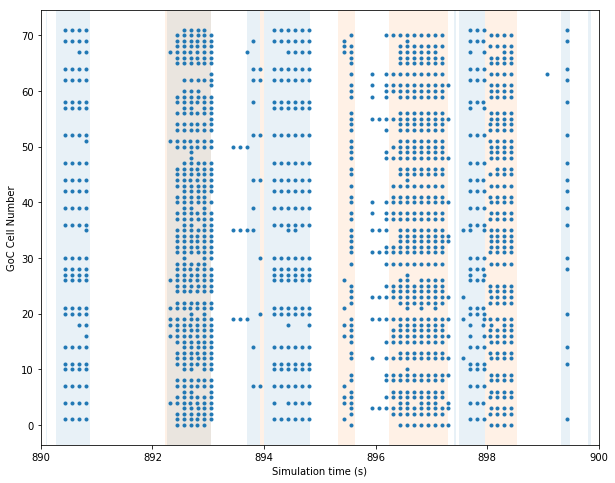

In [20]:
init_time = simulation.current_time - 10.0
end_time = simulation.current_time - 0.0
min_neuron = 0
max_neuron = simulation.cerebellum.get_number_of_elements(layer='goclayer')
pattern_id = range(simulation.config_options['stimulation']['number_of_patterns'])
gtime,gcell_id = simulation.cerebellum.get_spike_activity(neuron_layer = 'goclayer', init_time = init_time, end_time = end_time, neuron_indexes=range(min_neuron,max_neuron))
plt.figure(figsize=(10,8))
plt.plot(gtime,gcell_id, '.')
plt.ylabel('GoC Cell Number')
plt.xlabel('Simulation time (s)')
plt.xlim(init_time,end_time)

selected_bins = numpy.logical_and(simulation.pattern_length_cum<end_time,simulation.pattern_length_cum>init_time)
index = numpy.where(selected_bins)[0]
index = numpy.append([max(index[0]-1,0)],index)
index = numpy.append(index,[min(index[-1]+1,simulation.pattern_length.size-1)])
colorlist = ['C0','C1','C2','C3','C4','C5','C6','C7','C8','C9']
for pat_id in pattern_id:
    for idx in index[:-1]:
        if simulation.pattern_generator.bin_is_in_pattern[idx+1,pat_id]:
            plt.axvspan(simulation.pattern_length_cum[idx], simulation.pattern_length_cum[idx+1], facecolor=colorlist[pat_id], alpha=0.1)

Calculate the average firing frequency of each golgi cells during the ending 100 seconds

[600.0596 600.0599 600.1837 ... 898.4334 899.4338 899.4346] [39 69 69 ... 18 28 58]
Average spike per oscillatory cycle: 0.20151620370370368 Hz


Text(0.5,0,u'Av. Spikes per Oscillatory Cycle')

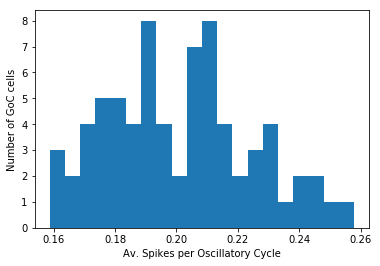

In [11]:
gtime,gcell_id = simulation.cerebellum.get_spike_activity(neuron_layer = 'goclayer',
                                                          init_time = simulation.current_time-300, 
                                                          end_time = simulation.current_time)
print gtime, gcell_id
import numpy
firing_frequency = numpy.bincount(gcell_id) / (300.0*8.0)
av_firing_rate = numpy.average(firing_frequency)
print 'Average spike per oscillatory cycle:',av_firing_rate,'Hz'
%matplotlib inline
import matplotlib.pyplot as plt
plt.hist(firing_frequency, bins=20)
plt.ylabel('Number of GoC cells')
plt.xlabel('Av. Spikes per Oscillatory Cycle')

Plot the histogram of non-zero weights between MF and GoC

Number of active synapses MF-GoC: 9441
Weight sum histogram MF-GoC: 9441


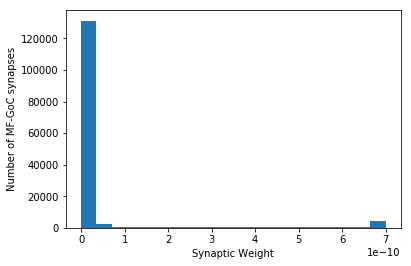

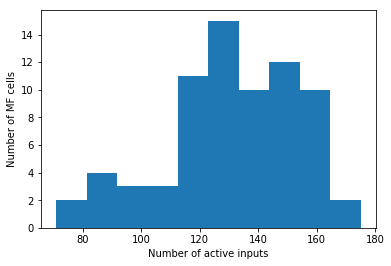

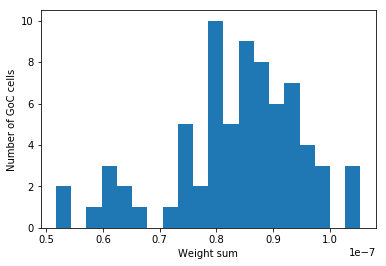

In [12]:
target_cell_index = simulation.cerebellum.layer_map['mfgocsynapsis'].target_index
source_cell_index = simulation.cerebellum.layer_map['mfgocsynapsis'].source_index
weight = simulation.cerebellum.layer_map['mfgocsynapsis'].weights
plt.figure()
plt.hist(weight, bins=20, range=(0,simulation.config_options['mfgocsynapsis']['max_weight']))
plt.ylabel('Number of MF-GoC synapses')
plt.xlabel('Synaptic Weight')
max_weight = numpy.max(weight)
active_synapses = weight>max_weight*0.2
number_of_active_inputs = numpy.bincount(target_cell_index[active_synapses])
plt.figure()
plt.hist(number_of_active_inputs, bins=10)
plt.ylabel('Number of MF cells')
plt.xlabel('Number of active inputs')
print 'Number of active synapses MF-GoC:',numpy.count_nonzero(active_synapses)
max_weight = numpy.max(weight)
active_synapses = weight>max_weight*0.2
weight_sum = numpy.bincount(target_cell_index,weights=weight)
plt.figure()
plt.hist(weight_sum, bins=20)
plt.ylabel('Number of GoC cells')
plt.xlabel('Weight sum')
print 'Weight sum histogram MF-GoC:',numpy.count_nonzero(active_synapses)

## MF-GoC weight analysis

Plot the MF-GoC weight as a function of the number of MF activation current in pattern

Text(0.5,1,u'Weight vs Pattern Activation')

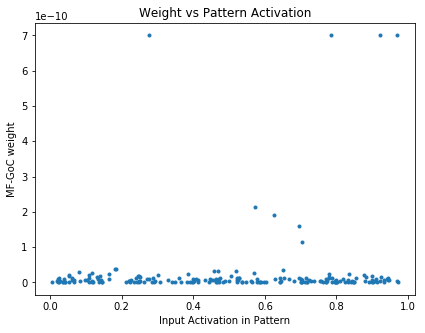

In [13]:
# Obtain the list of MF-GoC inputs
mfgoc_target_cell_index = simulation.cerebellum.layer_map['mfgocsynapsis'].target_index
target_cell_index = mfgoc_target_cell_index==3
mfgoc_target_cell_index = mfgoc_target_cell_index[target_cell_index]
mfgoc_source_cell_index = simulation.cerebellum.layer_map['mfgocsynapsis'].source_index[target_cell_index]
mfgoc_weight = simulation.cerebellum.layer_map['mfgocsynapsis'].weights[target_cell_index]
mfgoc_max_weight = numpy.max(mfgoc_weight)
mfgoc_number_of_active_inputs = numpy.bincount(mfgoc_target_cell_index)
# Obtain the list of GoC active inputs included in pattern 
pattern_id = 0
included_in_pattern = numpy.in1d(mfgoc_source_cell_index, simulation.pattern_generator.fibers_in_pattern[pattern_id,:])
# Retrieve the weight of those MF included in pattern
# Search the x-index of elements in y
x = simulation.pattern_generator.fibers_in_pattern[pattern_id]
y = mfgoc_source_cell_index[included_in_pattern]
index = numpy.argsort(x)
sorted_x = x[index]
sorted_index = numpy.searchsorted(sorted_x, y)
yindex = numpy.take(index, sorted_index, mode="clip")
# Calculate the normalized activation levels
normalized_activation = simulation.pattern_generator.pattern_activation[pattern_id][yindex]
# Plot the figure
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(normalized_activation,mfgoc_weight[included_in_pattern],'.')
plt.xlabel('Input Activation in Pattern')
plt.ylabel('MF-GoC weight')
plt.title('Weight vs Pattern Activation')

Analyze the GrC neurons which are strenghted

Text(0.5,0,u'Number of MF cells')

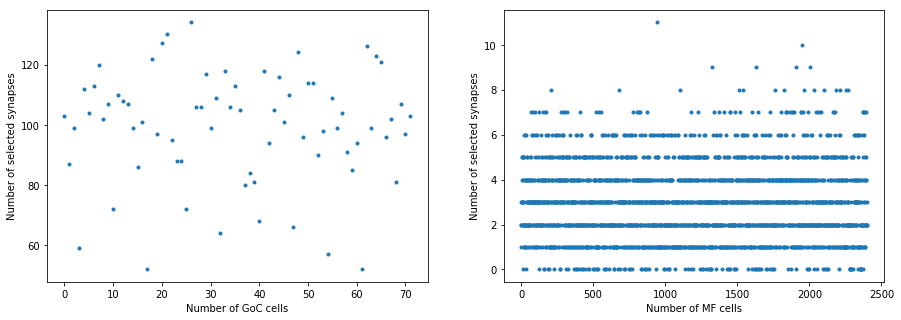

In [14]:
# Obtain the list of active GrC-GoC inputs
mfgoc_target_cell_index = simulation.cerebellum.layer_map['mfgocsynapsis'].target_index
mfgoc_source_cell_index = simulation.cerebellum.layer_map['mfgocsynapsis'].source_index
mfgoc_weight = simulation.cerebellum.layer_map['mfgocsynapsis'].weights
target_cell_index = mfgoc_target_cell_index>=0
mfgoc_max_weight = numpy.max(mfgoc_weight[target_cell_index])
selected_synapses = numpy.logical_and(mfgoc_weight>mfgoc_max_weight*0.50,target_cell_index)
target_count = numpy.bincount(mfgoc_target_cell_index[selected_synapses],minlength=simulation.cerebellum.get_number_of_elements(layer='goclayer'))
source_count = numpy.bincount(mfgoc_source_cell_index[selected_synapses],minlength=simulation.cerebellum.get_number_of_elements(layer='mflayer'))
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(range(0,simulation.cerebellum.get_number_of_elements(layer='goclayer')),target_count,'.')
plt.ylabel('Number of selected synapses')
plt.xlabel('Number of GoC cells')
plt.subplot(1,2,2)
plt.plot(range(0,simulation.cerebellum.get_number_of_elements(layer='mflayer')),source_count,'.')
plt.ylabel('Number of selected synapses')
plt.xlabel('Number of MF cells')

## Information Analysis

Mutual information analysis in the GoC layer

In [15]:
simulation.analyze_av_MI()

2018-06-29 19:37:32,644 - P19763 - MemTotal:627M - Simulation - INFO: Analyzing individual mutual information in section individual_mutual_information
2018-06-29 19:37:32,657 - P19763 - MemTotal:627M - Simulation - INFO: Analyzing mutual information from time 800.0 to 900.0 seconds
2018-06-29 19:37:32,661 - P19763 - MemTotal:627M - Simulation - INFO: Average firing rate in MI analysis: 1.552638888888889Hz
2018-06-29 19:37:32,666 - P19763 - MemTotal:627M - Simulation - INFO: Individual pattern hit matrix:
2018-06-29 19:37:32,667 - P19763 - MemTotal:627M - Simulation - INFO: [[0.11219512 0.75121951 0.15609756 0.08292683 0.66341463 0.1804878
  0.04390244 0.7804878  0.08780488 0.01463415 0.72195122 0.78536585
  0.09268293 0.1804878  0.77560976 0.07317073 0.26341463 0.13170732
  0.4        0.1902439  0.72195122 0.73170732 0.18536585 0.02439024
  0.19512195 0.10243902 0.71707317 0.69756098 0.76097561 0.11219512
  0.69268293 0.15121951 0.15121951 0.19512195 0.12682927 0.22926829
  0.7902439  

2018-06-29 19:37:32,686 - P19763 - MemTotal:627M - Simulation - DEBUG: Joint shannon entropy: [[1.48272174 1.20402225 1.53036277 1.45861047 1.42728522 1.52235876
  1.43683556 1.18535668 1.48967233 1.41026536 1.20931674 1.11210132
  1.49383952 1.50383767 1.11667678 1.48111975 1.57609395 1.51667055
  1.55570606 1.55959819 1.13837479 1.32804986 1.53521065 1.42673856
  1.53284933 1.48508017 1.35512093 1.26722016 1.13717282 1.47760695
  1.16193632 1.52486987 1.52486987 1.53284933 1.49605792 1.54685384
  1.10973572 1.53631798 1.53678348 1.1009517  1.50716345 1.47041613
  1.11453113 1.5143652  1.18818273 1.50598269 1.49283832 1.15238495
  1.38619347 1.3992521  1.52031415 1.52882718 1.20302728 1.50608118
  1.52405233 1.42217746 1.51178192 1.15397445 1.15469438 1.49778454
  1.44468782 1.43579118 1.11888828 1.41758063 1.17664071 1.49886176
  1.50107292 1.49282935 1.52247132 1.24914428 1.46700622 1.24268296]
 [1.10545094 1.53864425 1.08670418 1.15146198 1.54386798 1.10332475
  1.13749049 1.553351

[array([0.16447921, 0.28896807])]

In [16]:
a = simulation.analyze_Hits_Top()

2018-06-29 19:37:32,724 - P19763 - MemTotal:627M - Simulation - INFO: Analyzing hit analysis in section hit_top_analysis
2018-06-29 19:37:32,739 - P19763 - MemTotal:627M - Simulation - INFO: Average firing rate in MI analysis: 1.552638888888889Hz
2018-06-29 19:37:32,745 - P19763 - MemTotal:627M - Simulation - INFO: Individual pattern hit matrix:
2018-06-29 19:37:32,747 - P19763 - MemTotal:627M - Simulation - INFO: [[0.11219512 0.75121951 0.15609756 0.08292683 0.66341463 0.1804878
  0.04390244 0.7804878  0.08780488 0.01463415 0.72195122 0.78536585
  0.09268293 0.1804878  0.77560976 0.07317073 0.26341463 0.13170732
  0.4        0.1902439  0.72195122 0.73170732 0.18536585 0.02439024
  0.19512195 0.10243902 0.71707317 0.69756098 0.76097561 0.11219512
  0.69268293 0.15121951 0.15121951 0.19512195 0.12682927 0.22926829
  0.7902439  0.16585366 0.17073171 0.74146341 0.11219512 0.08780488
  0.74634146 0.14634146 0.76097561 0.12682927 0.17560976 0.72195122
  0.01463415 0.02926829 0.12682927 0.22

2018-06-29 19:37:32,764 - P19763 - MemTotal:627M - Simulation - INFO: Hit-false alarm of top-n index:0.6679848888949187


### Mutual Information analysis for each neuron and each pattern

Analyze the pattern corresponding to each time bin

In [17]:
inv_time_bin = 1./time_bin
pattern_index = range(0,simulation.config_options['stimulation']['number_of_patterns'])
cell_index = range(0,simulation.cerebellum.get_number_of_elements(layer='goclayer'))        
# Generate the time bin matrix
total_time = simulation.pattern_generator.simulation_time
bin_time_init = numpy.linspace(0.0, total_time-time_bin, num=total_time*inv_time_bin)
bin_time_end = numpy.linspace(time_bin,total_time,num=total_time*inv_time_bin)

# Initialize a matrix
num_patterns = len(pattern_index)
num_bins = len(bin_time_init)
num_cells = len(cell_index)

# Calculate the time of each pattern interval
time_end_of_pattern = simulation.pattern_generator.pattern_length_cum
time_init_of_pattern = numpy.append([0.0],time_end_of_pattern[:-1])

# Calculate the bin of each pattern interval. Check the round of the last bin to avoid out of range
bin_end_of_pattern = numpy.floor(time_end_of_pattern * inv_time_bin).astype(int)
if (bin_end_of_pattern[-1]>=num_bins):
    bin_end_of_pattern[-1]=num_bins-1
bin_init_of_pattern = numpy.append([0],bin_end_of_pattern[:-1])
if (bin_init_of_pattern[-1]>=num_bins):
    bin_init_of_pattern[-1]=num_bins-1

# Final matrix indicating which bins are considered of each pattern
bin_is_pattern = numpy.empty((num_patterns, num_bins),dtype='bool')
bin_is_pattern[:,:] = False
bin_pattern = numpy.zeros(num_bins)

# Final matrix indicating which bins are registered spikes
bin_has_fired = numpy.empty((num_cells, num_bins), dtype='bool')
bin_has_fired[:,:] = False

for key, value in enumerate(pattern_index):
    time_of_pattern_in_bin = numpy.zeros(num_bins)
    for index in simulation.pattern_generator.pattern_id_index[value]:
        init_bin = bin_init_of_pattern[index]
        end_bin = bin_end_of_pattern[index]

        list_of_bins = range(init_bin,end_bin+1)

        # Add the time of the initial bin (if exists)
        if init_bin!=end_bin:
            time_of_pattern_in_bin[list_of_bins[0]] += (bin_time_end[init_bin] - time_init_of_pattern[index])

        # Add the time of the intermediate bins (if exist)
        time_of_pattern_in_bin[list_of_bins[1:-1]] += time_bin

        # Add the time of the final bin
        time_of_pattern_in_bin[list_of_bins[-1]] += (time_end_of_pattern[index] - max(time_init_of_pattern[index],bin_time_init[end_bin]))

    # Those bins where the time in the pattern is longer than half of the bin are set to part of that pattern    
    bin_is_pattern[key,time_of_pattern_in_bin>(time_bin/2.)] = True
    bin_pattern[bin_is_pattern[key,:]] = bin_pattern[bin_is_pattern[key,:]] + 2**value

    
# Create a map of cells to index
cell_map = dict()
for key, value in enumerate(cell_index):
    cell_map[value] = key

pynest:6: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.
pynest:7: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.


In [18]:
def calc_Entropy(bin_matrix):
    '''
    Calculate the entropy for each individual pattern.
    @param bin_matrix Boolean matrix including 1 line for each pattern and 1 column for each time bin.
    '''
    sum_bins = numpy.count_nonzero(bin_matrix,axis=1)
    probability = sum_bins/float(bin_matrix.shape[1])
    entropy = numpy.zeros(probability.shape)
    idx = probability>0.0
    entropy[idx] = -probability[idx]*numpy.log2(probability[idx])
    idx = probability<1.0
    entropy[idx] -= (1-probability[idx])*numpy.log2(1-probability[idx])
    return entropy


def calc_Joint_Entropy(cell_firing, pattern_present):
    '''
    Calculate the entropy of having both cell firing and pattern present.
    @param cell_firing Boolean matrix including 1 line for each cell and 1 column for each time bin.
    @param pattern_present Boolean matrix including 1 line for each pattern and 1 column for each time bin.
    '''
    hit_matrix = numpy.empty((len(pattern_present),len(cell_firing)))
    cr_matrix = numpy.empty((len(pattern_present),len(cell_firing)))
    miss_matrix = numpy.empty((len(pattern_present),len(cell_firing)))
    fa_matrix = numpy.empty((len(pattern_present),len(cell_firing)))
    
    for index_pat, pattern in enumerate(pattern_present):
        if (numpy.count_nonzero(pattern)):
            for index_cell, firing in enumerate(cell_firing):
                hit_matrix[index_pat,index_cell] = numpy.count_nonzero(firing&pattern)/float(pattern.shape[0])
                cr_matrix[index_pat,index_cell] = numpy.count_nonzero(~firing&~pattern)/float(pattern.shape[0])
                miss_matrix[index_pat,index_cell] = numpy.count_nonzero(~firing&pattern)/float(pattern.shape[0])
                fa_matrix[index_pat,index_cell] = numpy.count_nonzero(firing&~pattern)/float(pattern.shape[0])
        else:
            print 'Pattern',index_pat,'never occurs. Statistics will not be calculated'
    
    entropy = numpy.zeros((len(pattern_present),len(cell_firing)),dtype=numpy.float)           
    idx = hit_matrix>0
    entropy[idx] = -hit_matrix[idx]*numpy.log2(hit_matrix[idx])
    idx = cr_matrix>0
    entropy[idx] -= cr_matrix[idx]*numpy.log2(cr_matrix[idx])
    idx = miss_matrix>0
    entropy[idx] -= miss_matrix[idx]*numpy.log2(miss_matrix[idx])
    idx = fa_matrix>0
    entropy[idx] -= fa_matrix[idx]*numpy.log2(fa_matrix[idx])
    return entropy

def calc_Ind_Pattern_Hit_Matrix(cell_firing, pattern_present):
    '''
    Calculate the correct rejection, hit, miss and false alarm matrisses with 1 line for each cell and 1 column for each pattern (including noise).
    @param cell_firing Boolean matrix including 1 line for each cell and 1 column for each time bin.
    @param pattern_present Boolean matrix including 1 line for each pattern and 1 column for each time bin.
    '''
    hit_matrix = numpy.empty((len(pattern_present),len(cell_firing)))
    cr_matrix = numpy.empty((len(pattern_present),len(cell_firing)))
    miss_matrix = numpy.empty((len(pattern_present),len(cell_firing)))
    fa_matrix = numpy.empty((len(pattern_present),len(cell_firing)))
    
    for index_pat, pattern in enumerate(pattern_present):
        if (numpy.count_nonzero(pattern)):
            for index_cell, firing in enumerate(cell_firing):
                hit_matrix[index_pat,index_cell] = numpy.count_nonzero(firing&pattern)/float(numpy.count_nonzero(pattern))
                cr_matrix[index_pat,index_cell] = numpy.count_nonzero(~firing&~pattern)/float(numpy.count_nonzero(~pattern))
                miss_matrix[index_pat,index_cell] = numpy.count_nonzero(~firing&pattern)/float(numpy.count_nonzero(pattern))
                fa_matrix[index_pat,index_cell] = numpy.count_nonzero(firing&~pattern)/float(numpy.count_nonzero(~pattern))
        else:
            print 'Pattern',index_pat,'never occurs. Statistics will not be calculated'               
        
    return cr_matrix, hit_matrix, miss_matrix, fa_matrix 
    
def calc_MI(pattern_entropy, cell_entropy, joint_entropy):
    '''
    Calculate the MI between the pattern in the input and each neuron.
    @param pattern_entropy Array with the entropy of each individual pattern.
    @param cell_entropy Array with the entropy of each individual cell.
    @param joint_entropy 2D array with the joint entropy of each cell to each pattern
    '''
    
    MI_matrix = numpy.empty((len(pattern_entropy),len(cell_entropy)))

    for index_pat, pattern_H in enumerate(pattern_entropy):
        MI_matrix[index_pat,:] = pattern_H + cell_entropy[:] - joint_entropy[index_pat,:]

    return MI_matrix

In [19]:
if simulation.current_time<analysis_time:
    init_time = 0
else:
    init_time = simulation.current_time - analysis_time
print init_time, simulation.current_time
       
# Load data from the data provider
gtime,gcell_id = simulation.cerebellum.get_spike_activity(neuron_layer = 'goclayer', 
                                                          init_time = init_time, end_time = simulation.current_time)
spike_bin_index = numpy.floor(gtime*inv_time_bin).astype(int)

av_firing_rate = float(len(gtime))/(len(cell_index)*(simulation.current_time-init_time)*8)
print 'Average firing rate in MI analysis:',av_firing_rate,'Hz'
        
cell_id = numpy.array([cell_map[value] for value in gcell_id])
        
# Final matrix indicating which bins are registered spikes
if len(spike_bin_index) and len(cell_id):
    bin_has_fired[cell_id,spike_bin_index] = True
    
# Calculate mutual information in the time window
init_bin = int(init_time * inv_time_bin)
end_bin = int(simulation.current_time * inv_time_bin)

cr_matrix, hit_matrix, miss_matrix, fa_matrix = calc_Ind_Pattern_Hit_Matrix(bin_has_fired[:,init_bin:end_bin], bin_is_pattern[:,init_bin:end_bin])

# Obtain the list of neurons with hit rate over 80%
hit_rate_thr = 0.80
neurons_over = numpy.where(hit_matrix>hit_rate_thr)
print 'List of neurons with hit rate over',hit_rate_thr,'. Number of neurons:',neurons_over[0].shape,'. Pattern:',neurons_over[0],'Neuron:',neurons_over[1]
        
# Calculate pattern entropy, cell entropy and joint entropy
pat_entropy = calc_Entropy(bin_is_pattern[:,init_bin:end_bin])
cell_entropy = calc_Entropy(bin_has_fired[:,init_bin:end_bin])
joint_entropy = calc_Joint_Entropy(bin_has_fired[:,init_bin:end_bin], bin_is_pattern[:,init_bin:end_bin])

# Calculate average MI
MI_Matrix = calc_MI(pat_entropy, cell_entropy, joint_entropy)

selected_pattern = numpy.argmax(MI_Matrix, axis=0)

print 'Pattern id with maximum MI for each neuron:',selected_pattern
MI_per_pattern = 0
for idx in range(num_patterns):
    sel_columns = selected_pattern==idx
    MI_per_pattern += numpy.average(MI_Matrix[idx,sel_columns])
av_MI_per_pattern = MI_per_pattern/num_patterns
print 'Average MI per pattern:',av_MI_per_pattern

800.0 900.0
Average firing rate in MI analysis: 0.1940798611111111 Hz
List of neurons with hit rate over 0.8 . Number of neurons: (0,) . Pattern: [] Neuron: []
Pattern id with maximum MI for each neuron: [1 0 1 1 0 1 1 0 1 1 0 0 1 1 0 1 1 1 1 1 0 0 1 1 1 1 0 0 0 1 0 1 1 1 1 1 0
 1 1 0 1 1 0 1 0 1 1 0 1 1 1 1 0 1 1 1 1 0 0 1 1 1 0 1 0 1 1 1 1 0 1 0]
Average MI per pattern: 0.3540214866694726
